In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
from Playground.array_surface_utils import check_interface
from tune import tune_with_playground_from_file as t
#
import perform_registration as pr


config_file = './array_env_config.json'

from tune import show_device_shape
from tune import tune, sub_tune



In [2]:
import sys
import json
from Sampler_factory import Paper_sampler
from Investigation.Investigation_factory import Investigation_stage, Mock_Investigation_stage
from main_utils.utils import Timer, plot_conditional_idx_improvment
from main_utils.model_surf_utils import show_gpr_gpc, show_dummy_device, show_dev_with_points
from Playground.mock_device import build_mock_device_with_json, build_fake_device_with_json

from Playground.array_surface_utils import Fake_CP

import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [3]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [4]:

    """

    transform1 = np.array(pr.scaling_registration(points.T, points2.T))
    
    print(transform1)
    
    #print("\n")
    
    #print(np.linalg.inv(transform1))
    
    #print(points2)
    #print(transform1 @ points2.T)
    
    plt.figure()
    plt.scatter(np.array(points)[:, 0], np.array(points[:, 1]), label="original")
    plt.scatter(np.array(points2)[:, 0], np.array(points2[:, 1]), label="moved")
    plt.scatter((np.linalg.inv(transform1) @ np.array(points2.T)).T[:, 0], (np.linalg.inv(transform1) @ np.array(points2.T)).T[:, 1], label="using scaling transform")

    plt.legend()
    plt.show()
    return points, points2, transform1
    """
    
    """
    out = []
    device.set_params([0, 0, 0, 0, 0])
    print("Moved to ", device.params)
    points = np.array(subroutine(config_subset)).squeeze()
    out.append(points)
    
    plt.figure()
    plt.scatter(np.array(points)[:, 0], np.array(points[:, 1]))
    plt.show()
    
    
        
    device.set_params([0, 0, -800, 0, 0])
    
    print("Moved to ", device.params)
    
    origin = device.params[:2]
    print("New origin: ", origin)
    points2 = np.array(subroutine(config_subset, origin)).squeeze()
    out.append(points2)
    
    plt.figure()
    plt.scatter(np.array(points)[:, 0], np.array(points[:, 1]))
    plt.scatter(np.array(points2)[:, 0], np.array(points2[:, 1]))
    plt.show()
    
    inv = np.linalg.inv(transform1)
    
    
    print("actual transform: ", transform1, "\n")
    
    print("inverse of actual matrix: ", inv, "\n")
    
    
    new_transform = np.array([[transform1[0, 0], 0], [0, transform1[1, 1]]])
    print(new_transform)
    
    lin_inv = np.linalg.inv(new_transform)
    print("inverse of linear matrix: ", lin_inv)
    
    t_points = np.array(transform1).dot(np.array(points2).T).T
    t_points2 = np.array(new_transform).dot(np.array(points2).T).T
    
    comp = comp_creator(new_transform[0, 0], new_transform[1, 1])
    print(comp)
    
    
    
    
  
    plt.figure(figsize=(12, 7))
    plt.scatter(np.array(points)[:, 0], np.array(points[:, 1]), label="no crosstalk")
    plt.scatter(np.array(points2)[:, 0], np.array(points2[:, 1]), label="moved gate 3")
    plt.scatter(t_points[:, 0], t_points[:, 1], label="actual transform")
    plt.scatter(t_points2[:, 0], t_points2[:, 1], label='linear transform')
    plt.legend(loc="upper left")
    plt.show()
    
    print(transform1)
    
    
    notebook = {"original points": points, "-500 x3 points": points2, "transform": transform1, "linear transform": new_transform}
    
    

    moveto = param_creator(comp, [0, 0, -800, 0, 0])

    
    device.set_params([0, 0, -800, 0, 0])
    
    print("Moved to ", device.params)
    
    origin = device.params[:2]
    print("New origin: ", origin)
    latest = np.array(subroutine(config_subset, origin)).squeeze()
    out.append(latest)
    
    plt.figure()
    plt.scatter(np.array(points)[:, 0], np.array(points[:, 1]), label="no crosstalk")
    plt.scatter(np.array(latest)[:, 0], np.array(latest[:, 1]), label="latest")
    plt.show()

    
    
    still  = [0, 0, -800, 0, 0]
    
    mod = param_creator(true_inverse, still)

    
    device.set_params(mod)
    #device.set_params(still)
    
    print("Moved to ", device.params)
    
    origin = device.params[:2]
    
    print("New origin: ", origin)
    new = np.array(subroutine(config_subset, origin)).squeeze()
    out.append(new)
    
    #print("first new: \n", new)
    #print("add by moveto: \n", moveto[:2])
    
    
    new = new - mod[:2]
    #print("new new: \n", new)
    
    
    plt.figure()
    plt.scatter(np.array(points)[:, 0], np.array(points[:, 1]), label="no crosstalk")
    plt.scatter(np.array(latest)[:, 0], np.array(latest[:, 1]), label="latest")
    plt.scatter(np.array(new)[:, 0], np.array(new[:, 1]), label="added on")
    plt.legend(loc="upper right")
    plt.show()
    
    """

    
    #return notebook

'\nout = []\ndevice.set_params([0, 0, 0, 0, 0])\nprint("Moved to ", device.params)\npoints = np.array(subroutine(config_subset)).squeeze()\nout.append(points)\n\nplt.figure()\nplt.scatter(np.array(points)[:, 0], np.array(points[:, 1]))\nplt.show()\n\n\n    \ndevice.set_params([0, 0, -800, 0, 0])\n\nprint("Moved to ", device.params)\n\norigin = device.params[:2]\nprint("New origin: ", origin)\npoints2 = np.array(subroutine(config_subset, origin)).squeeze()\nout.append(points2)\n\nplt.figure()\nplt.scatter(np.array(points)[:, 0], np.array(points[:, 1]))\nplt.scatter(np.array(points2)[:, 0], np.array(points2[:, 1]))\nplt.show()\n\ninv = np.linalg.inv(transform1)\n\n\nprint("actual transform: ", transform1, "\n")\n\nprint("inverse of actual matrix: ", inv, "\n")\n\n\nnew_transform = np.array([[transform1[0, 0], 0], [0, transform1[1, 1]]])\nprint(new_transform)\n\nlin_inv = np.linalg.inv(new_transform)\nprint("inverse of linear matrix: ", lin_inv)\n\nt_points = np.array(transform1).dot(np.a

In [5]:
def full_subtune(config_file, config_subset): 
    with open(config_file) as f:
        configs = json.load(f)
    
    device = build_fake_device_with_json(configs['playground'])
    sub_slice = 2
    
    matprint(device.Crosstalk_shape.matrix) 
    
    true_inverse = np.linalg.inv(device.Crosstalk_shape.matrix)
    
    print("True inverse matrix: (should account for crosstalk)")
    matprint(true_inverse)
    
    def sub_jump(params_sub):
        params_full = np.asarray(device.params).squeeze()
        
        params_full[:sub_slice] = params_sub
        device.jump(params_full.squeeze())

        return params_full
    
    measure = device.measure
    dots = device.fake_dots
    
    plunger_gates = configs['plunger_gates']

    check = lambda: device.check(plunger_gates)
    
    def subroutine(config_subset, origin=None): 
        inv_timer = Timer()
        investigation_stage = Mock_Investigation_stage(sub_jump, measure, check, configs, inv_timer, dots, start_params=device.params)
        results, sampler = sub_tune(sub_jump, measure, investigation_stage, configs, config_subset, origin)
        fields = ['vols_pinchoff', 'conditional_idx', 'origin']
        p_offs = results['vols_pinchoff']
        points = np.concatenate(p_offs).reshape(-1, 2)
        return points
    
    def comp_creator(one, two):
        comp = np.identity(5)
        comp[0, 2] = one - 1
        comp[1, 2] = two - 1
        return np.linalg.inv(comp)

    
    
    
    def param_creator(comp, params): 
        _params = np.array(params)
        return list(comp.dot(_params.T))
        
        
    def move_and_measure(params, plot=False): 
        device.set_params(params)
        print("Moved to ", device.params)

        points = np.array(subroutine(config_subset)).squeeze()
        
        if plot : 
            plt.figure()
            plt.scatter(points[:, 0], points[:, 1])
            plt.show()
            
        return points
    
    x = np.linspace(0, -800,10)
    
    out = []
    transforms = []
    
    for vol in x: 
        
        gate_points = move_and_measure([0, 0, vol, 0, 0])
        out.append(gate_points)

        
    for gate in out: 
        
        print(np.array(gate))
        print(np.array(gate).T.shape)
        trans = np.array(pr.scaling_registration(np.array(out[0]).T, np.array(gate).T))
        transforms.append(trans)
    
    print("trans\n", np.array(transforms))
    
    plt.figure()    
    plt.plot(x, np.array(transforms)[:, 0, 0])
    plt.plot(x, np.array(transforms)[:, 1, 1])
    plt.show()
    
    return out, transforms
    
    """
    
    
    zero = move_and_measure([0, 0, 0, 0, 0])
    gate1 = move_and_measure([0, 0, -800, 0, 0])
    gate1_smaller = move_and_measure([0, 0, -400, 0, 0])
    gate1_smaller2 = move_and_measure([0, 0, -200, 0, 0])
    gate2 = move_and_measure([0, 0, 0, -800, 0])
    gate3 = move_and_measure([0, 0, 0, 0, -800])
    
    trans1 = np.array(pr.scaling_registration(zero.T, gate1.T))
    trans1_smaller = np.array(pr.scaling_registration(zero.T, gate1_smaller.T))
    trans1_smaller2 = np.array(pr.scaling_registration(zero.T, gate1_smaller2.T))
    
    trans2 = np.array(pr.scaling_registration(zero.T, gate2.T))
    trans3 = np.array(pr.scaling_registration(zero.T, gate3.T))
    
    
    print("===== TRANSFORMS =====")
    
    print("trans1\n", trans1)
    print("trans1 smaller (should be half trans 1?) \n", trans1_smaller)
    print("trans1 smaller2 (should be half trans 12?) \n", trans1_smaller2)
    
    
    
    print("\n", trans2)
    
    print("\n", trans3)
    
    a1, b1 = np.diagonal(trans1)
    a2, b2 = np.diagonal(trans2)
    a3, b3 = np.diagonal(trans3)
    
    convert = np.array([[1, 0, a1, a2, a3], [0, 1, b1, b2, b3], [0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
    
    print(convert)
    
    print(np.linalg.inv(convert))
    
    
    return convert 
    """
    
    

<IPython.core.display.Javascript object>


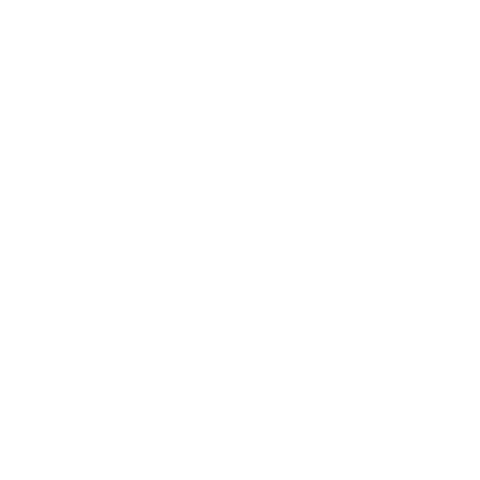

10:12:21.894  {mock_device} [__init__] -- INFO: Fake_CP device initialised.
10:12:21.894  {array_surface_utils} [__init__] -- INFO: Fake CP object initialised
10:12:21.897  {array_surface_utils} [__init__] -- INFO: Corner of hypercube calculated: [-750.40023562 -682.84656716 -714.03283861 -730.96543734 -837.72246457]
10:12:21.897  {mock_device} [__init__] -- INFO: 1 fake dots initialised
10:12:21.912  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
10:12:21.913  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
10:12:21.921  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
10:12:21.922  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
10:12:21.923  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
10:12:21.931  {indexable} [_add_to_index_operations] --

scaling
[[1.00000000e+00 3.65161566e-01 3.50308352e-04 4.25293400e-07
  3.60920925e-13]
 [2.56176180e-01 1.00000000e+00 1.73209834e-01 1.69800302e-03
  9.08279227e-08]
 [5.76832655e-04 2.15043266e-01 1.00000000e+00 1.87144877e-01
  2.26365368e-03]
 [2.84909882e-08 1.13316436e-03 1.90343332e-01 1.00000000e+00
  1.57987137e-01]
 [1.26866285e-14 1.25843216e-07 1.19807175e-03 2.20833953e-01
  1.00000000e+00]]
          1     0.365162  0.000350308  4.25293e-07  3.60921e-13  
   0.256176            1      0.17321     0.001698  9.08279e-08  
0.000576833     0.215043            1     0.187145   0.00226365  
 2.8491e-08   0.00113316     0.190343            1     0.157987  
1.26866e-14  1.25843e-07   0.00119807     0.220834            1  
True inverse matrix: (should account for crosstalk)
   1.10771   -0.420625  0.0750893  -0.0137821   0.00200746  
  -0.29503     1.15213  -0.206673   0.0379421  -0.00552663  
 0.0651362   -0.256704    1.08423    -0.20923    0.0306014  
-0.0124873   0.0492253  -0

10:12:22.411  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-554.60624959 -858.42641381]
do extra measure params:  [-554.60624959 -858.42641381]
[-554.60624959 -858.42641381] [0.0, 0, 0]
Point in consideration:  [-554.6062495856404, -858.4264138064254, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-554.60624959 -858.42641381]
detected: True
r_vals: 1022.0000000000049
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97860514 -0.20574737]


10:12:22.890  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-929.67488225 -195.46000436]
do extra measure params:  [-929.67488225 -195.46000436]
[-929.67488225 -195.46000436] [0.0, 0, 0]
Point in consideration:  [-929.6748822549688, -195.4600043594675, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-929.67488225 -195.46000436]
detected: True
r_vals: 949.9999999999964
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.1163941  -0.99320311]


10:12:23.359  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-113.83342679 -971.35263985]
do extra measure params:  [-113.83342679 -971.35263985]
[-113.83342679 -971.35263985] [0.0, 0, 0]
Point in consideration:  [-113.83342679274838, -971.3526398505336, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-113.83342679 -971.35263985]
detected: True
r_vals: 977.99999999999
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.51796938 -0.85539916]


10:12:23.843  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-525.22094774 -867.37474949]
do extra measure params:  [-525.22094774 -867.37474949]
[-525.22094774 -867.37474949] [0.0, 0, 0]
Point in consideration:  [-525.2209477393737, -867.3747494916834, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-525.22094774 -867.37474949]
detected: True
r_vals: 1014.0000000000032
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.24168533 -0.97035468]


10:12:24.331  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-234.43477149 -941.24403739]
do extra measure params:  [-234.43477149 -941.24403739]
[-234.43477149 -941.24403739] [0.0, 0, 0]
Point in consideration:  [-234.43477149168095, -941.2440373864969, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-234.43477149 -941.24403739]
detected: True
r_vals: 969.9999999999948
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98417793 -0.17718294]


10:12:24.788  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-938.90574842 -169.03252817]
do extra measure params:  [-938.90574842 -169.03252817]
[-938.90574842 -169.03252817] [0.0, 0, 0]
Point in consideration:  [-938.9057484217685, -169.03252817295532, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-938.90574842 -169.03252817]
detected: True
r_vals: 953.9999999999907
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.06061369 -0.9981613 ]


10:12:25.278  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -59.88632326 -986.18336443]
do extra measure params:  [ -59.88632326 -986.18336443]
[ -59.88632326 -986.18336443] [0.0, 0, 0]
Point in consideration:  [-59.88632326337248, -986.1833644338051, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -59.88632326 -986.18336443]
detected: True
r_vals: 987.999999999992
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.59306954 -0.80515124]


10:12:25.806  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-620.350737   -842.18819934]
do extra measure params:  [-620.350737   -842.18819934]
[-620.350737   -842.18819934] [0.0, 0, 0]
Point in consideration:  [-620.350736995494, -842.1881993409552, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-620.350737   -842.18819934]
detected: True
r_vals: 1046.0000000000061
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.58554891 -0.81063708]


10:12:26.295  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-610.14196362 -844.68383684]
do extra measure params:  [-610.14196362 -844.68383684]
[-610.14196362 -844.68383684] [0.0, 0, 0]
Point in consideration:  [-610.1419636242215, -844.6838368435625, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-610.14196362 -844.68383684]
detected: True
r_vals: 1041.9999999999918
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.60940362 -0.79286015]


10:12:26.817  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-642.31141814 -835.67460302]
do extra measure params:  [-642.31141814 -835.67460302]
[-642.31141814 -835.67460302] [0.0, 0, 0]
Point in consideration:  [-642.3114181374457, -835.6746030185802, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-642.31141814 -835.67460302]
detected: True
r_vals: 1053.999999999999
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91587199 -0.40147042]


10:12:27.293  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-862.75141272 -378.18513964]
do extra measure params:  [-862.75141272 -378.18513964]
[-862.75141272 -378.18513964] [0.0, 0, 0]
Point in consideration:  [-862.7514127226468, -378.1851396407357, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-862.75141272 -378.18513964]
detected: True
r_vals: 942.000000000003
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.53574545 -0.84437954]


10:12:27.790  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-546.46035933 -861.26713375]
do extra measure params:  [-546.46035933 -861.26713375]
[-546.46035933 -861.26713375] [0.0, 0, 0]
Point in consideration:  [-546.460359327857, -861.26713375309, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-546.46035933 -861.26713375]
detected: True
r_vals: 1019.9999999999968
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.46198924 -0.88688553]


10:12:28.241  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-460.14128019 -883.33798869]
do extra measure params:  [-460.14128019 -883.33798869]
[-460.14128019 -883.33798869] [0.0, 0, 0]
Point in consideration:  [-460.1412801908266, -883.337988690827, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-460.14128019 -883.33798869]
detected: True
r_vals: 996.0000000000042
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.71051712 -0.70367991]


10:12:28.731  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-734.67470636 -727.60502736]
do extra measure params:  [-734.67470636 -727.60502736]
[-734.67470636 -727.60502736] [0.0, 0, 0]
Point in consideration:  [-734.6747063562601, -727.6050273605483, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-734.67470636 -727.60502736]
detected: True
r_vals: 1034.0000000000007
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.81928617 -0.57338484]


10:12:29.224  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-797.98472483 -558.47683832]
do extra measure params:  [-797.98472483 -558.47683832]
[-797.98472483 -558.47683832] [0.0, 0, 0]
Point in consideration:  [-797.9847248254324, -558.4768383248052, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-797.98472483 -558.47683832]
detected: True
r_vals: 973.9999999999957
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.38778226 -0.92175101]


10:12:29.714  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-380.02661741 -903.31598572]
do extra measure params:  [-380.02661741 -903.31598572]
[-380.02661741 -903.31598572] [0.0, 0, 0]
Point in consideration:  [-380.0266174096521, -903.3159857215926, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-380.02661741 -903.31598572]
detected: True
r_vals: 979.9999999999973
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.44539094 -0.8953362 ]


10:12:30.171  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-441.82781598 -888.1735084 ]
do extra measure params:  [-441.82781598 -888.1735084 ]
[-441.82781598 -888.1735084 ] [0.0, 0, 0]
Point in consideration:  [-441.8278159756217, -888.1735084037468, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-441.82781598 -888.1735084 ]
detected: True
r_vals: 992.0000000000042
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.93298921 -0.35990435]


10:12:30.601  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-877.00985538 -338.31008494]
do extra measure params:  [-877.00985538 -338.31008494]
[-877.00985538 -338.31008494] [0.0, 0, 0]
Point in consideration:  [-877.0098553750598, -338.3100849443097, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-877.00985538 -338.31008494]
detected: True
r_vals: 940.000000000005
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.21068523 -0.97755395]


10:12:31.063  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-204.36467212 -948.22733603]
do extra measure params:  [-204.36467212 -948.22733603]
[-204.36467212 -948.22733603] [0.0, 0, 0]
Point in consideration:  [-204.36467212344442, -948.2273360264717, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-204.36467212 -948.22733603]
detected: True
r_vals: 969.9999999999908
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99781555 -0.0660615 ]


10:12:31.522  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-977.85924228  -64.74026783]
do extra measure params:  [-977.85924228  -64.74026783]
[-977.85924228  -64.74026783] [0.0, 0, 0]
Point in consideration:  [-977.8592422845552, -64.74026782974585, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-977.85924228  -64.74026783]
detected: True
r_vals: 979.9999999999957
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.76781389 -0.64067295]


10:12:32.008  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-767.81389074 -640.67295025]
do extra measure params:  [-767.81389074 -640.67295025]
[-767.81389074 -640.67295025] [0.0, 0, 0]
Point in consideration:  [-767.8138907423329, -640.6729502508413, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-767.81389074 -640.67295025]
detected: True
r_vals: 999.9999999999981
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97520436 -0.22130625]


10:12:32.454  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-924.49373387 -209.79832227]
do extra measure params:  [-924.49373387 -209.79832227]
[-924.49373387 -209.79832227] [0.0, 0, 0]
Point in consideration:  [-924.4937338733207, -209.79832227397446, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-924.49373387 -209.79832227]
detected: True
r_vals: 948.0000000000047
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.18980658 -0.9818215 ]


10:12:32.941  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-184.49199492 -954.3305003 ]
do extra measure params:  [-184.49199492 -954.3305003 ]
[-184.49199492 -954.3305003 ] [0.0, 0, 0]
Point in consideration:  [-184.49199491823447, -954.3305003043113, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-184.49199492 -954.3305003 ]
detected: True
r_vals: 971.9999999999933
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98692354 -0.1611891 ]


10:12:33.383  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-945.47275097 -154.41916066]
do extra measure params:  [-945.47275097 -154.41916066]
[-945.47275097 -154.41916066] [0.0, 0, 0]
Point in consideration:  [-945.4727509673774, -154.41916065748308, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-945.47275097 -154.41916066]
detected: True
r_vals: 957.9999999999906
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.56806619 -0.82298287]


10:12:33.903  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-587.38044077 -850.96428703]
do extra measure params:  [-587.38044077 -850.96428703]
[-587.38044077 -850.96428703] [0.0, 0, 0]
Point in consideration:  [-587.380440773602, -850.9642870277181, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-587.38044077 -850.96428703]
detected: True
r_vals: 1033.999999999992
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.52577029 -0.8506266 ]


10:12:34.404  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-534.18261113 -864.23662152]
do extra measure params:  [-534.18261113 -864.23662152]
[-534.18261113 -864.23662152] [0.0, 0, 0]
Point in consideration:  [-534.1826111253831, -864.2366215170947, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-534.18261113 -864.23662152]
detected: True
r_vals: 1016.000000000007
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.43578949 -0.90004862]


10:12:34.900  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-431.43159238 -891.04813624]
do extra measure params:  [-431.43159238 -891.04813624]
[-431.43159238 -891.04813624] [0.0, 0, 0]
Point in consideration:  [-431.43159238435703, -891.0481362377143, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-431.43159238 -891.04813624]
detected: True
r_vals: 990.0000000000032
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95788913 -0.28713831]


10:12:35.351  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-902.33156438 -270.48428405]
do extra measure params:  [-902.33156438 -270.48428405]
[-902.33156438 -270.48428405] [0.0, 0, 0]
Point in consideration:  [-902.3315643818794, -270.4842840538703, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-902.33156438 -270.48428405]
detected: True
r_vals: 941.9999999999918
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99652097 -0.08334238]


10:12:35.879  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-970.61142715  -81.17547341]
do extra measure params:  [-970.61142715  -81.17547341]
[-970.61142715  -81.17547341] [0.0, 0, 0]
Point in consideration:  [-970.6114271515174, -81.17547340736976, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-970.61142715  -81.17547341]
detected: True
r_vals: 974.0000000000083
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98621096 -0.16549304]


10:12:36.332  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
10:12:36.349  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
10:12:36.368  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
10:12:36.384  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
10:12:36.385  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
10:12:36.388  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
10:12:36.398  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
10:12:36.399  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
10:12:36.400  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-942.81767576 -158.21134684]
do extra measure params:  [-942.81767576 -158.21134684]
[-942.81767576 -158.21134684] [0.0, 0, 0]
Point in consideration:  [-942.8176757635674, -158.2113468363618, 0.0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-942.81767576 -158.21134684]
detected: True
r_vals: 955.9999999999952
Moved to  [0, 0, -88.88888888888889, 0, 0]
investigation initialised
investigation start params:  [-88.88888888888889, 0, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99985835 -0.01683097]


KeyboardInterrupt: 

In [6]:
out, transforms = full_subtune(config_file, 'subsample')

In [ ]:
for transform, points in zip(transforms, out): 
    print(transform)
    transform = np.linalg.inv(transform)
    plt.figure()
    plt.scatter(np.array(out[0]).T[0, :], np.array(out[0]).T[1, :], label="original")
    plt.scatter(points.T[0, :], points.T[1, :], label="points without transform")
    plt.scatter((transform @ points.T)[0,:], (transform @ points.T)[1, :], label="points with transform")
    plt.legend()
    plt.show()

In [ ]:
out = np.array([[[1.01396028, 0.        ],
  [0.  ,       0.93108366]],

 [[1.01668162, 0.        ],
  [0.,         0.83325432]]])

In [ ]:
out[:, 1, 1]
out[:, 0, 0]

In [21]:
0.016/0.8


0.02

In [29]:
(0.96582232 - 0.89132889) / .600

0.12415571666666662

In [31]:
(1.01117028 - 1.01637249) / .600

-0.008670349999999976

<IPython.core.display.Javascript object>


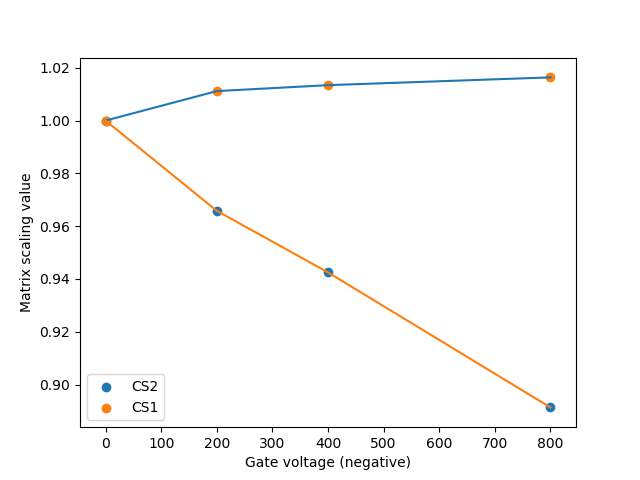

In [32]:
p = [1, 1.01117028, 1.01342314, 1.01637249]
q = [1, 0.96582232, 0.94249069, 0.89132889]
s = [-0, 200, 400, 800]
plt.figure()
plt.plot(s, p)
plt.plot(s, q)
plt.scatter(s, q, label="CS2")
plt.scatter(s, p, label="CS1")
plt.legend()
plt.ylabel("Matrix scaling value")
plt.xlabel("Gate voltage (negative)")
plt.show()


14:06:35.778  {pyplot} [switch_backend] -- DEBUG: Loaded backend nbAgg version unknown.


<IPython.core.display.Javascript object>


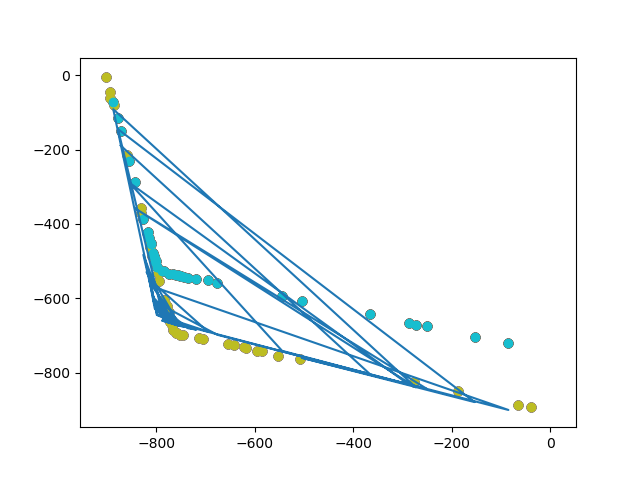

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), FloatSlider(value=1.0, descr…

In [13]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

points = points

def update(w = 1.00, h = 1.00):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()
    ax.scatter(points[:, 0], points[:, 1])
    ax.scatter(points2[:, 0], points2[:, 1])
    
    trans = np.diag([w, h])
    inv = np.linalg.inv(trans)
    
    line.set_data((inv @ points2.T).T[:, 0], (inv @ points2.T).T[:, 1])
    
    print(trans)
    print(inv)
interact(update);

In [13]:
lis[0].shape

(40, 2)

In [4]:
def full_subtune(config_file, config_subset): 
    with open(config_file) as f:
        configs = json.load(f)
    
    device = build_fake_device_with_json(configs['playground'])
    sub_slice = 2
    
    matprint(device.Crosstalk_shape.matrix) 
    
    true_inverse = np.linalg.inv(device.Crosstalk_shape.matrix)
    
    print("True inverse matrix: (should account for crosstalk)")
    matprint(true_inverse)
    
    def sub_jump(params_sub):
        params_full = np.asarray(device.params).squeeze()
        
        params_full[:sub_slice] = params_sub
        device.jump(params_full.squeeze())

        return params_full
    
    measure = device.measure
    dots = device.fake_dots
    
    plunger_gates = configs['plunger_gates']

    check = lambda: device.check(plunger_gates)
    
    def subroutine(config_subset, origin=None): 
        inv_timer = Timer()
        investigation_stage = Mock_Investigation_stage(sub_jump, measure, check, configs, inv_timer, dots, start_params=device.params)
        results, sampler = sub_tune(sub_jump, measure, investigation_stage, configs, config_subset, origin)
        fields = ['vols_pinchoff', 'conditional_idx', 'origin']
        p_offs = results['vols_pinchoff']
        points = np.concatenate(p_offs).reshape(-1, 2)
        return points
    
    def comp_creator(one, two):
        comp = np.identity(5)
        comp[0, 2] = one - 1
        comp[1, 2] = two - 1
        return np.linalg.inv(comp)

    
    
    
    def param_creator(comp, params): 
        _params = np.array(params)
        return list(comp.dot(_params.T))
        
        
    def move_and_measure(params, plot=False): 
        device.set_params(params)
        print("Moved to ", device.params)

        points = np.array(subroutine(config_subset)).squeeze()
        
        if plot : 
            plt.figure()
            plt.scatter(points[:, 0], points[:, 1])
            plt.show()
            
        return points
    
    x = np.linspace(0, -800, 3)
    
    out = []
    transforms = []
    
    for vol in x: 
        
        gate_points = move_and_measure([0, 0, vol, 0, 0])
        out.append(gate_points)

        
    for gate in out: 
        
        print(np.array(gate))
        print(np.array(gate).T.shape)
        trans = np.array(pr.scaling_registration(np.array(out[0]).T, np.array(gate).T))
        transforms.append(trans)
    
    print("trans\n", np.array(transforms))
    
    plt.figure()    
    plt.plot(x, np.array(transforms)[:, 0, 0])
    plt.plot(x, np.array(transforms)[:, 1, 1])
    plt.show()
    
    return out, transforms
    

In [1]:
out, transforms = full_subtune(config_file, 'subsample')

NameError: name 'full_subtune' is not defined

In [2]:
(1-0.89589897)/0.8

.00192034 / 0.8

0.002400425

In [52]:
def full_subtune(config_file, config_subset): 
    with open(config_file) as f:
        configs = json.load(f)
    
    device = build_fake_device_with_json(configs['playground'])
    sub_slice = 2
    
    matprint(device.Crosstalk_shape.matrix) 
    
    true_inverse = np.linalg.inv(device.Crosstalk_shape.matrix)
    
    print("True inverse matrix: (should account for crosstalk)")
    matprint(true_inverse)
    
    def sub_jump(params_sub):
        params_full = np.asarray(device.params).squeeze()
        
        params_full[:sub_slice] = params_sub
        device.jump(params_full.squeeze())

        return params_full
    
    measure = device.measure
    dots = device.fake_dots
    
    plunger_gates = configs['plunger_gates']

    check = lambda: device.check(plunger_gates)
    
    def subroutine(config_subset, origin=None): 
        inv_timer = Timer()
        investigation_stage = Mock_Investigation_stage(sub_jump, measure, check, configs, inv_timer, dots, start_params=device.params)
        results, sampler = sub_tune(sub_jump, measure, investigation_stage, configs, config_subset, origin)
        fields = ['vols_pinchoff', 'conditional_idx', 'origin']
        p_offs = results['vols_pinchoff']
        points = np.concatenate(p_offs).reshape(-1, 2)
        return points
    
    def comp_creator(one, two):
        comp = np.identity(5)
        comp[0, 2] = one - 1
        comp[1, 2] = two - 1
        return np.linalg.inv(comp)

    
    
    
    def param_creator(comp, params): 
        _params = np.array(params)
        return list(comp.dot(_params.T))
        
        
    def move_and_measure(params, plot=False): 
        device.set_params(params)
        print("Moved to ", device.params)

        points = np.array(subroutine(config_subset)).squeeze()
        
        if plot : 
            plt.figure()
            plt.scatter(points[:, 0], points[:, 1])
            plt.show()
            
        return points
    
    ####################################################
    
    x = [0, -200, -400, -600, -800]
    
    out = []
    
    gate3 = []
    gate4 = []
    gate5 = []
    
    transforms3 = []
    transforms4 = []
    transforms5 = []
    
    for vol in x: 
        
        gate_points = move_and_measure([0, 0, vol, 0, 0])
        gate3.append(gate_points)
        gate_points = move_and_measure([0, 0, 0, vol, 0])
        gate4.append(gate_points)
        gate_points = move_and_measure([0, 0, 0, 0, vol])
        gate5.append(gate_points)
        
    for gate in gate3: 
        
        print(np.array(gate))
        trans = np.array(pr.scaling_registration(np.array(gate3[0]).T, np.array(gate).T))
        transforms3.append(trans)
        
    for gate in gate4: 
        
        print(np.array(gate))
        trans = np.array(pr.scaling_registration(np.array(gate4[0]).T, np.array(gate).T))
        transforms4.append(trans)
        
    for gate in gate5: 
        
        print(np.array(gate))
        trans = np.array(pr.scaling_registration(np.array(gate5[0]).T, np.array(gate).T))
        transforms5.append(trans)
        
    return gate3, gate4, gate5, np.array(transforms3), np.array(transforms4), np.array(transforms5)

        
        
    """    
    plt.figure()
    plt.plot(transforms3[:, 0, 0])
    plt.plot(transforms3[:, 1, 1])
    plt.plot(transforms4[:, 0, 0])
    plt.plot(transforms4[:, 1, 1])
    plt.plot(transforms5[:, 0, 0])
    plt.plot(transforms5[:, 1, 1])
    plt.show()
    """
    

    

11:46:58.110  {mock_device} [__init__] -- INFO: Fake_CP device initialised.
11:46:58.111  {array_surface_utils} [__init__] -- INFO: Fake CP object initialised
11:46:58.112  {array_surface_utils} [__init__] -- INFO: Corner of hypercube calculated: [ -318.  -272.  -540.  -800. -1000.]
11:46:58.114  {mock_device} [__init__] -- INFO: 1 fake dots initialised
11:46:58.123  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:46:58.125  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:46:58.133  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:46:58.134  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:46:58.135  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:46:58.147  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters

Matrix not randomly generated. Change in Playground/shapes.py
scaling
[[1.  0.  0.3 0.4 0.2]
 [0.  1.  0.2 0.4 0.3]
 [0.  0.  1.  0.2 0.3]
 [0.  0.  0.  1.  0.2]
 [0.  0.  0.  0.  1. ]]
1  0  0.3  0.4  0.2  
0  1  0.2  0.4  0.3  
0  0    1  0.2  0.3  
0  0    0    1  0.2  
0  0    0    0    1  
True inverse matrix: (should account for crosstalk)
 1   0  -0.3  -0.34  -0.042  
 0   1  -0.2  -0.36  -0.168  
 0   0     1   -0.2   -0.26  
-0  -0    -0      1    -0.2  
 0   0     0      0       1  
Moved to  [0, 0, 0, 0, 0]
investigation initialised
investigation start params:  [0, 0, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.77282741 -0.63461625]


11:46:58.807  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.03867417  -821.19343042]
do extra measure params:  [-1000.03867417  -821.19343042]
[-1000.03867417  -821.19343042] [0, 0, 0]
Point in consideration:  [-1000.0386741698248, -821.1934304198276, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.03867417  -821.19343042]
detected: True
r_vals: 1294.0000000000098
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.0965099  -0.99533202]


11:46:59.323  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[  -97.08896199 -1001.3040165 ]
do extra measure params:  [  -97.08896199 -1001.3040165 ]
[  -97.08896199 -1001.3040165 ] [0, 0, 0]
Point in consideration:  [-97.08896198793471, -1001.3040165005375, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [  -97.08896199 -1001.3040165 ]
detected: True
r_vals: 1006.0000000000016
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.04028813 -0.9991881 ]


11:46:59.843  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[  -40.36870613 -1001.18647992]
do extra measure params:  [  -40.36870613 -1001.18647992]
[  -40.36870613 -1001.18647992] [0, 0, 0]
Point in consideration:  [-40.368706130568874, -1001.1864799153836, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [  -40.36870613 -1001.18647992]
detected: True
r_vals: 1002.0000000000066
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.28396545 -0.95883451]


11:47:00.399  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -296.45992547 -1001.02323279]
do extra measure params:  [ -296.45992547 -1001.02323279]
[ -296.45992547 -1001.02323279] [0, 0, 0]
Point in consideration:  [-296.45992547330343, -1001.0232327915171, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -296.45992547 -1001.02323279]
detected: True
r_vals: 1044.0000000000077
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97947315 -0.20157469]


11:47:00.938  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.02155629  -206.00932949]
do extra measure params:  [-1001.02155629  -206.00932949]
[-1001.02155629  -206.00932949] [0, 0, 0]
Point in consideration:  [-1001.0215562929292, -206.00932948991513, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.02155629  -206.00932949]
detected: True
r_vals: 1022.0000000000011
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.96078949 -0.27727883]


11:47:01.480  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.14265167  -288.92454205]
do extra measure params:  [-1001.14265167  -288.92454205]
[-1001.14265167  -288.92454205] [0, 0, 0]
Point in consideration:  [-1001.1426516744197, -288.92454204917453, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.14265167  -288.92454205]
detected: True
r_vals: 1042.0000000000064
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.90504282 -0.42532047]


11:47:02.068  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.97735549  -470.4044364 ]
do extra measure params:  [-1000.97735549  -470.4044364 ]
[-1000.97735549  -470.4044364 ] [0, 0, 0]
Point in consideration:  [-1000.9773554940316, -470.4044364035934, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.97735549  -470.4044364 ]
detected: True
r_vals: 1106.0000000000032
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99924182 -0.03893317]


11:47:02.587  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.24030025   -39.01103878]
do extra measure params:  [-1001.24030025   -39.01103878]
[-1001.24030025   -39.01103878] [0, 0, 0]
Point in consideration:  [-1001.240300254311, -39.011038779318625, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.24030025   -39.01103878]
detected: True
r_vals: 1001.9999999999923
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.78085891 -0.62470742]


11:47:03.242  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.06112668  -800.87490949]
do extra measure params:  [-1001.06112668  -800.87490949]
[-1001.06112668  -800.87490949] [0, 0, 0]
Point in consideration:  [-1001.0611266771692, -800.8749094932369, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.06112668  -800.87490949]
detected: True
r_vals: 1281.999999999986
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.24279613 -0.97007734]


11:47:03.752  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -250.56561054 -1001.11981042]
do extra measure params:  [ -250.56561054 -1001.11981042]
[ -250.56561054 -1001.11981042] [0, 0, 0]
Point in consideration:  [-250.56561054177615, -1001.1198104192366, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -250.56561054 -1001.11981042]
detected: True
r_vals: 1032.0000000000105
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.03638563 -0.99933782]


11:47:04.324  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[  -36.4584026  -1001.33649932]
do extra measure params:  [  -36.4584026  -1001.33649932]
[  -36.4584026  -1001.33649932] [0, 0, 0]
Point in consideration:  [-36.45840260205695, -1001.3364993246203, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [  -36.4584026  -1001.33649932]
detected: True
r_vals: 1001.9999999999895
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.48424418 -0.87493289]


11:47:04.927  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -553.97534628 -1000.92323168]
do extra measure params:  [ -553.97534628 -1000.92323168]
[ -553.97534628 -1000.92323168] [0, 0, 0]
Point in consideration:  [-553.9753462764413, -1000.9232316805864, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -553.97534628 -1000.92323168]
detected: True
r_vals: 1144.0000000000052
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85165738 -0.52409895]


11:47:05.546  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.54907429  -616.34037008]
do extra measure params:  [-1001.54907429  -616.34037008]
[-1001.54907429  -616.34037008] [0, 0, 0]
Point in consideration:  [-1001.5490742878305, -616.3403700822932, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.54907429  -616.34037008]
detected: True
r_vals: 1175.999999999995
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.21358244 -0.97692504]


11:47:06.078  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -218.70841645 -1000.37124538]
do extra measure params:  [ -218.70841645 -1000.37124538]
[ -218.70841645 -1000.37124538] [0, 0, 0]
Point in consideration:  [-218.70841644700297, -1000.3712453760642, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -218.70841645 -1000.37124538]
detected: True
r_vals: 1024.0000000000064
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.60340399 -0.79743566]


11:47:06.728  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -757.8754101  -1001.57918447]
do extra measure params:  [ -757.8754101  -1001.57918447]
[ -757.8754101  -1001.57918447] [0, 0, 0]
Point in consideration:  [-757.8754101046025, -1001.5791844676144, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -757.8754101  -1001.57918447]
detected: True
r_vals: 1256.0000000000123
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98849779 -0.15123534]


11:47:07.244  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.35975962  -153.05015956]
do extra measure params:  [-1000.35975962  -153.05015956]
[-1000.35975962  -153.05015956] [0, 0, 0]
Point in consideration:  [-1000.3597596150848, -153.05015956496246, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.35975962  -153.05015956]
detected: True
r_vals: 1012.0000000000053
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.11367682 -0.99351778]


11:47:07.737  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -114.58623698 -1001.46592268]
do extra measure params:  [ -114.58623698 -1001.46592268]
[ -114.58623698 -1001.46592268] [0, 0, 0]
Point in consideration:  [-114.58623697947452, -1001.4659226827899, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -114.58623698 -1001.46592268]
detected: True
r_vals: 1008.0000000000041
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.08706497 -0.99620264]


11:47:08.253  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[  -87.41322963 -1000.18744607]
do extra measure params:  [  -87.41322963 -1000.18744607]
[  -87.41322963 -1000.18744607] [0, 0, 0]
Point in consideration:  [-87.4132296297518, -1000.187446074839, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [  -87.41322963 -1000.18744607]
detected: True
r_vals: 1004.0000000000064
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.26432622 -0.96443333]


11:47:08.788  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -274.37061329 -1001.08179814]
do extra measure params:  [ -274.37061329 -1001.08179814]
[ -274.37061329 -1001.08179814] [0, 0, 0]
Point in consideration:  [-274.37061328678715, -1001.0817981387166, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -274.37061329 -1001.08179814]
detected: True
r_vals: 1038.0000000000068
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.92345678 -0.38370245]


11:47:09.326  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.02715155  -415.93345846]
do extra measure params:  [-1001.02715155  -415.93345846]
[-1001.02715155  -415.93345846] [0, 0, 0]
Point in consideration:  [-1001.0271515461143, -415.93345846115517, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.02715155  -415.93345846]
detected: True
r_vals: 1083.999999999993
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99350127 -0.11382106]


11:47:09.833  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.44927599  -114.73163305]
do extra measure params:  [-1001.44927599  -114.73163305]
[-1001.44927599  -114.73163305] [0, 0, 0]
Point in consideration:  [-1001.4492759886068, -114.7316330480818, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.44927599  -114.73163305]
detected: True
r_vals: 1007.9999999999923
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.4503656  -0.89284424]


11:47:10.419  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -505.31020057 -1001.77123197]
do extra measure params:  [ -505.31020057 -1001.77123197]
[ -505.31020057 -1001.77123197] [0, 0, 0]
Point in consideration:  [-505.3102005711175, -1001.7712319680343, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -505.31020057 -1001.77123197]
detected: True
r_vals: 1121.9999999999893
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.38482502 -0.92298955]


11:47:10.972  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -417.15032426 -1000.52066794]
do extra measure params:  [ -417.15032426 -1000.52066794]
[ -417.15032426 -1000.52066794] [0, 0, 0]
Point in consideration:  [-417.1503242616522, -1000.5206679366446, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -417.15032426 -1000.52066794]
detected: True
r_vals: 1083.999999999996
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.42335247 -0.90596506]


11:47:11.554  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -467.38113187 -1000.1854216 ]
do extra measure params:  [ -467.38113187 -1000.1854216 ]
[ -467.38113187 -1000.1854216 ] [0, 0, 0]
Point in consideration:  [-467.38113186557945, -1000.185421597453, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -467.38113187 -1000.1854216 ]
detected: True
r_vals: 1104.0000000000114
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.63249083 -0.77456785]


11:47:12.222  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -817.1781492 -1000.7416612]
do extra measure params:  [ -817.1781492 -1000.7416612]
[ -817.1781492 -1000.7416612] [0, 0, 0]
Point in consideration:  [-817.1781492014862, -1000.7416612031524, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -817.1781492 -1000.7416612]
detected: True
r_vals: 1292.0000000000045
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.00218721 -0.99999761]


11:47:12.729  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[   -2.19157967 -1001.99760328]
do extra measure params:  [   -2.19157967 -1001.99760328]
[   -2.19157967 -1001.99760328] [0, 0, 0]
Point in consideration:  [-2.1915796657745092, -1001.9976032798502, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [   -2.19157967 -1001.99760328]
detected: True
r_vals: 1001.9999999999977
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.80804477 -0.58912108]


11:47:13.361  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.35942534  -729.33189985]
do extra measure params:  [-1000.35942534  -729.33189985]
[-1000.35942534  -729.33189985] [0, 0, 0]
Point in consideration:  [-1000.3594253361885, -729.3318998515526, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.35942534  -729.33189985]
detected: True
r_vals: 1238.0000000000098
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98992956 -0.1415608 ]


11:47:13.858  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.80871736  -143.2595331 ]
do extra measure params:  [-1001.80871736  -143.2595331 ]
[-1001.80871736  -143.2595331 ] [0, 0, 0]
Point in consideration:  [-1001.8087173584626, -143.259533102006, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.80871736  -143.2595331 ]
detected: True
r_vals: 1012.0000000000063
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99994789 -0.01020858]


11:47:14.368  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.94778685   -10.22899893]
do extra measure params:  [-1001.94778685   -10.22899893]
[-1001.94778685   -10.22899893] [0, 0, 0]
Point in consideration:  [-1001.9477868536397, -10.228998928599568, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.94778685   -10.22899893]
detected: True
r_vals: 1001.999999999994
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.94699248 -0.32125574]


11:47:14.889  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:47:14.901  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:47:14.902  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:47:14.910  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:14.912  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:14.915  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:47:14.926  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:14.927  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:14.928  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-1000.02405527  -339.2460595 ]
do extra measure params:  [-1000.02405527  -339.2460595 ]
[-1000.02405527  -339.2460595 ] [0, 0, 0]
Point in consideration:  [-1000.0240552690993, -339.2460594954073, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.02405527  -339.2460595 ]
detected: True
r_vals: 1056.0000000000075
Moved to  [0, 0, 0, 0, 0]
investigation initialised
investigation start params:  [0, 0, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97981594 -0.19990179]


11:47:15.404  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.37188983  -204.29962861]
do extra measure params:  [-1001.37188983  -204.29962861]
[-1001.37188983  -204.29962861] [0, 0, 0]
Point in consideration:  [-1001.3718898346001, -204.29962860725135, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.37188983  -204.29962861]
detected: True
r_vals: 1021.9999999999899
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.40151666 -0.91585172]


11:47:15.913  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -438.45619791 -1000.1100752 ]
do extra measure params:  [ -438.45619791 -1000.1100752 ]
[ -438.45619791 -1000.1100752 ] [0, 0, 0]
Point in consideration:  [-438.45619791302863, -1000.1100751975418, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -438.45619791 -1000.1100752 ]
detected: True
r_vals: 1091.9999999999916
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.41344538 -0.91052892]


11:47:16.459  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -454.78991997 -1001.58181328]
do extra measure params:  [ -454.78991997 -1001.58181328]
[ -454.78991997 -1001.58181328] [0, 0, 0]
Point in consideration:  [-454.78991996908314, -1001.5818132806234, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -454.78991997 -1001.58181328]
detected: True
r_vals: 1099.9999999999939
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.16116338 -0.98692774]


11:47:16.928  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -163.41966907 -1000.74472857]
do extra measure params:  [ -163.41966907 -1000.74472857]
[ -163.41966907 -1000.74472857] [0, 0, 0]
Point in consideration:  [-163.41966907275662, -1000.7447285697488, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -163.41966907 -1000.74472857]
detected: True
r_vals: 1013.9999999999948
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.89692474 -0.44218324]


11:47:17.491  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.96800677  -493.47649329]
do extra measure params:  [-1000.96800677  -493.47649329]
[-1000.96800677  -493.47649329] [0, 0, 0]
Point in consideration:  [-1000.9680067651041, -493.47649329294626, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.96800677  -493.47649329]
detected: True
r_vals: 1116.0000000000039
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.24768467 -0.9688407 ]


11:47:18.021  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -256.10594406 -1001.78128622]
do extra measure params:  [ -256.10594406 -1001.78128622]
[ -256.10594406 -1001.78128622] [0, 0, 0]
Point in consideration:  [-256.10594405592735, -1001.7812862193244, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -256.10594406 -1001.78128622]
detected: True
r_vals: 1034.0000000000107
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.00452318 -0.99998977]


11:47:18.514  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[   -4.53222304 -1001.98974992]
do extra measure params:  [   -4.53222304 -1001.98974992]
[   -4.53222304 -1001.98974992] [0, 0, 0]
Point in consideration:  [-4.5322230378426465, -1001.9897499247732, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [   -4.53222304 -1001.98974992]
detected: True
r_vals: 1001.9999999999872
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.77965538 -0.62620882]


11:47:19.133  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.07751006  -804.05212446]
do extra measure params:  [-1001.07751006  -804.05212446]
[-1001.07751006  -804.05212446] [0, 0, 0]
Point in consideration:  [-1001.0775100648631, -804.052124456082, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.07751006  -804.05212446]
detected: True
r_vals: 1284.0000000000018
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99484526 -0.10140471]


11:47:19.617  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.8143284   -102.01313679]
do extra measure params:  [-1000.8143284   -102.01313679]
[-1000.8143284   -102.01313679] [0, 0, 0]
Point in consideration:  [-1000.8143283960601, -102.0131367871804, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.8143284   -102.01313679]
detected: True
r_vals: 1006.0000000000084
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.94780573 -0.3188484 ]


11:47:20.142  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.88284946  -336.703908  ]
do extra measure params:  [-1000.88284946  -336.703908  ]
[-1000.88284946  -336.703908  ] [0, 0, 0]
Point in consideration:  [-1000.882849457037, -336.70390800043384, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.88284946  -336.703908  ]
detected: True
r_vals: 1056.0000000000011
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.42870487 -0.9034446 ]


11:47:20.681  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -475.00499091 -1001.01661255]
do extra measure params:  [ -475.00499091 -1001.01661255]
[ -475.00499091 -1001.01661255] [0, 0, 0]
Point in consideration:  [-475.0049909119325, -1001.0166125538445, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -475.00499091 -1001.01661255]
detected: True
r_vals: 1108.0000000000084
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.98317019 -0.18269202]


11:47:21.147  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.86725557  -185.98047403]
do extra measure params:  [-1000.86725557  -185.98047403]
[-1000.86725557  -185.98047403] [0, 0, 0]
Point in consideration:  [-1000.8672555739065, -185.98047402880428, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.86725557  -185.98047403]
detected: True
r_vals: 1018.0000000000109
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.53175171 -0.8469003 ]


11:47:21.757  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -628.53052555 -1001.03615242]
do extra measure params:  [ -628.53052555 -1001.03615242]
[ -628.53052555 -1001.03615242] [0, 0, 0]
Point in consideration:  [-628.5305255497254, -1001.0361524201581, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -628.53052555 -1001.03615242]
detected: True
r_vals: 1181.9999999999866
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.18913485 -0.98195112]


11:47:22.269  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -192.9175431 -1001.5901465]
do extra measure params:  [ -192.9175431 -1001.5901465]
[ -192.9175431 -1001.5901465] [0, 0, 0]
Point in consideration:  [-192.9175430967544, -1001.5901464998066, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -192.9175431 -1001.5901465]
detected: True
r_vals: 1019.9999999999961
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.70652813 -0.70768496]


11:47:22.985  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[ -999.03077875 -1000.66652943]
do extra measure params:  [ -999.03077875 -1000.66652943]
[ -999.03077875 -1000.66652943] [0, 0, 0]
Point in consideration:  [-999.0307787492981, -1000.6665294250374, 0, 0, 0]
conditional_idx: 2
vols_pinchoff: [ -999.03077875 -1000.66652943]
detected: True
r_vals: 1413.9999999999923
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.53763938 -0.84317489]


11:47:23.546  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -637.64031    -1000.00541752]
do extra measure params:  [ -637.64031    -1000.00541752]
[ -637.64031    -1000.00541752] [0, 0, 0]
Point in consideration:  [-637.6403100027748, -1000.0054175151006, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -637.64031    -1000.00541752]
detected: True
r_vals: 1185.9999999999939
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.72055136 -0.69340157]


11:47:24.231  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-1000.12528583  -962.44138141]
do extra measure params:  [-1000.12528583  -962.44138141]
[-1000.12528583  -962.44138141] [0, 0, 0]
Point in consideration:  [-1000.1252858286463, -962.4413814078076, 0, 0, 0]
conditional_idx: 2
vols_pinchoff: [-1000.12528583  -962.44138141]
detected: True
r_vals: 1388.0000000000002
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.62733764 -0.77874739]


11:47:24.905  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -806.75620058 -1001.46913723]
do extra measure params:  [ -806.75620058 -1001.46913723]
[ -806.75620058 -1001.46913723] [0, 0, 0]
Point in consideration:  [-806.7562005759905, -1001.4691372340009, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -806.75620058 -1001.46913723]
detected: True
r_vals: 1286.0000000000084
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.79834282 -0.60220324]


11:47:25.519  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.12189486  -755.16286431]
do extra measure params:  [-1001.12189486  -755.16286431]
[-1001.12189486  -755.16286431] [0, 0, 0]
Point in consideration:  [-1001.1218948590025, -755.162864310709, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.12189486  -755.16286431]
detected: True
r_vals: 1254.0000000000136
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.92700726 -0.37504338]


11:47:26.027  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.16784296  -405.04684942]
do extra measure params:  [-1001.16784296  -405.04684942]
[-1001.16784296  -405.04684942] [0, 0, 0]
Point in consideration:  [-1001.1678429597155, -405.04684941791544, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.16784296  -405.04684942]
detected: True
r_vals: 1079.999999999995
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85224621 -0.52314089]


11:47:26.611  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.53705617  -614.16740326]
do extra measure params:  [-1000.53705617  -614.16740326]
[-1000.53705617  -614.16740326] [0, 0, 0]
Point in consideration:  [-1000.5370561700627, -614.1674032627989, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.53705617  -614.16740326]
detected: True
r_vals: 1174.0000000000105
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.37844656 -0.92562314]


11:47:27.128  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -409.47918078 -1001.5242386 ]
do extra measure params:  [ -409.47918078 -1001.5242386 ]
[ -409.47918078 -1001.5242386 ] [0, 0, 0]
Point in consideration:  [-409.4791807759906, -1001.5242386038424, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -409.47918078 -1001.5242386 ]
detected: True
r_vals: 1081.999999999992
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.43849601 -0.89873313]


11:47:27.701  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -488.48455799 -1001.18871178]
do extra measure params:  [ -488.48455799 -1001.18871178]
[ -488.48455799 -1001.18871178] [0, 0, 0]
Point in consideration:  [-488.48455799052925, -1001.188711784548, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -488.48455799 -1001.18871178]
detected: True
r_vals: 1114.0000000000025
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.86248395 -0.50608442]


11:47:28.309  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.48138108  -587.05792398]
do extra measure params:  [-1000.48138108  -587.05792398]
[-1000.48138108  -587.05792398] [0, 0, 0]
Point in consideration:  [-1000.4813810818843, -587.0579239806729, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.48138108  -587.05792398]
detected: True
r_vals: 1160.0000000000052
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.88118124 -0.47277862]


11:47:28.887  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.02188888  -537.07651036]
do extra measure params:  [-1001.02188888  -537.07651036]
[-1001.02188888  -537.07651036] [0, 0, 0]
Point in consideration:  [-1001.0218888810431, -537.0765103605156, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.02188888  -537.07651036]
detected: True
r_vals: 1136.0000000000002
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.9755873  -0.21961196]


11:47:29.391  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.9525734   -225.32187157]
do extra measure params:  [-1000.9525734   -225.32187157]
[-1000.9525734   -225.32187157] [0, 0, 0]
Point in consideration:  [-1000.9525733985766, -225.32187156766963, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.9525734   -225.32187157]
detected: True
r_vals: 1025.9999999999955
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.24613909 -0.96923452]


11:47:29.880  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -254.01554144 -1000.2500211 ]
do extra measure params:  [ -254.01554144 -1000.2500211 ]
[ -254.01554144 -1000.2500211 ] [0, 0, 0]
Point in consideration:  [-254.01554143624787, -1000.2500210991379, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -254.01554144 -1000.2500211 ]
detected: True
r_vals: 1031.9999999999884
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.4796945  -0.87743557]


11:47:30.443  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -546.85173167 -1000.27655354]
do extra measure params:  [ -546.85173167 -1000.27655354]
[ -546.85173167 -1000.27655354] [0, 0, 0]
Point in consideration:  [-546.8517316725844, -1000.2765535424072, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -546.85173167 -1000.27655354]
detected: True
r_vals: 1139.9999999999914
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.90805033 -0.41886106]


11:47:30.999  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.67146788  -461.58489293]
do extra measure params:  [-1000.67146788  -461.58489293]
[-1000.67146788  -461.58489293] [0, 0, 0]
Point in consideration:  [-1000.671467875494, -461.5848929286189, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.67146788  -461.58489293]
detected: True
r_vals: 1102.0000000000093
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97764831 -0.21024697]


11:47:31.486  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:47:31.495  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:47:31.496  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:47:31.509  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:31.514  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:31.517  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:47:31.531  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:31.534  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:31.536  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-1001.11186678  -215.29289395]
do extra measure params:  [-1001.11186678  -215.29289395]
[-1001.11186678  -215.29289395] [0, 0, 0]
Point in consideration:  [-1001.1118667833472, -215.29289395049375, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.11186678  -215.29289395]
detected: True
r_vals: 1024.0000000000082
Moved to  [0, 0, 0, 0, 0]
investigation initialised
investigation start params:  [0, 0, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.49896342 -0.86662305]


11:47:32.120  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -575.80378251 -1000.08299858]
do extra measure params:  [ -575.80378251 -1000.08299858]
[ -575.80378251 -1000.08299858] [0, 0, 0]
Point in consideration:  [-575.8037825135834, -1000.0829985771517, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -575.80378251 -1000.08299858]
detected: True
r_vals: 1154.0000000000075
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.60107278 -0.79919429]


11:47:32.758  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -752.54312048 -1000.59125112]
do extra measure params:  [ -752.54312048 -1000.59125112]
[ -752.54312048 -1000.59125112] [0, 0, 0]
Point in consideration:  [-752.5431204785419, -1000.591251121277, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -752.54312048 -1000.59125112]
detected: True
r_vals: 1252.0000000000095
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.35385171 -0.93530154]


11:47:33.284  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -378.62133427 -1000.77264413]
do extra measure params:  [ -378.62133427 -1000.77264413]
[ -378.62133427 -1000.77264413] [0, 0, 0]
Point in consideration:  [-378.62133427319515, -1000.7726441271259, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -378.62133427 -1000.77264413]
detected: True
r_vals: 1070.0000000000064
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91391574 -0.40590396]


11:47:33.792  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.65164993  -444.8707365 ]
do extra measure params:  [-1001.65164993  -444.8707365 ]
[-1001.65164993  -444.8707365 ] [0, 0, 0]
Point in consideration:  [-1001.6516499291805, -444.87073650008904, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.65164993  -444.8707365 ]
detected: True
r_vals: 1095.9999999999914
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.74323856 -0.66902649]


11:47:34.449  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.39910542  -900.50965008]
do extra measure params:  [-1000.39910542  -900.50965008]
[-1000.39910542  -900.50965008] [0, 0, 0]
Point in consideration:  [-1000.3991054152453, -900.5096500784284, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.39910542  -900.50965008]
detected: True
r_vals: 1345.9999999999989
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.43363731 -0.9010875 ]


11:47:34.961  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -481.33741702 -1000.20712404]
do extra measure params:  [ -481.33741702 -1000.20712404]
[ -481.33741702 -1000.20712404] [0, 0, 0]
Point in consideration:  [-481.3374170172782, -1000.2071240393796, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -481.33741702 -1000.20712404]
detected: True
r_vals: 1109.9999999999964
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.83141531 -0.5556515 ]


11:47:35.563  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.02403052  -669.00440232]
do extra measure params:  [-1001.02403052  -669.00440232]
[-1001.02403052  -669.00440232] [0, 0, 0]
Point in consideration:  [-1001.0240305219263, -669.0044023155979, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.02403052  -669.00440232]
detected: True
r_vals: 1204.0000000000052
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.62841392 -0.77787914]


11:47:36.181  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -808.14029563 -1000.35256914]
do extra measure params:  [ -808.14029563 -1000.35256914]
[ -808.14029563 -1000.35256914] [0, 0, 0]
Point in consideration:  [-808.1402956299955, -1000.3525691370428, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -808.14029563 -1000.35256914]
detected: True
r_vals: 1286.0000000000073
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.94100351 -0.3383968 ]


11:47:36.744  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.22773455  -360.05419533]
do extra measure params:  [-1001.22773455  -360.05419533]
[-1001.22773455  -360.05419533] [0, 0, 0]
Point in consideration:  [-1001.2277345454545, -360.0541953330788, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.22773455  -360.05419533]
detected: True
r_vals: 1063.9999999999877
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91747513 -0.39779314]


11:47:37.293  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.04789318  -433.59452412]
do extra measure params:  [-1000.04789318  -433.59452412]
[-1000.04789318  -433.59452412] [0, 0, 0]
Point in consideration:  [-1000.0478931786156, -433.5945241224781, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.04789318  -433.59452412]
detected: True
r_vals: 1089.9999999999936
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.01111144 -0.99993827]


11:47:37.786  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[  -11.13366366 -1001.93814257]
do extra measure params:  [  -11.13366366 -1001.93814257]
[  -11.13366366 -1001.93814257] [0, 0, 0]
Point in consideration:  [-11.133663661513431, -1001.9381425684219, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [  -11.13366366 -1001.93814257]
detected: True
r_vals: 1001.9999999999935
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.8779469  -0.47875802]


11:47:38.401  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.85946842  -545.78413726]
do extra measure params:  [-1000.85946842  -545.78413726]
[-1000.85946842  -545.78413726] [0, 0, 0]
Point in consideration:  [-1000.8594684155383, -545.784137258443, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.85946842  -545.78413726]
detected: True
r_vals: 1139.99999999999
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99999282 -0.00378868]


11:47:38.896  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.99280857    -3.79625741]
do extra measure params:  [-1001.99280857    -3.79625741]
[-1001.99280857    -3.79625741] [0, 0, 0]
Point in consideration:  [-1001.992808571841, -3.7962574122341013, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.99280857    -3.79625741]
detected: True
r_vals: 1002.000000000013
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91324181 -0.40741796]


11:47:39.465  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1000.91302652  -446.53008112]
do extra measure params:  [-1000.91302652  -446.53008112]
[-1000.91302652  -446.53008112] [0, 0, 0]
Point in consideration:  [-1000.9130265207626, -446.5300811155486, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.91302652  -446.53008112]
detected: True
r_vals: 1096.0000000000052
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.45888843 -0.8884939 ]


11:47:40.016  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -516.70837635 -1000.44412828]
do extra measure params:  [ -516.70837635 -1000.44412828]
[ -516.70837635 -1000.44412828] [0, 0, 0]
Point in consideration:  [-516.7083763542271, -1000.4441282777392, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -516.70837635 -1000.44412828]
detected: True
r_vals: 1126.000000000012
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.45696397 -0.8894852 ]


11:47:40.585  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -514.54143204 -1001.56034003]
do extra measure params:  [ -514.54143204 -1001.56034003]
[ -514.54143204 -1001.56034003] [0, 0, 0]
Point in consideration:  [-514.5414320363964, -1001.5603400284731, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -514.54143204 -1001.56034003]
detected: True
r_vals: 1126.0000000000073
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.92883638 -0.3704902 ]


11:47:41.081  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.28561315  -399.38843361]
do extra measure params:  [-1001.28561315  -399.38843361]
[-1001.28561315  -399.38843361] [0, 0, 0]
Point in consideration:  [-1001.2856131480781, -399.3884336115614, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.28561315  -399.38843361]
detected: True
r_vals: 1078.0000000000089
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.3170468  -0.94840989]


11:47:41.568  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -334.80141976 -1001.52084817]
do extra measure params:  [ -334.80141976 -1001.52084817]
[ -334.80141976 -1001.52084817] [0, 0, 0]
Point in consideration:  [-334.80141976034463, -1001.5208481736323, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -334.80141976 -1001.52084817]
detected: True
r_vals: 1055.999999999988
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.94673173 -0.32202333]


11:47:42.054  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.64217327  -340.70068496]
do extra measure params:  [-1001.64217327  -340.70068496]
[-1001.64217327  -340.70068496] [0, 0, 0]
Point in consideration:  [-1001.6421732666349, -340.7006849621398, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.64217327  -340.70068496]
detected: True
r_vals: 1057.99999999999
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95045093 -0.31087462]


11:47:42.623  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-1001.77528098  -327.66184767]
do extra measure params:  [-1001.77528098  -327.66184767]
[-1001.77528098  -327.66184767] [0, 0, 0]
Point in consideration:  [-1001.7752809810144, -327.66184766522935, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1001.77528098  -327.66184767]
detected: True
r_vals: 1053.9999999999916
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.65493811 -0.75568252]


11:47:43.344  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -867.13805149 -1000.52366272]
do extra measure params:  [ -867.13805149 -1000.52366272]
[ -867.13805149 -1000.52366272] [0, 0, 0]
Point in consideration:  [-867.1380514881774, -1000.5236627193244, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -867.13805149 -1000.52366272]
detected: True
r_vals: 1324.000000000002
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.46153115 -0.887124  ]


11:47:43.930  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -520.60713562 -1000.67587677]
do extra measure params:  [ -520.60713562 -1000.67587677]
[ -520.60713562 -1000.67587677] [0, 0, 0]
Point in consideration:  [-520.6071356177154, -1000.6758767672469, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -520.60713562 -1000.67587677]
detected: True
r_vals: 1127.9999999999914
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.20926245 -0.97785951]


11:47:44.456  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -214.28475319 -1001.3281403 ]
do extra measure params:  [ -214.28475319 -1001.3281403 ]
[ -214.28475319 -1001.3281403 ] [0, 0, 0]
Point in consideration:  [-214.28475318596986, -1001.3281402976831, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -214.28475319 -1001.3281403 ]
detected: True
r_vals: 1023.9999999999944
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.07291628 -0.99733807]


11:47:44.957  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[  -73.20794281 -1001.32741754]
do extra measure params:  [  -73.20794281 -1001.32741754]
[  -73.20794281 -1001.32741754] [0, 0, 0]
Point in consideration:  [-73.20794280674296, -1001.3274175363448, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [  -73.20794281 -1001.32741754]
detected: True
r_vals: 1004.0000000000005
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.3281315  -0.94463206]


11:47:45.456  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -347.81938794 -1001.30997867]
do extra measure params:  [ -347.81938794 -1001.30997867]
[ -347.81938794 -1001.30997867] [0, 0, 0]
Point in consideration:  [-347.8193879369858, -1001.3099786655121, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -347.81938794 -1001.30997867]
detected: True
r_vals: 1059.999999999994
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.32895713 -0.94434485]


11:47:45.996  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -348.69456288 -1001.00554535]
do extra measure params:  [ -348.69456288 -1001.00554535]
[ -348.69456288 -1001.00554535] [0, 0, 0]
Point in consideration:  [-348.69456288237996, -1001.0055453473962, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -348.69456288 -1001.00554535]
detected: True
r_vals: 1059.9999999999868
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.11985451 -0.99279147]


11:47:46.507  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -120.81334709 -1000.73379835]
do extra measure params:  [ -120.81334709 -1000.73379835]
[ -120.81334709 -1000.73379835] [0, 0, 0]
Point in consideration:  [-120.81334708691146, -1000.7337983528107, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -120.81334709 -1000.73379835]
detected: True
r_vals: 1007.9999999999933
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.31016466 -0.95068285]


11:47:47.046  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -326.29322683 -1000.11835806]
do extra measure params:  [ -326.29322683 -1000.11835806]
[ -326.29322683 -1000.11835806] [0, 0, 0]
Point in consideration:  [-326.2932268322722, -1000.1183580573864, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -326.29322683 -1000.11835806]
detected: True
r_vals: 1052.000000000009
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.23470791 -0.97206594]


11:47:47.571  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -241.74914306 -1001.22792202]
do extra measure params:  [ -241.74914306 -1001.22792202]
[ -241.74914306 -1001.22792202] [0, 0, 0]
Point in consideration:  [-241.74914306073688, -1001.2279220184678, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -241.74914306 -1001.22792202]
detected: True
r_vals: 1030.0000000000095
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.78921257 -0.61412012]


11:47:48.232  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:47:48.255  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:47:48.261  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:47:48.285  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:48.287  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:48.288  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:47:48.297  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:48.299  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:47:48.300  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-1000.7215382   -778.70431037]
do extra measure params:  [-1000.7215382   -778.70431037]
[-1000.7215382   -778.70431037] [0, 0, 0]
Point in consideration:  [-1000.7215382005566, -778.7043103653189, 0, 0, 0]
conditional_idx: 1
vols_pinchoff: [-1000.7215382   -778.70431037]
detected: True
r_vals: 1268.000000000006
Moved to  [0, 0, -200, 0, 0]
investigation initialised
investigation start params:  [-200, 0, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.75376128 -0.65714834]


11:47:48.929  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-940.69407394 -820.12112475]
do extra measure params:  [-940.69407394 -820.12112475]
[-940.69407394 -820.12112475] [-200, 0, 0]
Point in consideration:  [-940.6940739367827, -820.1211247494098, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-940.69407394 -820.12112475]
detected: True
r_vals: 1248.0000000000073
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98626379 -0.16517789]


11:47:49.419  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-940.89565696 -157.57970272]
do extra measure params:  [-940.89565696 -157.57970272]
[-940.89565696 -157.57970272] [-200, 0, 0]
Point in consideration:  [-940.8956569622148, -157.57970272096938, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-940.89565696 -157.57970272]
detected: True
r_vals: 953.9999999999932
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.96776877 -0.25184045]


11:47:49.907  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-940.67124309 -244.788914  ]
do extra measure params:  [-940.67124309 -244.788914  ]
[-940.67124309 -244.788914  ] [-200, 0, 0]
Point in consideration:  [-940.6712430945955, -244.788913995001, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-940.67124309 -244.788914  ]
detected: True
r_vals: 971.9999999999916
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.63127226 -0.7755613 ]


11:47:50.539  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-781.51506222 -960.14488882]
do extra measure params:  [-781.51506222 -960.14488882]
[-781.51506222 -960.14488882] [-200, 0, 0]
Point in consideration:  [-781.5150622229726, -960.1448888155489, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-781.51506222 -960.14488882]
detected: True
r_vals: 1237.9999999999998
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.48629541 -0.87379447]


11:47:51.101  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-534.92494801 -961.17391767]
do extra measure params:  [-534.92494801 -961.17391767]
[-534.92494801 -961.17391767] [-200, 0, 0]
Point in consideration:  [-534.9249480065442, -961.173917665366, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-534.92494801 -961.17391767]
detected: True
r_vals: 1099.9999999999964
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.1960358  -0.98059674]


11:47:51.597  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-192.11508511 -960.98480429]
do extra measure params:  [-192.11508511 -960.98480429]
[-192.11508511 -960.98480429] [-200, 0, 0]
Point in consideration:  [-192.11508510512894, -960.9848042893627, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-192.11508511 -960.98480429]
detected: True
r_vals: 980.0000000000081
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.7118719  -0.70230933]


11:47:52.284  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-941.09465464 -928.45293419]
do extra measure params:  [-941.09465464 -928.45293419]
[-941.09465464 -928.45293419] [-200, 0, 0]
Point in consideration:  [-941.094654644903, -928.452934186119, -200, 0, 0]
conditional_idx: 2
vols_pinchoff: [-941.09465464 -928.45293419]
detected: True
r_vals: 1322.0000000000089
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.23271069 -0.97254601]


11:47:52.787  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-229.91816346 -960.87545401]
do extra measure params:  [-229.91816346 -960.87545401]
[-229.91816346 -960.87545401] [-200, 0, 0]
Point in consideration:  [-229.91816346048148, -960.8754540058554, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-229.91816346 -960.87545401]
detected: True
r_vals: 987.9999999999997
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.87915949 -0.47652764]


11:47:53.328  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-940.7006532  -509.88457622]
do extra measure params:  [-940.7006532  -509.88457622]
[-940.7006532  -509.88457622] [-200, 0, 0]
Point in consideration:  [-940.7006531995471, -509.8845762228261, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-940.7006532  -509.88457622]
detected: True
r_vals: 1069.9999999999932
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99499919 -0.09988297]


11:47:53.805  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-941.26923543  -94.48929266]
do extra measure params:  [-941.26923543  -94.48929266]
[-941.26923543  -94.48929266] [-200, 0, 0]
Point in consideration:  [-941.269235432898, -94.48929266091487, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-941.26923543  -94.48929266]
detected: True
r_vals: 945.9999999999959
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.88890597 -0.45808971]


11:47:54.336  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-940.46251265 -484.65891337]
do extra measure params:  [-940.46251265 -484.65891337]
[-940.46251265 -484.65891337] [-200, 0, 0]
Point in consideration:  [-940.4625126477277, -484.6589133651697, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-940.46251265 -484.65891337]
detected: True
r_vals: 1057.9999999999927
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.6135016  -0.78969348]


11:47:54.968  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-746.01794781 -960.26726569]
do extra measure params:  [-746.01794781 -960.26726569]
[-746.01794781 -960.26726569] [-200, 0, 0]
Point in consideration:  [-746.0179478068485, -960.26726568705, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-746.01794781 -960.26726569]
detected: True
r_vals: 1216.0000000000102
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.44448569 -0.89578595]


11:47:55.510  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-476.48865764 -960.28254131]
do extra measure params:  [-476.48865764 -960.28254131]
[-476.48865764 -960.28254131] [-200, 0, 0]
Point in consideration:  [-476.4886576412235, -960.2825413071306, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-476.48865764 -960.28254131]
detected: True
r_vals: 1072.0000000000075
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.76347224 -0.64584064]


11:47:56.122  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-940.59780176 -795.67567219]
do extra measure params:  [-940.59780176 -795.67567219]
[-940.59780176 -795.67567219] [-200, 0, 0]
Point in consideration:  [-940.5978017615987, -795.6756721939272, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-940.59780176 -795.67567219]
detected: True
r_vals: 1232.0000000000039
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.38773673 -0.92177016]


11:47:56.644  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-404.02167345 -960.48450658]
do extra measure params:  [-404.02167345 -960.48450658]
[-404.02167345 -960.48450658] [-200, 0, 0]
Point in consideration:  [-404.0216734523614, -960.4845065802691, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-404.02167345 -960.48450658]
detected: True
r_vals: 1041.999999999995
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.15387456 -0.98809039]


11:47:57.102  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-149.56607204 -960.4238596 ]
do extra measure params:  [-149.56607204 -960.4238596 ]
[-149.56607204 -960.4238596 ] [-200, 0, 0]
Point in consideration:  [-149.56607203779444, -960.4238596032469, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-149.56607204 -960.4238596 ]
detected: True
r_vals: 972.0000000000063
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.19458269 -0.98088612]


11:47:57.593  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-190.69103206 -961.26839659]
do extra measure params:  [-190.69103206 -961.26839659]
[-190.69103206 -961.26839659] [-200, 0, 0]
Point in consideration:  [-190.6910320615053, -961.2683965944769, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-190.69103206 -961.26839659]
detected: True
r_vals: 979.9999999999993
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.68112794 -0.73216441]


11:47:58.276  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-893.63986265 -960.59970638]
do extra measure params:  [-893.63986265 -960.59970638]
[-893.63986265 -960.59970638] [-200, 0, 0]
Point in consideration:  [-893.6398626454937, -960.5997063766579, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-893.63986265 -960.59970638]
detected: True
r_vals: 1311.9999999999916
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85728613 -0.51484026]


11:47:58.833  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-941.30017103 -565.29460285]
do extra measure params:  [-941.30017103 -565.29460285]
[-941.30017103 -565.29460285] [-200, 0, 0]
Point in consideration:  [-941.3001710329474, -565.2946028517724, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-941.30017103 -565.29460285]
detected: True
r_vals: 1097.9999999999998
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.4164053  -0.90917909]


11:47:59.365  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-439.72399987 -960.09312253]
do extra measure params:  [-439.72399987 -960.09312253]
[-439.72399987 -960.09312253] [-200, 0, 0]
Point in consideration:  [-439.7239998712034, -960.0931225341008, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-439.72399987 -960.09312253]
detected: True
r_vals: 1056.0000000000048
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.2990882  -0.95422547]


11:47:59.834  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-301.48090355 -961.85927494]
do extra measure params:  [-301.48090355 -961.85927494]
[-301.48090355 -961.85927494] [-200, 0, 0]
Point in consideration:  [-301.48090354961363, -961.8592749435346, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-301.48090355 -961.85927494]
detected: True
r_vals: 1007.9999999999968
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.42172247 -0.90672496]


11:48:00.372  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-447.02582007 -961.12845977]
do extra measure params:  [-447.02582007 -961.12845977]
[-447.02582007 -961.12845977] [-200, 0, 0]
Point in consideration:  [-447.0258200747935, -961.1284597734428, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-447.02582007 -961.12845977]
detected: True
r_vals: 1060.0000000000057
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.27172417 -0.96237517]


11:48:00.879  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-271.18072593 -960.4504224 ]
do extra measure params:  [-271.18072593 -960.4504224 ]
[-271.18072593 -960.4504224 ] [-200, 0, 0]
Point in consideration:  [-271.1807259292549, -960.4504223979882, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-271.18072593 -960.4504224 ]
detected: True
r_vals: 997.9999999999958
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97232202 -0.23364479]


11:48:01.368  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-941.20771703 -226.16815295]
do extra measure params:  [-941.20771703 -226.16815295]
[-941.20771703 -226.16815295] [-200, 0, 0]
Point in consideration:  [-941.2077170268466, -226.16815295062082, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-941.20771703 -226.16815295]
detected: True
r_vals: 967.9999999999916
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95765616 -0.28791437]


11:48:01.859  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-940.41834707 -282.73190922]
do extra measure params:  [-940.41834707 -282.73190922]
[-940.41834707 -282.73190922] [-200, 0, 0]
Point in consideration:  [-940.4183470723889, -282.73190921728036, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-940.41834707 -282.73190922]
detected: True
r_vals: 982.0000000000064
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97864445 -0.20556031]


11:48:02.307  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-941.45596058 -197.7490184 ]
do extra measure params:  [-941.45596058 -197.7490184 ]
[-941.45596058 -197.7490184 ] [-200, 0, 0]
Point in consideration:  [-941.4559605848068, -197.74901840295607, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-941.45596058 -197.7490184 ]
detected: True
r_vals: 961.9999999999968
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99792637 -0.06436576]


11:48:02.804  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-940.04664504  -60.63254203]
do extra measure params:  [-940.04664504  -60.63254203]
[-940.04664504  -60.63254203] [-200, 0, 0]
Point in consideration:  [-940.0466450375582, -60.63254203491713, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-940.04664504  -60.63254203]
detected: True
r_vals: 941.9999999999919
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85401826 -0.52024303]


11:48:03.338  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-941.12812203 -573.30782126]
do extra measure params:  [-941.12812203 -573.30782126]
[-941.12812203 -573.30782126] [-200, 0, 0]
Point in consideration:  [-941.1281220337488, -573.3078212594287, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-941.12812203 -573.30782126]
detected: True
r_vals: 1102.0000000000016
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.84677053 -0.53195833]


11:48:03.901  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-941.60883064 -591.5376658 ]
do extra measure params:  [-941.60883064 -591.5376658 ]
[-941.60883064 -591.5376658 ] [-200, 0, 0]
Point in consideration:  [-941.6088306434793, -591.5376657950347, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [-941.60883064 -591.5376658 ]
detected: True
r_vals: 1112.0000000000084
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.01948067 -0.99981023]


11:48:04.401  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:48:04.420  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:48:04.428  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:48:04.457  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:04.459  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:04.460  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:48:04.473  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:04.475  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:04.476  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[ -18.74040791 -961.81744479]
do extra measure params:  [ -18.74040791 -961.81744479]
[ -18.74040791 -961.81744479] [-200, 0, 0]
Point in consideration:  [-18.740407905030228, -961.8174447947713, -200, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -18.74040791 -961.81744479]
detected: True
r_vals: 961.9999999999948
Moved to  [0, 0, 0, -200, 0]
investigation initialised
investigation start params:  [0, -200, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.7554841  -0.65516698]


11:48:05.042  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.17963779 -797.9933798 ]
do extra measure params:  [-920.17963779 -797.9933798 ]
[-920.17963779 -797.9933798 ] [0, -200, 0]
Point in consideration:  [-920.1796377889136, -797.9933797962523, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-920.17963779 -797.9933798 ]
detected: True
r_vals: 1217.9999999999927
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.7086704 -0.7055397]


11:48:05.656  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-921.27151944 -917.20160677]
do extra measure params:  [-921.27151944 -917.20160677]
[-921.27151944 -917.20160677] [0, -200, 0]
Point in consideration:  [-921.2715194429331, -917.2016067709886, 0, -200, 0]
conditional_idx: 2
vols_pinchoff: [-921.27151944 -917.20160677]
detected: True
r_vals: 1299.99999999999
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.16232789 -0.98673687]


11:48:06.080  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-151.61424787 -921.61223942]
do extra measure params:  [-151.61424787 -921.61223942]
[-151.61424787 -921.61223942] [0, -200, 0]
Point in consideration:  [-151.61424786898164, -921.6122394169579, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-151.61424787 -921.61223942]
detected: True
r_vals: 934.0000000000092
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.65811141 -0.75292056]


11:48:06.654  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-804.21214588 -920.06892374]
do extra measure params:  [-804.21214588 -920.06892374]
[-804.21214588 -920.06892374] [0, -200, 0]
Point in consideration:  [-804.2121458758047, -920.068923736606, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-804.21214588 -920.06892374]
detected: True
r_vals: 1222.0000000000014
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.03743012 -0.99929925]


11:48:07.195  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -34.51056626 -921.35390639]
do extra measure params:  [ -34.51056626 -921.35390639]
[ -34.51056626 -921.35390639] [0, -200, 0]
Point in consideration:  [-34.51056626075614, -921.3539063879733, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [ -34.51056626 -921.35390639]
detected: True
r_vals: 922.0000000000089
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.11951722 -0.99283213]


11:48:07.695  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-110.91197959 -921.34821473]
do extra measure params:  [-110.91197959 -921.34821473]
[-110.91197959 -921.34821473] [0, -200, 0]
Point in consideration:  [-110.91197959495793, -921.3482147279146, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-110.91197959 -921.34821473]
detected: True
r_vals: 927.9999999999935
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.87738371 -0.47978935]


11:48:08.234  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-921.25289652 -503.77882117]
do extra measure params:  [-921.25289652 -503.77882117]
[-921.25289652 -503.77882117] [0, -200, 0]
Point in consideration:  [-921.2528965187041, -503.7788211664978, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-921.25289652 -503.77882117]
detected: True
r_vals: 1050.000000000004
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.55790562 -0.8299044 ]


11:48:08.764  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-619.27524051 -921.19388648]
do extra measure params:  [-619.27524051 -921.19388648]
[-619.27524051 -921.19388648] [0, -200, 0]
Point in consideration:  [-619.275240505766, -921.1938864845704, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-619.27524051 -921.19388648]
detected: True
r_vals: 1110.0000000000098
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.80207796 -0.59721935]


11:48:09.356  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.78549499 -685.60781225]
do extra measure params:  [-920.78549499 -685.60781225]
[-920.78549499 -685.60781225] [0, -200, 0]
Point in consideration:  [-920.7854949857493, -685.6078122541127, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-920.78549499 -685.60781225]
detected: True
r_vals: 1148.0000000000095
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91168018 -0.41090053]


11:48:09.874  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.79698451 -415.00953402]
do extra measure params:  [-920.79698451 -415.00953402]
[-920.79698451 -415.00953402] [0, -200, 0]
Point in consideration:  [-920.7969845065824, -415.00953401530705, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-920.79698451 -415.00953402]
detected: True
r_vals: 1010.0000000000088
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.5406095  -0.84127366]


11:48:10.430  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-591.42679447 -920.35338147]
do extra measure params:  [-591.42679447 -920.35338147]
[-591.42679447 -920.35338147] [0, -200, 0]
Point in consideration:  [-591.4267944664631, -920.3533814720906, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-591.42679447 -920.35338147]
detected: True
r_vals: 1093.9999999999943
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.85329438 -0.52142947]


11:48:10.991  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-921.55793332 -563.14383201]
do extra measure params:  [-921.55793332 -563.14383201]
[-921.55793332 -563.14383201] [0, -200, 0]
Point in consideration:  [-921.5579333192187, -563.1438320149051, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-921.55793332 -563.14383201]
detected: True
r_vals: 1080.0000000000098
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.86758148 -0.49729506]


11:48:11.549  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-921.37153213 -528.12735186]
do extra measure params:  [-921.37153213 -528.12735186]
[-921.37153213 -528.12735186] [0, -200, 0]
Point in consideration:  [-921.3715321289078, -528.1273518597917, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-921.37153213 -528.12735186]
detected: True
r_vals: 1062.0000000000034
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99762404 -0.06889319]


11:48:12.032  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-921.80461452  -63.65730637]
do extra measure params:  [-921.80461452  -63.65730637]
[-921.80461452  -63.65730637] [0, -200, 0]
Point in consideration:  [-921.8046145174817, -63.657306369858155, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-921.80461452  -63.65730637]
detected: True
r_vals: 923.999999999994
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.09118355 -0.9958341 ]


11:48:12.514  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -84.25360387 -920.15071061]
do extra measure params:  [ -84.25360387 -920.15071061]
[ -84.25360387 -920.15071061] [0, -200, 0]
Point in consideration:  [-84.25360387295903, -920.1507106090982, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [ -84.25360387 -920.15071061]
detected: True
r_vals: 924.0000000000053
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.69012106 -0.72369394]


11:48:13.134  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-877.83398695 -920.53869628]
do extra measure params:  [-877.83398695 -920.53869628]
[-877.83398695 -920.53869628] [0, -200, 0]
Point in consideration:  [-877.833986952691, -920.5386962810103, 0, -200, 0]
conditional_idx: 2
vols_pinchoff: [-877.83398695 -920.53869628]
detected: True
r_vals: 1271.9999999999998
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.3323111  -0.94316983]


11:48:13.581  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-324.3356302  -920.53375765]
do extra measure params:  [-324.3356302  -920.53375765]
[-324.3356302  -920.53375765] [0, -200, 0]
Point in consideration:  [-324.33563020218696, -920.5337576544039, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-324.3356302  -920.53375765]
detected: True
r_vals: 975.9999999999931
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.487384   -0.87318774]


11:48:14.059  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-513.70273619 -920.33988223]
do extra measure params:  [-513.70273619 -920.33988223]
[-513.70273619 -920.33988223] [0, -200, 0]
Point in consideration:  [-513.7027361941748, -920.3398822319014, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-513.70273619 -920.33988223]
detected: True
r_vals: 1054.0000000000057
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.94677274 -0.32190274]


11:48:14.507  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.26310482 -312.88946595]
do extra measure params:  [-920.26310482 -312.88946595]
[-920.26310482 -312.88946595] [0, -200, 0]
Point in consideration:  [-920.2631048219943, -312.88946595145643, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-920.26310482 -312.88946595]
detected: True
r_vals: 972.0000000000023
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85253346 -0.52267264]


11:48:15.034  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.73614153 -564.48645483]
do extra measure params:  [-920.73614153 -564.48645483]
[-920.73614153 -564.48645483] [0, -200, 0]
Point in consideration:  [-920.736141527367, -564.4864548288795, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-920.73614153 -564.48645483]
detected: True
r_vals: 1079.9999999999907
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.92065145 -0.39038558]


11:48:15.500  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.65145317 -390.38558091]
do extra measure params:  [-920.65145317 -390.38558091]
[-920.65145317 -390.38558091] [0, -200, 0]
Point in consideration:  [-920.6514531668373, -390.3855809091873, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-920.65145317 -390.38558091]
detected: True
r_vals: 1000.0000000000064
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.27432344 -0.96163748]


11:48:15.984  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-262.80185341 -921.24871009]
do extra measure params:  [-262.80185341 -921.24871009]
[-262.80185341 -921.24871009] [0, -200, 0]
Point in consideration:  [-262.8018534099389, -921.2487100909792, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-262.80185341 -921.24871009]
detected: True
r_vals: 957.9999999999959
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.98531234 -0.17076182]


11:48:16.510  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.28172296 -159.49153704]
do extra measure params:  [-920.28172296 -159.49153704]
[-920.28172296 -159.49153704] [0, -200, 0]
Point in consideration:  [-920.2817229593612, -159.49153703861717, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-920.28172296 -159.49153704]
detected: True
r_vals: 933.9999999999952
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.49375788 -0.86959942]


11:48:17.040  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-522.39583567 -920.03618998]
do extra measure params:  [-522.39583567 -920.03618998]
[-522.39583567 -920.03618998] [0, -200, 0]
Point in consideration:  [-522.3958356697294, -920.036189981095, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-522.39583567 -920.03618998]
detected: True
r_vals: 1058.0000000000023
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.17675146 -0.98425552]


11:48:17.549  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-165.43936392 -921.26316374]
do extra measure params:  [-165.43936392 -921.26316374]
[-165.43936392 -921.26316374] [0, -200, 0]
Point in consideration:  [-165.4393639234845, -921.2631637402036, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-165.43936392 -921.26316374]
detected: True
r_vals: 936.0000000000088
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.28778215 -0.9576959 ]


11:48:17.998  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-276.84642578 -921.30345518]
do extra measure params:  [-276.84642578 -921.30345518]
[-276.84642578 -921.30345518] [0, -200, 0]
Point in consideration:  [-276.8464257770144, -921.3034551842853, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-276.84642578 -921.30345518]
detected: True
r_vals: 962.0000000000053
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99943009 -0.03375649]


11:48:18.424  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-921.4745404   -31.12348614]
do extra measure params:  [-921.4745404   -31.12348614]
[-921.4745404   -31.12348614] [0, -200, 0]
Point in consideration:  [-921.47454040293, -31.123486135411415, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-921.4745404   -31.12348614]
detected: True
r_vals: 922.0000000000066
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.41017322 -0.91200764]


11:48:18.922  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-414.27495139 -921.12771354]
do extra measure params:  [-414.27495139 -921.12771354]
[-414.27495139 -921.12771354] [0, -200, 0]
Point in consideration:  [-414.274951393067, -921.127713538277, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-414.27495139 -921.12771354]
detected: True
r_vals: 1009.9999999999911
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.07632738 -0.99708281]


11:48:19.384  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -70.52649996 -921.30451687]
do extra measure params:  [ -70.52649996 -921.30451687]
[ -70.52649996 -921.30451687] [0, -200, 0]
Point in consideration:  [-70.52649995758485, -921.3045168692713, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [ -70.52649996 -921.30451687]
detected: True
r_vals: 923.9999999999939
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99887092 -0.04750672]


11:48:19.836  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:48:19.846  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:48:19.848  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:48:19.864  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:19.866  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:19.868  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:48:19.883  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:19.886  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:19.887  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-920.95898663  -43.80119801]
do extra measure params:  [-920.95898663  -43.80119801]
[-920.95898663  -43.80119801] [0, -200, 0]
Point in consideration:  [-920.9589866289809, -43.801198012495995, 0, -200, 0]
conditional_idx: 1
vols_pinchoff: [-920.95898663  -43.80119801]
detected: True
r_vals: 922.0000000000051
Moved to  [0, 0, 0, 0, -200]
investigation initialised
investigation start params:  [0, 0, -200]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.16055243 -0.98702731]


11:48:20.335  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-153.16702278 -941.62405616]
do extra measure params:  [-153.16702278 -941.62405616]
[-153.16702278 -941.62405616] [0, 0, -200]
Point in consideration:  [-153.16702278215516, -941.6240561561889, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-153.16702278 -941.62405616]
detected: True
r_vals: 953.999999999991
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.84130895 -0.54055457]


11:48:20.908  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-960.77482508 -617.31332036]
do extra measure params:  [-960.77482508 -617.31332036]
[-960.77482508 -617.31332036] [0, 0, -200]
Point in consideration:  [-960.7748250816235, -617.313320356344, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-960.77482508 -617.31332036]
detected: True
r_vals: 1141.9999999999993
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.96628806 -0.25746337]


11:48:21.416  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-960.49033088 -255.91858918]
do extra measure params:  [-960.49033088 -255.91858918]
[-960.49033088 -255.91858918] [0, 0, -200]
Point in consideration:  [-960.4903308787394, -255.91858918115537, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-960.49033088 -255.91858918]
detected: True
r_vals: 994.0000000000118
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.86648218 -0.499208  ]


11:48:21.933  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-960.06226011 -553.12246087]
do extra measure params:  [-960.06226011 -553.12246087]
[-960.06226011 -553.12246087] [0, 0, -200]
Point in consideration:  [-960.0622601074816, -553.1224608686058, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-960.06226011 -553.12246087]
detected: True
r_vals: 1108.0000000000125
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.46894316 -0.88322835]


11:48:22.413  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-499.89340749 -941.52141831]
do extra measure params:  [-499.89340749 -941.52141831]
[-499.89340749 -941.52141831] [0, 0, -200]
Point in consideration:  [-499.8934074924474, -941.5214183148345, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-499.89340749 -941.52141831]
detected: True
r_vals: 1065.999999999994
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.33514432 -0.9421668 ]


11:48:22.885  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-334.47403061 -940.28246971]
do extra measure params:  [-334.47403061 -940.28246971]
[-334.47403061 -940.28246971] [0, 0, -200]
Point in consideration:  [-334.47403060647093, -940.2824697131405, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-334.47403061 -940.28246971]
detected: True
r_vals: 997.9999999999907
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.79724967 -0.6036497 ]


11:48:23.492  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-961.48310228 -728.00154123]
do extra measure params:  [-961.48310228 -728.00154123]
[-961.48310228 -728.00154123] [0, 0, -200]
Point in consideration:  [-961.4831022771252, -728.0015412315694, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-961.48310228 -728.00154123]
detected: True
r_vals: 1205.9999999999939
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.16590704 -0.9861414 ]


11:48:23.960  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-158.27531327 -940.77889284]
do extra measure params:  [-158.27531327 -940.77889284]
[-158.27531327 -940.77889284] [0, 0, -200]
Point in consideration:  [-158.27531326736278, -940.7788928383214, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-158.27531327 -940.77889284]
detected: True
r_vals: 953.9999999999894
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.11064482 -0.99386001]


11:48:24.424  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-104.67000343 -940.19157111]
do extra measure params:  [-104.67000343 -940.19157111]
[-104.67000343 -940.19157111] [0, 0, -200]
Point in consideration:  [-104.6700034329243, -940.1915711073666, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-104.67000343 -940.19157111]
detected: True
r_vals: 945.999999999993
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.90691971 -0.4213035 ]


11:48:24.902  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-961.33489367 -446.58170832]
do extra measure params:  [-961.33489367 -446.58170832]
[-961.33489367 -446.58170832] [0, 0, -200]
Point in consideration:  [-961.3348936735007, -446.58170831969755, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-961.33489367 -446.58170832]
detected: True
r_vals: 1059.9999999999907
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99965351 -0.02632219]


11:48:25.339  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-961.66667765  -25.32194893]
do extra measure params:  [-961.66667765  -25.32194893]
[-961.66667765  -25.32194893] [0, 0, -200]
Point in consideration:  [-961.6666776500966, -25.321948926530705, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-961.66667765  -25.32194893]
detected: True
r_vals: 962.0000000000066
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.22829298 -0.97359248]


11:48:25.775  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-220.53101659 -940.49033526]
do extra measure params:  [-220.53101659 -940.49033526]
[-220.53101659 -940.49033526] [0, 0, -200]
Point in consideration:  [-220.53101659136925, -940.4903352619846, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-220.53101659 -940.49033526]
detected: True
r_vals: 966.0000000000118
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.80292078 -0.59608575]


11:48:26.334  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-960.29325036 -712.91856009]
do extra measure params:  [-960.29325036 -712.91856009]
[-960.29325036 -712.91856009] [0, 0, -200]
Point in consideration:  [-960.2932503582012, -712.9185600869663, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-960.29325036 -712.91856009]
detected: True
r_vals: 1195.9999999999968
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98814586 -0.15351793]


11:48:26.778  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-960.47777838 -149.21942651]
do extra measure params:  [-960.47777838 -149.21942651]
[-960.47777838 -149.21942651] [0, 0, -200]
Point in consideration:  [-960.477778375642, -149.21942650535047, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-960.47777838 -149.21942651]
detected: True
r_vals: 971.9999999999972
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.79891566 -0.60144308]


11:48:27.337  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-960.29661758 -722.93457952]
do extra measure params:  [-960.29661758 -722.93457952]
[-960.29661758 -722.93457952] [0, 0, -200]
Point in consideration:  [-960.2966175821745, -722.9345795161853, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-960.29661758 -722.93457952]
detected: True
r_vals: 1202.0000000000036
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.53672438 -0.84375763]


11:48:27.853  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-598.984407   -941.63351691]
do extra measure params:  [-598.984407   -941.63351691]
[-598.984407   -941.63351691] [0, 0, -200]
Point in consideration:  [-598.9844069977011, -941.6335169128425, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-598.984407   -941.63351691]
detected: True
r_vals: 1116.0000000000161
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.19990807 -0.97981466]


11:48:28.286  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-191.91175048 -940.62207077]
do extra measure params:  [-191.91175048 -940.62207077]
[-191.91175048 -940.62207077] [0, 0, -200]
Point in consideration:  [-191.9117504806843, -940.6220707741494, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-191.91175048 -940.62207077]
detected: True
r_vals: 960.0000000000049
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.64045739 -0.76799371]


11:48:28.858  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-783.91984141 -940.02429875]
do extra measure params:  [-783.91984141 -940.02429875]
[-783.91984141 -940.02429875] [0, 0, -200]
Point in consideration:  [-783.9198414119713, -940.0242987500989, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-783.91984141 -940.02429875]
detected: True
r_vals: 1223.999999999994
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99753876 -0.07011724]


11:48:29.302  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-961.62736238  -67.59301685]
do extra measure params:  [-961.62736238  -67.59301685]
[-961.62736238  -67.59301685] [0, 0, -200]
Point in consideration:  [-961.6273623775378, -67.59301684944026, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-961.62736238  -67.59301685]
detected: True
r_vals: 963.9999999999944
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.22019033 -0.97545693]


11:48:29.739  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-212.2634799  -940.34047828]
do extra measure params:  [-212.2634799  -940.34047828]
[-212.2634799  -940.34047828] [0, 0, -200]
Point in consideration:  [-212.26347990343396, -940.3404782839547, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-212.2634799  -940.34047828]
detected: True
r_vals: 964.0000000000063
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.9801834  -0.19809215]


11:48:30.183  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-960.57973245 -194.13031088]
do extra measure params:  [-960.57973245 -194.13031088]
[-960.57973245 -194.13031088] [0, 0, -200]
Point in consideration:  [-960.579732453046, -194.1303108750531, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-960.57973245 -194.13031088]
detected: True
r_vals: 980.0000000000051
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.77620591 -0.63047949]


11:48:30.769  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-960.94291982 -780.53360263]
do extra measure params:  [-960.94291982 -780.53360263]
[-960.94291982 -780.53360263] [0, 0, -200]
Point in consideration:  [-960.9429198249103, -780.5336026324422, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-960.94291982 -780.53360263]
detected: True
r_vals: 1238.0000000000014
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.65265174 -0.75765804]


11:48:31.351  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-810.59346356 -941.01128412]
do extra measure params:  [-810.59346356 -941.01128412]
[-810.59346356 -941.01128412] [0, 0, -200]
Point in consideration:  [-810.5934635572075, -941.0112841185048, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-810.59346356 -941.01128412]
detected: True
r_vals: 1242.0000000000111
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.58371052 -0.81196184]


11:48:31.891  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-675.93678001 -940.25181171]
do extra measure params:  [-675.93678001 -940.25181171]
[-675.93678001 -940.25181171] [0, 0, -200]
Point in consideration:  [-675.9367800088575, -940.2518117138825, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-675.93678001 -940.25181171]
detected: True
r_vals: 1157.9999999999918
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.3188954  -0.94778992]


11:48:32.339  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-316.3442374  -940.20759594]
do extra measure params:  [-316.3442374  -940.20759594]
[-316.3442374  -940.20759594] [0, 0, -200]
Point in consideration:  [-316.34423739992366, -940.2075959403193, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-316.3442374  -940.20759594]
detected: True
r_vals: 992.0000000000069
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.39779221 -0.91747554]


11:48:32.813  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-408.13480333 -941.32990089]
do extra measure params:  [-408.13480333 -941.32990089]
[-408.13480333 -941.32990089] [0, 0, -200]
Point in consideration:  [-408.1348033344498, -941.3299008887169, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-408.13480333 -941.32990089]
detected: True
r_vals: 1026.0000000000057
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.66868408 -0.74354664]


11:48:33.420  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-846.55404158 -941.33004557]
do extra measure params:  [-846.55404158 -941.33004557]
[-846.55404158 -941.33004557] [0, 0, -200]
Point in consideration:  [-846.5540415755875, -941.330045569571, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-846.55404158 -941.33004557]
detected: True
r_vals: 1265.9999999999889
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.32384742 -0.94610932]


11:48:33.873  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-321.90433576 -940.43266565]
do extra measure params:  [-321.90433576 -940.43266565]
[-321.90433576 -940.43266565] [0, 0, -200]
Point in consideration:  [-321.9043357575994, -940.4326656494143, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-321.90433576 -940.43266565]
detected: True
r_vals: 994.0000000000022
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99971893 -0.02370792]


11:48:34.311  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-961.7296086   -22.80701511]
do extra measure params:  [-961.7296086   -22.80701511]
[-961.7296086   -22.80701511] [0, 0, -200]
Point in consideration:  [-961.7296086019087, -22.807015114432108, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-961.7296086   -22.80701511]
detected: True
r_vals: 962.0000000000055
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.8972608  -0.44150092]


11:48:34.800  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:48:34.812  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:48:34.813  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:48:34.854  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:34.855  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:34.857  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:48:34.864  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:34.865  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:34.867  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-960.06905292 -472.4059839 ]
do extra measure params:  [-960.06905292 -472.4059839 ]
[-960.06905292 -472.4059839 ] [0, 0, -200]
Point in consideration:  [-960.0690529191844, -472.40598390248334, 0, 0, -200]
conditional_idx: 1
vols_pinchoff: [-960.06905292 -472.4059839 ]
detected: True
r_vals: 1070.0000000000061
Moved to  [0, 0, -400, 0, 0]
investigation initialised
investigation start params:  [-400, 0, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.47739616 -0.87868817]


11:48:35.339  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-500.31117445 -920.8652066 ]
do extra measure params:  [-500.31117445 -920.8652066 ]
[-500.31117445 -920.8652066 ] [-400, 0, 0]
Point in consideration:  [-500.3111744465702, -920.8652065986139, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-500.31117445 -920.8652066 ]
detected: True
r_vals: 1048.0000000000068
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95311372 -0.30261234]


11:48:35.756  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.67708119 -279.6138027 ]
do extra measure params:  [-880.67708119 -279.6138027 ]
[-880.67708119 -279.6138027 ] [-400, 0, 0]
Point in consideration:  [-880.6770811941618, -279.61380269817676, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.67708119 -279.6138027 ]
detected: True
r_vals: 924.0000000000018
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.82612217 -0.56349105]


11:48:36.277  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.64622814 -600.68146372]
do extra measure params:  [-880.64622814 -600.68146372]
[-880.64622814 -600.68146372] [-400, 0, 0]
Point in consideration:  [-880.6462281423167, -600.6814637216045, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.64622814 -600.68146372]
detected: True
r_vals: 1066.0000000000086
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.8599105  -0.51044483]


11:48:36.743  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.54835542 -522.69550769]
do extra measure params:  [-880.54835542 -522.69550769]
[-880.54835542 -522.69550769] [-400, 0, 0]
Point in consideration:  [-880.5483554226093, -522.6955076931043, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.54835542 -522.69550769]
detected: True
r_vals: 1024.0000000000068
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.35005124 -0.93673055]


11:48:37.192  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-344.45041724 -921.74286548]
do extra measure params:  [-344.45041724 -921.74286548]
[-344.45041724 -921.74286548] [-400, 0, 0]
Point in consideration:  [-344.450417239026, -921.7428654803219, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-344.45041724 -921.74286548]
detected: True
r_vals: 984.000000000007
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91047821 -0.41355705]


11:48:37.637  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.34290323 -400.32322807]
do extra measure params:  [-881.34290323 -400.32322807]
[-881.34290323 -400.32322807] [-400, 0, 0]
Point in consideration:  [-881.34290322674, -400.3232280693603, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-881.34290323 -400.32322807]
detected: True
r_vals: 968.000000000006
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.96148975 -0.2748408 ]


11:48:38.086  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.72460942 -251.75417049]
do extra measure params:  [-880.72460942 -251.75417049]
[-880.72460942 -251.75417049] [-400, 0, 0]
Point in consideration:  [-880.7246094212129, -251.75417049150633, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.72460942 -251.75417049]
detected: True
r_vals: 916.0000000000078
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.69800676 -0.71609117]


11:48:38.686  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-880.88453071 -903.70705627]
do extra measure params:  [-880.88453071 -903.70705627]
[-880.88453071 -903.70705627] [-400, 0, 0]
Point in consideration:  [-880.884530709594, -903.7070562724011, -400, 0, 0]
conditional_idx: 2
vols_pinchoff: [-880.88453071 -903.70705627]
detected: True
r_vals: 1261.9999999999961
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.89608399 -0.44388455]


11:48:39.130  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.74664221 -436.78239314]
do extra measure params:  [-881.74664221 -436.78239314]
[-881.74664221 -436.78239314] [-400, 0, 0]
Point in consideration:  [-881.7466422088337, -436.7823931358277, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-881.74664221 -436.78239314]
detected: True
r_vals: 984.0000000000069
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.23780138 -0.9713138 ]


11:48:39.562  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-225.43570432 -920.80548609]
do extra measure params:  [-225.43570432 -920.80548609]
[-225.43570432 -920.80548609] [-400, 0, 0]
Point in consideration:  [-225.43570431808308, -920.8054860928124, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-225.43570432 -920.80548609]
detected: True
r_vals: 948.0000000000057
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.82963916 -0.55829998]


11:48:40.042  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.07678372 -592.9145817 ]
do extra measure params:  [-881.07678372 -592.9145817 ]
[-881.07678372 -592.9145817 ] [-400, 0, 0]
Point in consideration:  [-881.0767837178204, -592.9145817008047, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-881.07678372 -592.9145817 ]
detected: True
r_vals: 1061.9999999999902
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.99413589 -0.108138  ]


11:48:40.441  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.8044009   -95.81026752]
do extra measure params:  [-880.8044009   -95.81026752]
[-880.8044009   -95.81026752] [-400, 0, 0]
Point in consideration:  [-880.8044008960941, -95.81026751898342, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.8044009   -95.81026752]
detected: True
r_vals: 885.9999999999923
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.38740161 -0.92191106]


11:48:40.897  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-386.62680321 -920.06723398]
do extra measure params:  [-386.62680321 -920.06723398]
[-386.62680321 -920.06723398] [-400, 0, 0]
Point in consideration:  [-386.62680320705283, -920.0672339790628, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-386.62680321 -920.06723398]
detected: True
r_vals: 997.9999999999944
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.32454901 -0.94586888]


11:48:41.334  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-316.11073961 -921.2762888 ]
do extra measure params:  [-316.11073961 -921.2762888 ]
[-316.11073961 -921.2762888 ] [-400, 0, 0]
Point in consideration:  [-316.11073961117836, -921.2762887985806, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-316.11073961 -921.2762888 ]
detected: True
r_vals: 974.0000000000061
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95905707 -0.28321289]


11:48:41.782  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.41438736 -259.98943541]
do extra measure params:  [-880.41438736 -259.98943541]
[-880.41438736 -259.98943541] [-400, 0, 0]
Point in consideration:  [-880.4143873613945, -259.9894354143355, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.41438736 -259.98943541]
detected: True
r_vals: 918.0000000000025
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.58051588 -0.81424893]


11:48:42.303  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-655.98294238 -920.10128753]
do extra measure params:  [-655.98294238 -920.10128753]
[-655.98294238 -920.10128753] [-400, 0, 0]
Point in consideration:  [-655.9829423766857, -920.1012875280895, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-655.98294238 -920.10128753]
detected: True
r_vals: 1130.0000000000098
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.49606443 -0.86828571]


11:48:42.789  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-525.8282956  -920.38285705]
do extra measure params:  [-525.8282956  -920.38285705]
[-525.8282956  -920.38285705] [-400, 0, 0]
Point in consideration:  [-525.8282956005559, -920.3828570468901, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-525.8282956  -920.38285705]
detected: True
r_vals: 1059.9999999999914
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99933406 -0.03648895]


11:48:43.189  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.41263793  -32.18325188]
do extra measure params:  [-881.41263793  -32.18325188]
[-881.41263793  -32.18325188] [-400, 0, 0]
Point in consideration:  [-881.4126379276126, -32.18325187857111, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-881.41263793  -32.18325188]
detected: True
r_vals: 881.9999999999957
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.79909914 -0.60119927]


11:48:43.689  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.60724984 -662.5216008 ]
do extra measure params:  [-880.60724984 -662.5216008 ]
[-880.60724984 -662.5216008 ] [-400, 0, 0]
Point in consideration:  [-880.6072498435262, -662.5216007972984, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.60724984 -662.5216008 ]
detected: True
r_vals: 1101.999999999997
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99996651 -0.00818367]


11:48:44.097  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.97046465   -7.21799768]
do extra measure params:  [-881.97046465   -7.21799768]
[-881.97046465   -7.21799768] [-400, 0, 0]
Point in consideration:  [-881.9704646469074, -7.217997679961236, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-881.97046465   -7.21799768]
detected: True
r_vals: 881.9999999999942
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98543373 -0.17005988]


11:48:44.506  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.97775549 -152.0335303 ]
do extra measure params:  [-880.97775549 -152.0335303 ]
[-880.97775549 -152.0335303 ] [-400, 0, 0]
Point in consideration:  [-880.9777554874615, -152.03353030264847, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.97775549 -152.0335303 ]
detected: True
r_vals: 894.0000000000066
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91720158 -0.39842346]


11:48:44.984  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.51352045 -382.48652305]
do extra measure params:  [-880.51352045 -382.48652305]
[-880.51352045 -382.48652305] [-400, 0, 0]
Point in consideration:  [-880.51352044599, -382.4865230459928, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.51352045 -382.48652305]
detected: True
r_vals: 960.0000000000019
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.79166864 -0.61095071]


11:48:45.502  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.33552299 -679.37719049]
do extra measure params:  [-880.33552299 -679.37719049]
[-880.33552299 -679.37719049] [-400, 0, 0]
Point in consideration:  [-880.3355229893515, -679.3771904936586, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.33552299 -679.37719049]
detected: True
r_vals: 1111.9999999999964
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97953069 -0.20129489]


11:48:45.910  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.57761872 -181.16540004]
do extra measure params:  [-881.57761872 -181.16540004]
[-881.57761872 -181.16540004] [-400, 0, 0]
Point in consideration:  [-881.5776187196301, -181.16540004264712, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-881.57761872 -181.16540004]
detected: True
r_vals: 899.9999999999922
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.73161013 -0.68172327]


11:48:46.476  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.85860199 -820.79481194]
do extra measure params:  [-880.85860199 -820.79481194]
[-880.85860199 -820.79481194] [-400, 0, 0]
Point in consideration:  [-880.8586019877896, -820.7948119378887, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.85860199 -820.79481194]
detected: True
r_vals: 1204.0000000000155
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.18550968 -0.98264244]


11:48:46.934  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-174.00807757 -921.71860616]
do extra measure params:  [-174.00807757 -921.71860616]
[-174.00807757 -921.71860616] [-400, 0, 0]
Point in consideration:  [-174.00807757149352, -921.7186061590919, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-174.00807757 -921.71860616]
detected: True
r_vals: 937.9999999999925
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91301961 -0.40791567]


11:48:47.369  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.1509015 -393.2307091]
do extra measure params:  [-880.1509015 -393.2307091]
[-880.1509015 -393.2307091] [-400, 0, 0]
Point in consideration:  [-880.1509015045293, -393.2307091018948, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-880.1509015 -393.2307091]
detected: True
r_vals: 964.0000000000076
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.56944187 -0.82203161]


11:48:47.882  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-637.77489027 -920.67539847]
do extra measure params:  [-637.77489027 -920.67539847]
[-637.77489027 -920.67539847] [-400, 0, 0]
Point in consideration:  [-637.7748902664945, -920.6753984687285, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-637.77489027 -920.67539847]
detected: True
r_vals: 1119.9999999999961
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.73924051 -0.67344151]


11:48:48.430  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.17469162 -802.74227672]
do extra measure params:  [-881.17469162 -802.74227672]
[-881.17469162 -802.74227672] [-400, 0, 0]
Point in consideration:  [-881.1746916249064, -802.7422767238355, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [-881.17469162 -802.74227672]
detected: True
r_vals: 1192.0000000000066
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.02943388 -0.99956673]


11:48:48.835  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:48:48.852  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:48:48.857  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:48:48.870  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:48.872  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:48.873  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:48:48.881  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:48.883  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:48:48.884  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[ -27.13803911 -921.60052454]
do extra measure params:  [ -27.13803911 -921.60052454]
[ -27.13803911 -921.60052454] [-400, 0, 0]
Point in consideration:  [-27.138039107380468, -921.6005245405408, -400, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -27.13803911 -921.60052454]
detected: True
r_vals: 921.9999999999966
Moved to  [0, 0, 0, -400, 0]
investigation initialised
investigation start params:  [0, -400, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.10194914 -0.99478961]


11:48:49.261  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -86.24897452 -841.59201184]
do extra measure params:  [ -86.24897452 -841.59201184]
[ -86.24897452 -841.59201184] [0, -400, 0]
Point in consideration:  [-86.24897451953534, -841.5920118408498, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [ -86.24897452 -841.59201184]
detected: True
r_vals: 846.0000000000002
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99914947 -0.04123523]


11:48:49.673  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.28385044  -34.72006605]
do extra measure params:  [-841.28385044  -34.72006605]
[-841.28385044  -34.72006605] [0, -400, 0]
Point in consideration:  [-841.2838504412648, -34.72006605279085, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-841.28385044  -34.72006605]
detected: True
r_vals: 841.9999999999944
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99977297 -0.02130739]


11:48:50.054  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.80884225  -17.9408226 ]
do extra measure params:  [-841.80884225  -17.9408226 ]
[-841.80884225  -17.9408226 ] [0, -400, 0]
Point in consideration:  [-841.8088422464571, -17.94082260299086, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-841.80884225  -17.9408226 ]
detected: True
r_vals: 841.9999999999955
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.82375973 -0.56693907]


11:48:50.515  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.23492462 -578.2778497 ]
do extra measure params:  [-840.23492462 -578.2778497 ]
[-840.23492462 -578.2778497 ] [0, -400, 0]
Point in consideration:  [-840.2349246204117, -578.277849695232, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-840.23492462 -578.2778497 ]
detected: True
r_vals: 1020.000000000005
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.63766162 -0.77031659]


11:48:51.012  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-696.32649403 -841.18571891]
do extra measure params:  [-696.32649403 -841.18571891]
[-696.32649403 -841.18571891] [0, -400, 0]
Point in consideration:  [-696.3264940347422, -841.1857189142471, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-696.32649403 -841.18571891]
detected: True
r_vals: 1091.9999999999975
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99562864 -0.09340033]


11:48:51.391  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.31056807  -78.82987495]
do extra measure params:  [-840.31056807  -78.82987495]
[-840.31056807  -78.82987495] [0, -400, 0]
Point in consideration:  [-840.3105680729462, -78.82987495179172, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-840.31056807  -78.82987495]
detected: True
r_vals: 843.9999999999957
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.83570333 -0.54918116]


11:48:51.844  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.71755118 -552.47624306]
do extra measure params:  [-840.71755118 -552.47624306]
[-840.71755118 -552.47624306] [0, -400, 0]
Point in consideration:  [-840.7175511764192, -552.4762430583852, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-840.71755118 -552.47624306]
detected: True
r_vals: 1005.9999999999915
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.68784393 -0.72585861]


11:48:52.376  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-796.52327537 -840.54427117]
do extra measure params:  [-796.52327537 -840.54427117]
[-796.52327537 -840.54427117] [0, -400, 0]
Point in consideration:  [-796.5232753675696, -840.5442711706023, 0, -400, 0]
conditional_idx: 2
vols_pinchoff: [-796.52327537 -840.54427117]
detected: True
r_vals: 1158.0
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.60326513 -0.79754071]


11:48:52.855  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-635.84144516 -840.60790896]
do extra measure params:  [-635.84144516 -840.60790896]
[-635.84144516 -840.60790896] [0, -400, 0]
Point in consideration:  [-635.8414451638674, -840.607908963472, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-635.84144516 -840.60790896]
detected: True
r_vals: 1054.0000000000077
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.09080857 -0.99586837]


11:48:53.269  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -76.64243114 -840.5129016 ]
do extra measure params:  [ -76.64243114 -840.5129016 ]
[ -76.64243114 -840.5129016 ] [0, -400, 0]
Point in consideration:  [-76.64243113635469, -840.5129015961094, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [ -76.64243114 -840.5129016 ]
detected: True
r_vals: 844.0000000000011
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.8261814 -0.5634042]


11:48:53.730  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.05266775 -573.54547342]
do extra measure params:  [-841.05266775 -573.54547342]
[-841.05266775 -573.54547342] [0, -400, 0]
Point in consideration:  [-841.0526677457957, -573.545473417476, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-841.05266775 -573.54547342]
detected: True
r_vals: 1017.9999999999983
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.50393909 -0.8637392 ]


11:48:54.165  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-490.83666929 -841.28197656]
do extra measure params:  [-490.83666929 -841.28197656]
[-490.83666929 -841.28197656] [0, -400, 0]
Point in consideration:  [-490.83666928512423, -841.2819765602226, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-490.83666929 -841.28197656]
detected: True
r_vals: 973.9999999999945
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.25541869 -0.96683054]


11:48:54.595  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-222.21425747 -841.14257042]
do extra measure params:  [-222.21425747 -841.14257042]
[-222.21425747 -841.14257042] [0, -400, 0]
Point in consideration:  [-222.2142574713299, -841.1425704222061, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-222.21425747 -841.14257042]
detected: True
r_vals: 870.0000000000059
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91594024 -0.4013147 ]


11:48:55.006  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.83313584 -368.40689147]
do extra measure params:  [-840.83313584 -368.40689147]
[-840.83313584 -368.40689147] [0, -400, 0]
Point in consideration:  [-840.8331358359279, -368.4068914669014, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-840.83313584 -368.40689147]
detected: True
r_vals: 917.999999999992
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.93991793 -0.34140048]


11:48:55.409  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.28662743 -305.21203083]
do extra measure params:  [-840.28662743 -305.21203083]
[-840.28662743 -305.21203083] [0, -400, 0]
Point in consideration:  [-840.2866274284619, -305.21203083251163, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-840.28662743 -305.21203083]
detected: True
r_vals: 894.0000000000026
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91426521 -0.40511618]


11:48:55.829  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.12399699 -372.70688442]
do extra measure params:  [-841.12399699 -372.70688442]
[-841.12399699 -372.70688442] [0, -400, 0]
Point in consideration:  [-841.1239969882587, -372.7068844152309, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-841.12399699 -372.70688442]
detected: True
r_vals: 920.0000000000068
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.45677774 -0.88958085]


11:48:56.256  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-432.11174561 -841.54348629]
do extra measure params:  [-432.11174561 -841.54348629]
[-432.11174561 -841.54348629] [0, -400, 0]
Point in consideration:  [-432.11174560647015, -841.5434862851287, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-432.11174561 -841.54348629]
detected: True
r_vals: 945.9999999999997
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85637631 -0.51635223]


11:48:56.699  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.96153259 -507.05788693]
do extra measure params:  [-840.96153259 -507.05788693]
[-840.96153259 -507.05788693] [0, -400, 0]
Point in consideration:  [-840.9615325923791, -507.0578869319436, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-840.96153259 -507.05788693]
detected: True
r_vals: 982.0000000000055
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.36492115 -0.93103843]


11:48:57.104  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-329.88872357 -841.65873729]
do extra measure params:  [-329.88872357 -841.65873729]
[-329.88872357 -841.65873729] [0, -400, 0]
Point in consideration:  [-329.888723567083, -841.6587372939645, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-329.88872357 -841.65873729]
detected: True
r_vals: 903.9999999999944
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.42911092 -0.9032518 ]


11:48:57.527  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-399.07315227 -840.02417771]
do extra measure params:  [-399.07315227 -840.02417771]
[-399.07315227 -840.02417771] [0, -400, 0]
Point in consideration:  [-399.07315227448845, -840.0241777078212, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-399.07315227 -840.02417771]
detected: True
r_vals: 929.9999999999991
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.87269334 -0.48826871]


11:48:57.958  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.27637896 -470.69103901]
do extra measure params:  [-841.27637896 -470.69103901]
[-841.27637896 -470.69103901] [0, -400, 0]
Point in consideration:  [-841.276378959318, -470.69103901082957, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-841.27637896 -470.69103901]
detected: True
r_vals: 963.9999999999981
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.64285531 -0.76598763]


11:48:58.456  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-705.85512583 -841.05442234]
do extra measure params:  [-705.85512583 -841.05442234]
[-705.85512583 -841.05442234] [0, -400, 0]
Point in consideration:  [-705.8551258321492, -841.0544223392905, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-705.85512583 -841.05442234]
detected: True
r_vals: 1097.9999999999984
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.95320158 -0.30233548]


11:48:58.871  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.72379688 -266.65989078]
do extra measure params:  [-840.72379688 -266.65989078]
[-840.72379688 -266.65989078] [0, -400, 0]
Point in consideration:  [-840.7237968847514, -266.6598907816366, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-840.72379688 -266.65989078]
detected: True
r_vals: 881.9999999999927
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.81630024 -0.57762784]


11:48:59.370  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.78924799 -594.95667109]
do extra measure params:  [-840.78924799 -594.95667109]
[-840.78924799 -594.95667109] [0, -400, 0]
Point in consideration:  [-840.7892479872658, -594.9566710853968, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-840.78924799 -594.95667109]
detected: True
r_vals: 1030.0000000000043
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.53749783 -0.84326513]


11:48:59.819  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-536.42283    -841.57860444]
do extra measure params:  [-536.42283    -841.57860444]
[-536.42283    -841.57860444] [0, -400, 0]
Point in consideration:  [-536.4228300032198, -841.5786044400915, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-536.42283    -841.57860444]
detected: True
r_vals: 997.9999999999975
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.35562189 -0.93462991]


11:49:00.226  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-320.05969894 -841.16692108]
do extra measure params:  [-320.05969894 -841.16692108]
[-320.05969894 -841.16692108] [0, -400, 0]
Point in consideration:  [-320.0596989387224, -841.166921077645, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-320.05969894 -841.16692108]
detected: True
r_vals: 899.9999999999948
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85315298 -0.52166081]


11:49:00.676  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.20883622 -514.35755449]
do extra measure params:  [-841.20883622 -514.35755449]
[-841.20883622 -514.35755449] [0, -400, 0]
Point in consideration:  [-841.2088362237424, -514.3575544882167, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-841.20883622 -514.35755449]
detected: True
r_vals: 986.000000000001
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.33401333 -0.94256835]


11:49:01.078  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-297.93989137 -840.7709683 ]
do extra measure params:  [-297.93989137 -840.7709683 ]
[-297.93989137 -840.7709683 ] [0, -400, 0]
Point in consideration:  [-297.9398913693842, -840.7709682968346, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-297.93989137 -840.7709683 ]
detected: True
r_vals: 891.9999999999984
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.49545024 -0.86863632]


11:49:01.551  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-479.59583373 -840.83995877]
do extra measure params:  [-479.59583373 -840.83995877]
[-479.59583373 -840.83995877] [0, -400, 0]
Point in consideration:  [-479.5958337317092, -840.8399587716895, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-479.59583373 -840.83995877]
detected: True
r_vals: 967.9999999999947
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.93350383 -0.35856742]


11:49:01.957  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:49:01.969  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:01.970  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:01.977  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:01.979  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:01.980  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:49:01.989  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:01.990  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:01.991  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-840.15344913 -322.71067835]
do extra measure params:  [-840.15344913 -322.71067835]
[-840.15344913 -322.71067835] [0, -400, 0]
Point in consideration:  [-840.1534491275739, -322.71067834675904, 0, -400, 0]
conditional_idx: 1
vols_pinchoff: [-840.15344913 -322.71067835]
detected: True
r_vals: 899.9999999999912
Moved to  [0, 0, 0, 0, -400]
investigation initialised
investigation start params:  [0, 0, -400]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.17618763 -0.9843566 ]


11:49:02.389  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-157.51173984 -880.01480204]
do extra measure params:  [-157.51173984 -880.01480204]
[-157.51173984 -880.01480204] [0, 0, -400]
Point in consideration:  [-157.51173984473814, -880.01480204091, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-157.51173984 -880.01480204]
detected: True
r_vals: 894.0000000000103
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.23077015 -0.97300829]


11:49:02.798  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-209.07775462 -881.54551359]
do extra measure params:  [-209.07775462 -881.54551359]
[-209.07775462 -881.54551359] [0, 0, -400]
Point in consideration:  [-209.07775462045439, -881.5455135855844, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-209.07775462 -881.54551359]
detected: True
r_vals: 906.0000000000016
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.3209358  -0.94710095]


11:49:03.220  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-298.47029418 -880.80388481]
do extra measure params:  [-298.47029418 -880.80388481]
[-298.47029418 -880.80388481] [0, 0, -400]
Point in consideration:  [-298.4702941846403, -880.8038848060037, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-298.47029418 -880.80388481]
detected: True
r_vals: 930.0000000000073
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.00926342 -0.99995709]


11:49:03.655  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[  -8.17033928 -881.96215653]
do extra measure params:  [  -8.17033928 -881.96215653]
[  -8.17033928 -881.96215653] [0, 0, -400]
Point in consideration:  [-8.17033928351763, -881.962156532804, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [  -8.17033928 -881.96215653]
detected: True
r_vals: 882.0000000000011
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.74582101 -0.66614639]


11:49:04.236  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.34313022 -822.02464844]
do extra measure params:  [-920.34313022 -822.02464844]
[-920.34313022 -822.02464844] [0, 0, -400]
Point in consideration:  [-920.3431302246668, -822.0246484432552, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-920.34313022 -822.02464844]
detected: True
r_vals: 1233.999999999998
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.62232995 -0.78275503]


11:49:04.753  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-700.74352299 -881.38216171]
do extra measure params:  [-700.74352299 -881.38216171]
[-700.74352299 -881.38216171] [0, 0, -400]
Point in consideration:  [-700.7435229903625, -881.3821617136725, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-700.74352299 -881.38216171]
detected: True
r_vals: 1126.000000000005
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.8566384  -0.51591728]


11:49:05.241  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.02964663 -554.09516269]
do extra measure params:  [-920.02964663 -554.09516269]
[-920.02964663 -554.09516269] [0, 0, -400]
Point in consideration:  [-920.0296466305634, -554.0951626939673, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-920.02964663 -554.09516269]
detected: True
r_vals: 1074.0000000000064
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95439246 -0.29855491]


11:49:05.675  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.03433185 -287.80692871]
do extra measure params:  [-920.03433185 -287.80692871]
[-920.03433185 -287.80692871] [0, 0, -400]
Point in consideration:  [-920.0343318514821, -287.80692871190985, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-920.03433185 -287.80692871]
detected: True
r_vals: 963.9999999999925
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.71300284 -0.70116115]


11:49:06.293  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-895.53156142 -880.65840285]
do extra measure params:  [-895.53156142 -880.65840285]
[-895.53156142 -880.65840285] [0, 0, -400]
Point in consideration:  [-895.5315614193838, -880.6584028451601, 0, 0, -400]
conditional_idx: 2
vols_pinchoff: [-895.53156142 -880.65840285]
detected: True
r_vals: 1256.0000000000111
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.90595893 -0.42336559]


11:49:06.758  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.45427207 -430.13943441]
do extra measure params:  [-920.45427207 -430.13943441]
[-920.45427207 -430.13943441] [0, 0, -400]
Point in consideration:  [-920.4542720668975, -430.13943440910936, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-920.45427207 -430.13943441]
detected: True
r_vals: 1015.9999999999953
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.51885356 -0.85486314]


11:49:07.225  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-534.41916752 -880.50903084]
do extra measure params:  [-534.41916752 -880.50903084]
[-534.41916752 -880.50903084] [0, 0, -400]
Point in consideration:  [-534.4191675150796, -880.5090308409639, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-534.41916752 -880.50903084]
detected: True
r_vals: 1030.000000000002
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.0453097  -0.99897299]


11:49:07.657  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -39.96315782 -881.09417545]
do extra measure params:  [ -39.96315782 -881.09417545]
[ -39.96315782 -881.09417545] [0, 0, -400]
Point in consideration:  [-39.963157823435104, -881.0941754527538, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [ -39.96315782 -881.09417545]
detected: True
r_vals: 881.9999999999937
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99128576 -0.13172904]


11:49:08.080  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-921.89575771 -122.50800759]
do extra measure params:  [-921.89575771 -122.50800759]
[-921.89575771 -122.50800759] [0, 0, -400]
Point in consideration:  [-921.8957577058823, -122.50800759084403, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-921.89575771 -122.50800759]
detected: True
r_vals: 929.9999999999898
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.88091631 -0.47327207]


11:49:08.561  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-921.43846239 -495.04258405]
do extra measure params:  [-921.43846239 -495.04258405]
[-921.43846239 -495.04258405] [0, 0, -400]
Point in consideration:  [-921.4384623945394, -495.0425840470441, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-921.43846239 -495.04258405]
detected: True
r_vals: 1045.9999999999943
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.96527096 -0.26125079]


11:49:08.983  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.86849626 -249.23324938]
do extra measure params:  [-920.86849626 -249.23324938]
[-920.86849626 -249.23324938] [0, 0, -400]
Point in consideration:  [-920.8684962596883, -249.23324937977745, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-920.86849626 -249.23324938]
detected: True
r_vals: 953.9999999999906
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.76857649 -0.63975791]


11:49:09.537  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.75463612 -766.42997075]
do extra measure params:  [-920.75463612 -766.42997075]
[-920.75463612 -766.42997075] [0, 0, -400]
Point in consideration:  [-920.7546361236695, -766.4299707453735, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-920.75463612 -766.42997075]
detected: True
r_vals: 1197.9999999999939
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.44979423 -0.89313221]


11:49:09.983  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-443.49711086 -880.6283624 ]
do extra measure params:  [-443.49711086 -880.6283624 ]
[-443.49711086 -880.6283624 ] [0, 0, -400]
Point in consideration:  [-443.49711086404625, -880.6283623954256, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-443.49711086 -880.6283624 ]
detected: True
r_vals: 986.0000000000026
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.88487174 -0.46583475]


11:49:10.459  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.26660558 -484.46813584]
do extra measure params:  [-920.26660558 -484.46813584]
[-920.26660558 -484.46813584] [0, 0, -400]
Point in consideration:  [-920.2666055836922, -484.468135843294, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-920.26660558 -484.46813584]
detected: True
r_vals: 1040.0000000000036
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.16850122 -0.98570144]


11:49:10.866  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-150.64009267 -881.21709157]
do extra measure params:  [-150.64009267 -881.21709157]
[-150.64009267 -881.21709157] [0, 0, -400]
Point in consideration:  [-150.64009266876357, -881.217091573218, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-150.64009267 -881.21709157]
detected: True
r_vals: 894.0000000000084
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.13677394 -0.99060229]


11:49:11.298  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-121.72880412 -881.63603502]
do extra measure params:  [-121.72880412 -881.63603502]
[-121.72880412 -881.63603502] [0, 0, -400]
Point in consideration:  [-121.72880412441427, -881.6360350203691, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-121.72880412 -881.63603502]
detected: True
r_vals: 889.9999999999986
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.25902128 -0.96587161]


11:49:11.720  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-236.22741174 -880.87491163]
do extra measure params:  [-236.22741174 -880.87491163]
[-236.22741174 -880.87491163] [0, 0, -400]
Point in consideration:  [-236.22741173640418, -880.8749116329316, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-236.22741174 -880.87491163]
detected: True
r_vals: 912.0000000000032
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.47993464 -0.87730425]


11:49:12.208  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-481.85437767 -880.8134642 ]
do extra measure params:  [-481.85437767 -880.8134642 ]
[-481.85437767 -880.8134642 ] [0, 0, -400]
Point in consideration:  [-481.85437767387805, -880.8134642002877, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-481.85437767 -880.8134642 ]
detected: True
r_vals: 1003.9999999999959
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.04972566 -0.99876291]


11:49:12.641  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -43.85802824 -880.9088905 ]
do extra measure params:  [ -43.85802824 -880.9088905 ]
[ -43.85802824 -880.9088905 ] [0, 0, -400]
Point in consideration:  [-43.85802823821571, -880.9088904983579, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [ -43.85802824 -880.9088905 ]
detected: True
r_vals: 881.9999999999956
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.07576232 -0.99712591]


11:49:13.043  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -66.97388655 -881.45930055]
do extra measure params:  [ -66.97388655 -881.45930055]
[ -66.97388655 -881.45930055] [0, 0, -400]
Point in consideration:  [-66.97388655489111, -881.4593005463842, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [ -66.97388655 -881.45930055]
detected: True
r_vals: 883.9999999999933
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.3138196  -0.94948263]


11:49:13.496  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-291.22459344 -881.11987617]
do extra measure params:  [-291.22459344 -881.11987617]
[-291.22459344 -881.11987617] [0, 0, -400]
Point in consideration:  [-291.22459343690883, -881.1198761675497, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-291.22459344 -881.11987617]
detected: True
r_vals: 928.0000000000059
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91800901 -0.39655953]


11:49:13.950  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-921.68104217 -398.14577293]
do extra measure params:  [-921.68104217 -398.14577293]
[-921.68104217 -398.14577293] [0, 0, -400]
Point in consideration:  [-921.6810421696747, -398.1457729337885, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-921.68104217 -398.14577293]
detected: True
r_vals: 1004.0000000000107
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95106646 -0.30898639]


11:49:14.388  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-920.63233349 -299.09882401]
do extra measure params:  [-920.63233349 -299.09882401]
[-920.63233349 -299.09882401] [0, 0, -400]
Point in consideration:  [-920.632333493201, -299.09882401452154, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-920.63233349 -299.09882401]
detected: True
r_vals: 968.0000000000032
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.92359597 -0.38336731]


11:49:14.835  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-921.74877377 -382.60057246]
do extra measure params:  [-921.74877377 -382.60057246]
[-921.74877377 -382.60057246] [0, 0, -400]
Point in consideration:  [-921.7487737730517, -382.6005724615307, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-921.74877377 -382.60057246]
detected: True
r_vals: 998.0000000000077
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.01892537 -0.9998209 ]


11:49:15.230  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -16.69217729 -881.84203303]
do extra measure params:  [ -16.69217729 -881.84203303]
[ -16.69217729 -881.84203303] [0, 0, -400]
Point in consideration:  [-16.692177285344094, -881.8420330294355, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [ -16.69217729 -881.84203303]
detected: True
r_vals: 882.0000000000075
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.77050691 -0.63743164]


11:49:15.823  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:49:15.835  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:15.837  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:15.850  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:15.851  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:15.852  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:49:15.862  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:15.864  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:15.866  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-921.52626694 -762.36824393]
do extra measure params:  [-921.52626694 -762.36824393]
[-921.52626694 -762.36824393] [0, 0, -400]
Point in consideration:  [-921.5262669360066, -762.3682439261144, 0, 0, -400]
conditional_idx: 1
vols_pinchoff: [-921.52626694 -762.36824393]
detected: True
r_vals: 1195.9999999999998
Moved to  [0, 0, -600, 0, 0]
investigation initialised
investigation start params:  [-600, 0, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.00982704 -0.99995171]


11:49:16.278  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[  -8.66744549 -881.95741132]
do extra measure params:  [  -8.66744549 -881.95741132]
[  -8.66744549 -881.95741132] [-600, 0, 0]
Point in consideration:  [-8.667445487661046, -881.9574113236557, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [  -8.66744549 -881.95741132]
detected: True
r_vals: 882.0000000000032
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.40253355 -0.91540523]


11:49:16.752  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-387.23727399 -880.61983491]
do extra measure params:  [-387.23727399 -880.61983491]
[-387.23727399 -880.61983491] [-600, 0, 0]
Point in consideration:  [-387.2372739863901, -880.6198349092559, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-387.23727399 -880.61983491]
detected: True
r_vals: 962.0000000000082
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99702212 -0.07711605]


11:49:17.125  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-821.54622987  -63.54362433]
do extra measure params:  [-821.54622987  -63.54362433]
[-821.54622987  -63.54362433] [-600, 0, 0]
Point in consideration:  [-821.5462298663244, -63.543624325478724, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-821.54622987  -63.54362433]
detected: True
r_vals: 823.9999999999934
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.48482346 -0.87461204]


11:49:17.580  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-488.70204427 -881.60893367]
do extra measure params:  [-488.70204427 -881.60893367]
[-488.70204427 -881.60893367] [-600, 0, 0]
Point in consideration:  [-488.7020442713549, -881.6089336690153, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-488.70204427 -881.60893367]
detected: True
r_vals: 1008.0000000000097
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.62428786 -0.78119439]


11:49:18.137  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-704.19670582 -881.187267  ]
do extra measure params:  [-704.19670582 -881.187267  ]
[-704.19670582 -881.187267  ] [-600, 0, 0]
Point in consideration:  [-704.1967058182246, -881.1872669953708, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-704.19670582 -881.187267  ]
detected: True
r_vals: 1128.0000000000045
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.10629082 -0.99433509]


11:49:18.538  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -94.17366613 -880.9808855 ]
do extra measure params:  [ -94.17366613 -880.9808855 ]
[ -94.17366613 -880.9808855 ] [-600, 0, 0]
Point in consideration:  [-94.17366612656514, -880.9808854954165, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -94.17366613 -880.9808855 ]
detected: True
r_vals: 886.0000000000033
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85385373 -0.52051302]


11:49:18.973  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-821.40729194 -500.73352269]
do extra measure params:  [-821.40729194 -500.73352269]
[-821.40729194 -500.73352269] [-600, 0, 0]
Point in consideration:  [-821.4072919389706, -500.7335226939453, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-821.40729194 -500.73352269]
detected: True
r_vals: 962.0000000000006
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.63205159 -0.77492631]


11:49:19.497  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-718.01061153 -880.31628505]
do extra measure params:  [-718.01061153 -880.31628505]
[-718.01061153 -880.31628505] [-600, 0, 0]
Point in consideration:  [-718.0106115322993, -880.3162850515941, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-718.01061153 -880.31628505]
detected: True
r_vals: 1136.0000000000114
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99916661 -0.04081783]


11:49:19.861  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-821.31494949  -33.55225394]
do extra measure params:  [-821.31494949  -33.55225394]
[-821.31494949  -33.55225394] [-600, 0, 0]
Point in consideration:  [-821.3149494897426, -33.552253942914795, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-821.31494949  -33.55225394]
detected: True
r_vals: 821.9999999999928
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.23688255 -0.97153829]


11:49:20.266  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-214.61559306 -880.21369406]
do extra measure params:  [-214.61559306 -880.21369406]
[-214.61559306 -880.21369406] [-600, 0, 0]
Point in consideration:  [-214.6155930605784, -880.2136940625544, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-214.61559306 -880.21369406]
detected: True
r_vals: 905.9999999999955
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85630367 -0.51647267]


11:49:20.733  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-820.33891841 -494.7808191 ]
do extra measure params:  [-820.33891841 -494.7808191 ]
[-820.33891841 -494.7808191 ] [-600, 0, 0]
Point in consideration:  [-820.3389184072611, -494.7808190971165, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-820.33891841 -494.7808191 ]
detected: True
r_vals: 958.0000000000043
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.663494   -0.74818161]


11:49:21.290  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-781.59592947 -881.35793128]
do extra measure params:  [-781.59592947 -881.35793128]
[-781.59592947 -881.35793128] [-600, 0, 0]
Point in consideration:  [-781.5959294723305, -881.3579312812183, -600, 0, 0]
conditional_idx: 2
vols_pinchoff: [-781.59592947 -881.35793128]
detected: True
r_vals: 1178.0000000000107
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.04904249 -0.99879669]


11:49:21.700  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -43.25547947 -880.93868316]
do extra measure params:  [ -43.25547947 -880.93868316]
[ -43.25547947 -880.93868316] [-600, 0, 0]
Point in consideration:  [-43.25547946582221, -880.9386831648233, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -43.25547947 -880.93868316]
detected: True
r_vals: 881.9999999999949
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.6525979  -0.75770442]


11:49:22.243  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-758.31875942 -880.45253087]
do extra measure params:  [-758.31875942 -880.45253087]
[-758.31875942 -880.45253087] [-600, 0, 0]
Point in consideration:  [-758.3187594203382, -880.4525308676253, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-758.31875942 -880.45253087]
detected: True
r_vals: 1162.0000000000032
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.38242313 -0.92398731]


11:49:22.673  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-364.83166756 -881.48389341]
do extra measure params:  [-364.83166756 -881.48389341]
[-364.83166756 -881.48389341] [-600, 0, 0]
Point in consideration:  [-364.83166756191514, -881.4838934115617, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-364.83166756 -881.48389341]
detected: True
r_vals: 954.0000000000069
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97125689 -0.23803372]


11:49:23.059  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-821.6833296  -201.37652759]
do extra measure params:  [-821.6833296  -201.37652759]
[-821.6833296  -201.37652759] [-600, 0, 0]
Point in consideration:  [-821.6833295965578, -201.3765275873098, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-821.6833296  -201.37652759]
detected: True
r_vals: 846.0000000000047
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.35656171 -0.93427177]


11:49:23.517  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-335.88113207 -880.08401026]
do extra measure params:  [-335.88113207 -880.08401026]
[-335.88113207 -880.08401026] [-600, 0, 0]
Point in consideration:  [-335.8811320691457, -880.0840102626302, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-335.88113207 -880.08401026]
detected: True
r_vals: 942.0000000000023
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.34443685 -0.93880949]


11:49:23.946  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-323.08176704 -880.60329991]
do extra measure params:  [-323.08176704 -880.60329991]
[-323.08176704 -880.60329991] [-600, 0, 0]
Point in consideration:  [-323.08176703644835, -880.6032999078536, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-323.08176704 -880.60329991]
detected: True
r_vals: 937.9999999999974
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.93034521 -0.36668487]


11:49:24.381  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-820.56447204 -323.41605901]
do extra measure params:  [-820.56447204 -323.41605901]
[-820.56447204 -323.41605901] [-600, 0, 0]
Point in consideration:  [-820.5644720383112, -323.41605901453585, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-820.56447204 -323.41605901]
detected: True
r_vals: 882.0000000000035
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.60665598 -0.79496448]


11:49:24.889  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-672.17482591 -880.82064202]
do extra measure params:  [-672.17482591 -880.82064202]
[-672.17482591 -880.82064202] [-600, 0, 0]
Point in consideration:  [-672.1748259071642, -880.8206420246289, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-672.17482591 -880.82064202]
detected: True
r_vals: 1108.0000000000027
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.88140285 -0.47236535]


11:49:25.308  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-821.46745254 -440.24450527]
do extra measure params:  [-821.46745254 -440.24450527]
[-821.46745254 -440.24450527] [-600, 0, 0]
Point in consideration:  [-821.4674525378256, -440.24450527065545, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-821.46745254 -440.24450527]
detected: True
r_vals: 931.9999999999941
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98315697 -0.18276318]


11:49:25.694  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-821.9192239  -152.79001728]
do extra measure params:  [-821.9192239  -152.79001728]
[-821.9192239  -152.79001728] [-600, 0, 0]
Point in consideration:  [-821.9192239010653, -152.79001728472164, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-821.9192239  -152.79001728]
detected: True
r_vals: 835.999999999997
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.98134171 -0.19227181]


11:49:26.073  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-820.40166992 -160.73922978]
do extra measure params:  [-820.40166992 -160.73922978]
[-820.40166992 -160.73922978] [-600, 0, 0]
Point in consideration:  [-820.4016699210504, -160.7392297814864, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-820.40166992 -160.73922978]
detected: True
r_vals: 835.9999999999961
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.94253141 -0.33411756]


11:49:26.470  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-820.00232678 -290.68227342]
do extra measure params:  [-820.00232678 -290.68227342]
[-820.00232678 -290.68227342] [-600, 0, 0]
Point in consideration:  [-820.0023267780658, -290.68227341643836, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-820.00232678 -290.68227342]
detected: True
r_vals: 869.9999999999948
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.50414178 -0.8636209 ]


11:49:26.978  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-514.22461384 -880.89332301]
do extra measure params:  [-514.22461384 -880.89332301]
[-514.22461384 -880.89332301] [-600, 0, 0]
Point in consideration:  [-514.2246138385798, -880.893323009423, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-514.22461384 -880.89332301]
detected: True
r_vals: 1020.0000000000099
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99659651 -0.08243424]


11:49:27.364  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-821.19552114  -67.9258129 ]
do extra measure params:  [-821.19552114  -67.9258129 ]
[-821.19552114  -67.9258129 ] [-600, 0, 0]
Point in consideration:  [-821.1955211408208, -67.92581290090124, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-821.19552114  -67.9258129 ]
detected: True
r_vals: 823.9999999999955
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.0051134  -0.99998693]


11:49:27.786  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[  -4.51001533 -881.98846918]
do extra measure params:  [  -4.51001533 -881.98846918]
[  -4.51001533 -881.98846918] [-600, 0, 0]
Point in consideration:  [-4.510015334770924, -881.9884691772751, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [  -4.51001533 -881.98846918]
detected: True
r_vals: 881.999999999996
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.19848109 -0.98010472]


11:49:28.201  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-178.23601456 -880.13403702]
do extra measure params:  [-178.23601456 -880.13403702]
[-178.23601456 -880.13403702] [-600, 0, 0]
Point in consideration:  [-178.23601455761832, -880.1340370163095, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-178.23601456 -880.13403702]
detected: True
r_vals: 898.0000000000057
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.25161908 -0.96782635]


11:49:28.609  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-228.97336584 -880.72197528]
do extra measure params:  [-228.97336584 -880.72197528]
[-228.97336584 -880.72197528] [-600, 0, 0]
Point in consideration:  [-228.97336583990653, -880.7219752770649, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-228.97336584 -880.72197528]
detected: True
r_vals: 909.9999999999948
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.23334833 -0.97239321]


11:49:29.052  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:49:29.069  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:29.073  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:29.087  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:29.088  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:29.089  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:49:29.098  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:29.099  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:29.101  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-211.41358385 -880.98824996]
do extra measure params:  [-211.41358385 -880.98824996]
[-211.41358385 -880.98824996] [-600, 0, 0]
Point in consideration:  [-211.4135838463817, -880.9882499586721, -600, 0, 0]
conditional_idx: 1
vols_pinchoff: [-211.41358385 -880.98824996]
detected: True
r_vals: 906.0000000000082
Moved to  [0, 0, 0, -600, 0]
investigation initialised
investigation start params:  [0, -600, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.86925549 -0.49436312]


11:49:29.491  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.46780913 -433.06209215]
do extra measure params:  [-761.46780913 -433.06209215]
[-761.46780913 -433.06209215] [0, -600, 0]
Point in consideration:  [-761.4678091322976, -433.0620921475908, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-761.46780913 -433.06209215]
detected: True
r_vals: 875.9999999999941
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.92709459 -0.37482745]


11:49:29.863  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.2175643  -307.35851206]
do extra measure params:  [-760.2175643  -307.35851206]
[-760.2175643  -307.35851206] [0, -600, 0]
Point in consideration:  [-760.2175642959554, -307.358512060307, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.2175643  -307.35851206]
detected: True
r_vals: 820.0000000000007
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.81952104 -0.5730491 ]


11:49:30.317  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.51552137 -531.78956529]
do extra measure params:  [-760.51552137 -531.78956529]
[-760.51552137 -531.78956529] [0, -600, 0]
Point in consideration:  [-760.5155213737185, -531.789565288443, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.51552137 -531.78956529]
detected: True
r_vals: 928.0000000000053
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.9851433  -0.17173434]


11:49:30.669  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.53062554 -132.5789109 ]
do extra measure params:  [-760.53062554 -132.5789109 ]
[-760.53062554 -132.5789109 ] [0, -600, 0]
Point in consideration:  [-760.53062554001, -132.57891090107387, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.53062554 -132.5789109 ]
detected: True
r_vals: 771.9999999999959
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99561243 -0.09357289]


11:49:31.018  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.64789816  -71.48968471]
do extra measure params:  [-760.64789816  -71.48968471]
[-760.64789816  -71.48968471] [0, -600, 0]
Point in consideration:  [-760.6478981629489, -71.48968471239394, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.64789816  -71.48968471]
detected: True
r_vals: 763.999999999993
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.43995206 -0.89802126]


11:49:31.406  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-373.07934491 -761.52203015]
do extra measure params:  [-373.07934491 -761.52203015]
[-373.07934491 -761.52203015] [0, -600, 0]
Point in consideration:  [-373.07934490633994, -761.5220301503111, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-373.07934491 -761.52203015]
detected: True
r_vals: 847.9999999999972
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.58939159 -0.80784748]


11:49:31.835  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-555.20687405 -760.99233046]
do extra measure params:  [-555.20687405 -760.99233046]
[-555.20687405 -760.99233046] [0, -600, 0]
Point in consideration:  [-555.2068740454968, -760.9923304558456, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-555.20687405 -760.99233046]
detected: True
r_vals: 941.9999999999952
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.89825636 -0.43947186]


11:49:32.224  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.72139233 -372.67213535]
do extra measure params:  [-761.72139233 -372.67213535]
[-761.72139233 -372.67213535] [0, -600, 0]
Point in consideration:  [-761.7213923296615, -372.672135351403, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-761.72139233 -372.67213535]
detected: True
r_vals: 848.0000000000074
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.39201186 -0.91996016]


11:49:32.645  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-324.58582196 -761.72701421]
do extra measure params:  [-324.58582196 -761.72701421]
[-324.58582196 -761.72701421] [0, -600, 0]
Point in consideration:  [-324.5858219601497, -761.7270142133888, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-324.58582196 -761.72701421]
detected: True
r_vals: 827.9999999999941
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.10976394 -0.99395768]


11:49:32.993  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -84.07917988 -761.3715857 ]
do extra measure params:  [ -84.07917988 -761.3715857 ]
[ -84.07917988 -761.3715857 ] [0, -600, 0]
Point in consideration:  [-84.07917987958507, -761.3715856996369, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [ -84.07917988 -761.3715857 ]
detected: True
r_vals: 766.0000000000019
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.65415948 -0.75635665]


11:49:33.478  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-658.08443376 -760.89478776]
do extra measure params:  [-658.08443376 -760.89478776]
[-658.08443376 -760.89478776] [0, -600, 0]
Point in consideration:  [-658.0844337613419, -760.8947877604445, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-658.08443376 -760.89478776]
detected: True
r_vals: 1005.999999999999
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.78346956 -0.62143017]


11:49:33.919  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.53240777 -604.03012501]
do extra measure params:  [-761.53240777 -604.03012501]
[-761.53240777 -604.03012501] [0, -600, 0]
Point in consideration:  [-761.5324077662708, -604.030125011751, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-761.53240777 -604.03012501]
detected: True
r_vals: 972.0000000000027
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.68013504 -0.73308685]


11:49:34.397  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-705.98016695 -760.94415293]
do extra measure params:  [-705.98016695 -760.94415293]
[-705.98016695 -760.94415293] [0, -600, 0]
Point in consideration:  [-705.9801669497659, -760.9441529268571, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-705.98016695 -760.94415293]
detected: True
r_vals: 1037.999999999996
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.25953627 -0.96573336]


11:49:34.761  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-204.51457991 -760.9978887 ]
do extra measure params:  [-204.51457991 -760.9978887 ]
[-204.51457991 -760.9978887 ] [0, -600, 0]
Point in consideration:  [-204.51457991368358, -760.9978886979467, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-204.51457991 -760.9978887 ]
detected: True
r_vals: 788.0000000000018
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.13144115 -0.99132397]


11:49:35.117  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-100.94680668 -761.3368126 ]
do extra measure params:  [-100.94680668 -761.3368126 ]
[-100.94680668 -761.3368126 ] [0, -600, 0]
Point in consideration:  [-100.94680667751348, -761.3368126011048, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-100.94680668 -761.3368126 ]
detected: True
r_vals: 767.9999999999981
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.40485729 -0.91437989]


11:49:35.495  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-336.84126358 -760.76406537]
do extra measure params:  [-336.84126358 -760.76406537]
[-336.84126358 -760.76406537] [0, -600, 0]
Point in consideration:  [-336.84126357720936, -760.7640653656773, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-336.84126358 -760.76406537]
detected: True
r_vals: 832.0000000000022
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.3136227  -0.94954768]


11:49:35.860  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-251.52540835 -761.53724069]
do extra measure params:  [-251.52540835 -761.53724069]
[-251.52540835 -761.53724069] [0, -600, 0]
Point in consideration:  [-251.52540834751625, -761.5372406886029, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-251.52540835 -761.53724069]
detected: True
r_vals: 801.9999999999975
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.12380238 -0.99230689]


11:49:36.208  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -94.8326267 -760.1070799]
do extra measure params:  [ -94.8326267 -760.1070799]
[ -94.8326267 -760.1070799] [0, -600, 0]
Point in consideration:  [-94.83262669692692, -760.1070798997773, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [ -94.8326267 -760.1070799]
detected: True
r_vals: 766.0000000000033
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.89658795 -0.44286572]


11:49:36.593  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.30658375 -375.55012808]
do extra measure params:  [-760.30658375 -375.55012808]
[-760.30658375 -375.55012808] [0, -600, 0]
Point in consideration:  [-760.3065837525725, -375.55012808211774, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.30658375 -375.55012808]
detected: True
r_vals: 848.0000000000015
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.83368046 -0.55224714]


11:49:37.040  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.31657534 -503.64938723]
do extra measure params:  [-760.31657534 -503.64938723]
[-760.31657534 -503.64938723] [0, -600, 0]
Point in consideration:  [-760.3165753445038, -503.6493872292441, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.31657534 -503.64938723]
detected: True
r_vals: 911.9999999999932
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.68318409 -0.73024619]


11:49:37.517  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-711.87782188 -760.91653071]
do extra measure params:  [-711.87782188 -760.91653071]
[-711.87782188 -760.91653071] [0, -600, 0]
Point in consideration:  [-711.8778218804919, -760.9165307145686, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-711.87782188 -760.91653071]
detected: True
r_vals: 1042.000000000004
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98707332 -0.16026936]


11:49:37.874  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.04645384 -123.40740661]
do extra measure params:  [-760.04645384 -123.40740661]
[-760.04645384 -123.40740661] [0, -600, 0]
Point in consideration:  [-760.0464538400413, -123.40740660582634, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.04645384 -123.40740661]
detected: True
r_vals: 769.9999999999985
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.81767794 -0.57567594]


11:49:38.294  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.44048482 -535.37862214]
do extra measure params:  [-760.44048482 -535.37862214]
[-760.44048482 -535.37862214] [0, -600, 0]
Point in consideration:  [-760.4404848239687, -535.378622136408, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.44048482 -535.37862214]
detected: True
r_vals: 929.9999999999953
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.39574695 -0.9183596 ]


11:49:38.670  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-327.67847632 -760.40174655]
do extra measure params:  [-327.67847632 -760.40174655]
[-327.67847632 -760.40174655] [0, -600, 0]
Point in consideration:  [-327.6784763241562, -760.4017465484175, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-327.67847632 -760.40174655]
detected: True
r_vals: 828.0000000000026
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99817636 -0.06036521]


11:49:39.019  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.61038483  -45.99828784]
do extra measure params:  [-760.61038483  -45.99828784]
[-760.61038483  -45.99828784] [0, -600, 0]
Point in consideration:  [-760.6103848329681, -45.9982878403006, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.61038483  -45.99828784]
detected: True
r_vals: 761.9999999999966
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.81397753 -0.58089636]


11:49:39.439  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.25501262 -542.55720047]
do extra measure params:  [-760.25501262 -542.55720047]
[-760.25501262 -542.55720047] [0, -600, 0]
Point in consideration:  [-760.255012624775, -542.5572004672833, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.25501262 -542.55720047]
detected: True
r_vals: 933.999999999996
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.42590431 -0.90476821]


11:49:39.811  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-357.75962058 -760.00529859]
do extra measure params:  [-357.75962058 -760.00529859]
[-357.75962058 -760.00529859] [0, -600, 0]
Point in consideration:  [-357.75962057719545, -760.0052985897302, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-357.75962058 -760.00529859]
detected: True
r_vals: 840.0000000000023
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.76746662 -0.64108891]


11:49:40.291  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.32688337 -635.96020053]
do extra measure params:  [-761.32688337 -635.96020053]
[-761.32688337 -635.96020053] [0, -600, 0]
Point in consideration:  [-761.3268833696137, -635.9602005304238, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-761.32688337 -635.96020053]
detected: True
r_vals: 991.9999999999931
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99601914 -0.08913961]


11:49:40.638  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.95862386  -68.10266345]
do extra measure params:  [-760.95862386  -68.10266345]
[-760.95862386  -68.10266345] [0, -600, 0]
Point in consideration:  [-760.958623863097, -68.10266344552903, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-760.95862386  -68.10266345]
detected: True
r_vals: 763.9999999999957
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99101748 -0.13373242]


11:49:40.994  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:49:41.011  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:41.016  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:41.041  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:41.043  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:41.045  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:49:41.056  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:41.058  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:41.059  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-761.10142213 -102.7065004 ]
do extra measure params:  [-761.10142213 -102.7065004 ]
[-761.10142213 -102.7065004 ] [0, -600, 0]
Point in consideration:  [-761.1014221341459, -102.706500404718, 0, -600, 0]
conditional_idx: 1
vols_pinchoff: [-761.10142213 -102.7065004 ]
detected: True
r_vals: 768.0000000000024
Moved to  [0, 0, 0, 0, -600]
investigation initialised
investigation start params:  [0, 0, -600]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.22423738 -0.97453455]


11:49:41.435  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-188.80787361 -820.55809475]
do extra measure params:  [-188.80787361 -820.55809475]
[-188.80787361 -820.55809475] [0, 0, -600]
Point in consideration:  [-188.80787361341086, -820.5580947511097, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-188.80787361 -820.55809475]
detected: True
r_vals: 841.9999999999934
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.73190697 -0.68140457]


11:49:41.989  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-881.21598823 -820.41110554]
do extra measure params:  [-881.21598823 -820.41110554]
[-881.21598823 -820.41110554] [0, 0, -600]
Point in consideration:  [-881.2159882289768, -820.4111055377049, 0, 0, -600]
conditional_idx: 2
vols_pinchoff: [-881.21598823 -820.41110554]
detected: True
r_vals: 1203.9999999999882
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-7.49332259e-04 -9.99999719e-01]


11:49:42.361  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-6.15951117e-01 -8.21999769e+02]
do extra measure params:  [-6.15951117e-01 -8.21999769e+02]
[-6.15951117e-01 -8.21999769e+02] [0, 0, -600]
Point in consideration:  [-0.6159511169334798, -821.999769223943, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-6.15951117e-01 -8.21999769e+02]
detected: True
r_vals: 821.9999999999964
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.67144143 -0.74105763]


11:49:42.870  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-743.95710123 -821.09185328]
do extra measure params:  [-743.95710123 -821.09185328]
[-743.95710123 -821.09185328] [0, 0, -600]
Point in consideration:  [-743.9571012293583, -821.0918532846473, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-743.95710123 -821.09185328]
detected: True
r_vals: 1108.000000000003
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.80196325 -0.59737337]


11:49:43.373  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.55565134 -655.91595872]
do extra measure params:  [-880.55565134 -655.91595872]
[-880.55565134 -655.91595872] [0, 0, -600]
Point in consideration:  [-880.5556513366262, -655.9159587166157, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-880.55565134 -655.91595872]
detected: True
r_vals: 1098.0000000000032
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.79616126 -0.6050845 ]


11:49:43.884  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.55434939 -669.22345877]
do extra measure params:  [-880.55434939 -669.22345877]
[-880.55434939 -669.22345877] [0, 0, -600]
Point in consideration:  [-880.5543493916972, -669.223458769456, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-880.55434939 -669.22345877]
detected: True
r_vals: 1105.999999999995
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.79093068 -0.61190576]


11:49:44.426  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.09677716 -681.66301739]
do extra measure params:  [-881.09677716 -681.66301739]
[-881.09677716 -681.66301739] [0, 0, -600]
Point in consideration:  [-881.0967771628898, -681.6630173870034, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-881.09677716 -681.66301739]
detected: True
r_vals: 1113.9999999999934
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.78707039 -0.61686319]


11:49:44.937  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.51884001 -690.88677416]
do extra measure params:  [-881.51884001 -690.88677416]
[-881.51884001 -690.88677416] [0, 0, -600]
Point in consideration:  [-881.5188400123862, -690.8867741556609, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-881.51884001 -690.88677416]
detected: True
r_vals: 1119.999999999999
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.4876974  -0.87301274]


11:49:45.363  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-458.4355549 -820.6319772]
do extra measure params:  [-458.4355549 -820.6319772]
[-458.4355549 -820.6319772] [0, 0, -600]
Point in consideration:  [-458.43555490289424, -820.6319771985869, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-458.4355549 -820.6319772]
detected: True
r_vals: 939.999999999993
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.56887712 -0.82242253]


11:49:45.854  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-567.739367   -820.77768681]
do extra measure params:  [-567.739367   -820.77768681]
[-567.739367   -820.77768681] [0, 0, -600]
Point in consideration:  [-567.7393669971315, -820.7776868078704, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-567.739367   -820.77768681]
detected: True
r_vals: 997.999999999991
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.9305024 -0.3662858]


11:49:46.285  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.25527033 -346.50636221]
do extra measure params:  [-880.25527033 -346.50636221]
[-880.25527033 -346.50636221] [0, 0, -600]
Point in consideration:  [-880.2552703335535, -346.50636220712516, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-880.25527033 -346.50636221]
detected: True
r_vals: 946.0000000000068
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.03243681 -0.99947379]


11:49:46.698  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -26.66306086 -821.56745383]
do extra measure params:  [ -26.66306086 -821.56745383]
[ -26.66306086 -821.56745383] [0, 0, -600]
Point in consideration:  [-26.663060855057285, -821.5674538258114, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [ -26.66306086 -821.56745383]
detected: True
r_vals: 821.9999999999923
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.89480339 -0.44646041]


11:49:47.146  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.48653176 -439.31704656]
do extra measure params:  [-880.48653176 -439.31704656]
[-880.48653176 -439.31704656] [0, 0, -600]
Point in consideration:  [-880.4865317570685, -439.3170465556997, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-880.48653176 -439.31704656]
detected: True
r_vals: 984.000000000007
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98651097 -0.16369516]


11:49:47.548  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.94080783 -146.34347094]
do extra measure params:  [-881.94080783 -146.34347094]
[-881.94080783 -146.34347094] [0, 0, -600]
Point in consideration:  [-881.940807828776, -146.34347093852506, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-881.94080783 -146.34347094]
detected: True
r_vals: 894.000000000005
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.15606535 -0.98774673]


11:49:47.949  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-129.84636875 -821.80528139]
do extra measure params:  [-129.84636875 -821.80528139]
[-129.84636875 -821.80528139] [0, 0, -600]
Point in consideration:  [-129.84636874775285, -821.8052813915349, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-129.84636875 -821.80528139]
detected: True
r_vals: 831.9999999999983
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.74500645 -0.66705726]


11:49:48.497  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-880.59762372 -788.46168271]
do extra measure params:  [-880.59762372 -788.46168271]
[-880.59762372 -788.46168271] [0, 0, -600]
Point in consideration:  [-880.597623722355, -788.4616827053443, 0, 0, -600]
conditional_idx: 2
vols_pinchoff: [-880.59762372 -788.46168271]
detected: True
r_vals: 1182.0000000000007
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.93340289 -0.3588301 ]


11:49:48.924  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.13232866 -338.73561872]
do extra measure params:  [-881.13232866 -338.73561872]
[-881.13232866 -338.73561872] [0, 0, -600]
Point in consideration:  [-881.1323286595082, -338.7356187221165, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-881.13232866 -338.73561872]
detected: True
r_vals: 943.9999999999908
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.89969501 -0.43651906]


11:49:49.373  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-881.70110725 -427.7886832 ]
do extra measure params:  [-881.70110725 -427.7886832 ]
[-881.70110725 -427.7886832 ] [0, 0, -600]
Point in consideration:  [-881.7011072507697, -427.7886831985825, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-881.70110725 -427.7886832 ]
detected: True
r_vals: 980.0000000000053
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.21787181 -0.97597739]


11:49:49.753  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-183.44806815 -821.77296518]
do extra measure params:  [-183.44806815 -821.77296518]
[-183.44806815 -821.77296518] [0, 0, -600]
Point in consideration:  [-183.4480681465972, -821.7729651754622, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-183.44806815 -821.77296518]
detected: True
r_vals: 841.9999999999941
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.50881743 -0.86087445]


11:49:50.218  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-485.41182475 -821.27422971]
do extra measure params:  [-485.41182475 -821.27422971]
[-485.41182475 -821.27422971] [0, 0, -600]
Point in consideration:  [-485.41182475378116, -821.2742297120948, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-485.41182475 -821.27422971]
detected: True
r_vals: 953.9999999999948
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.26014479 -0.96556962]


11:49:50.614  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-221.12307124 -820.73417582]
do extra measure params:  [-221.12307124 -820.73417582]
[-221.12307124 -820.73417582] [0, 0, -600]
Point in consideration:  [-221.12307123723582, -820.7341758246846, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-221.12307124 -820.73417582]
detected: True
r_vals: 850.000000000007
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.62310569 -0.78213764]


11:49:51.092  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-654.26097915 -821.2445258 ]
do extra measure params:  [-654.26097915 -821.2445258 ]
[-654.26097915 -821.2445258 ] [0, 0, -600]
Point in consideration:  [-654.2609791515624, -821.2445258019399, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-654.26097915 -821.2445258 ]
detected: True
r_vals: 1050.0000000000068
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.62291682 -0.78228807]


11:49:51.570  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-654.06266539 -821.40247732]
do extra measure params:  [-654.06266539 -821.40247732]
[-654.06266539 -821.40247732] [0, 0, -600]
Point in consideration:  [-654.062665385482, -821.4024773208434, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-654.06266539 -821.40247732]
detected: True
r_vals: 1049.9999999999905
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.61437137 -0.789017  ]


11:49:52.047  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-638.9462218  -820.57767801]
do extra measure params:  [-638.9462218  -820.57767801]
[-638.9462218  -820.57767801] [0, 0, -600]
Point in consideration:  [-638.9462217962682, -820.5776780124277, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-638.9462218  -820.57767801]
detected: True
r_vals: 1039.9999999999968
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.1895988  -0.98186165]


11:49:52.425  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-158.50459815 -820.83633714]
do extra measure params:  [-158.50459815 -820.83633714]
[-158.50459815 -820.83633714] [0, 0, -600]
Point in consideration:  [-158.50459815148605, -820.8363371372192, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-158.50459815 -820.83633714]
detected: True
r_vals: 836.0000000000064
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95755235 -0.28825943]


11:49:52.850  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.94816231 -265.19867144]
do extra measure params:  [-880.94816231 -265.19867144]
[-880.94816231 -265.19867144] [0, 0, -600]
Point in consideration:  [-880.9481623050584, -265.19867143583997, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-880.94816231 -265.19867144]
detected: True
r_vals: 919.9999999999968
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.33955464 -0.94058633]


11:49:53.244  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-296.0916468  -820.19128055]
do extra measure params:  [-296.0916468  -820.19128055]
[-296.0916468  -820.19128055] [0, 0, -600]
Point in consideration:  [-296.09164680480694, -820.1912805513217, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-296.0916468  -820.19128055]
detected: True
r_vals: 871.9999999999998
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85693601 -0.51542282]


11:49:53.747  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-880.93021353 -529.85465828]
do extra measure params:  [-880.93021353 -529.85465828]
[-880.93021353 -529.85465828] [0, 0, -600]
Point in consideration:  [-880.930213526162, -529.8546582759809, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-880.93021353 -529.85465828]
detected: True
r_vals: 1028.000000000003
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.04363938 -0.99904735]


11:49:54.121  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -35.87156718 -821.21692059]
do extra measure params:  [ -35.87156718 -821.21692059]
[ -35.87156718 -821.21692059] [0, 0, -600]
Point in consideration:  [-35.8715671801177, -821.2169205928681, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [ -35.87156718 -821.21692059]
detected: True
r_vals: 821.9999999999943
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.66289124 -0.74871571]


11:49:54.625  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:49:54.637  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:54.638  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:49:54.646  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:54.647  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:54.648  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:49:54.657  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:54.658  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:49:54.660  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-726.52879562 -820.59241353]
do extra measure params:  [-726.52879562 -820.59241353]
[-726.52879562 -820.59241353] [0, 0, -600]
Point in consideration:  [-726.5287956167216, -820.592413528012, 0, 0, -600]
conditional_idx: 1
vols_pinchoff: [-726.52879562 -820.59241353]
detected: True
r_vals: 1096.0000000000055
Moved to  [0, 0, -800, 0, 0]
investigation initialised
investigation start params:  [-800, 0, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.2243317  -0.97451285]


11:49:55.043  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-193.37392811 -840.03007323]
do extra measure params:  [-193.37392811 -840.03007323]
[-193.37392811 -840.03007323] [-800, 0, 0]
Point in consideration:  [-193.37392810806406, -840.030073228367, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-193.37392811 -840.03007323]
detected: True
r_vals: 861.999999999999
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.67672421 -0.73623661]


11:49:55.594  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-760.6380109  -827.52994893]
do extra measure params:  [-760.6380109  -827.52994893]
[-760.6380109  -827.52994893] [-800, 0, 0]
Point in consideration:  [-760.6380108968373, -827.5299489316877, -800, 0, 0]
conditional_idx: 2
vols_pinchoff: [-760.6380109  -827.52994893]
detected: True
r_vals: 1123.9999999999907
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.45184094 -0.89209852]


11:49:56.027  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-425.63416509 -840.35680369]
do extra measure params:  [-425.63416509 -840.35680369]
[-425.63416509 -840.35680369] [-800, 0, 0]
Point in consideration:  [-425.63416509049273, -840.3568036897816, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-425.63416509 -840.35680369]
detected: True
r_vals: 941.9999999999931
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.67158248 -0.7409298 ]


11:49:56.554  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-760.23136643 -838.73253752]
do extra measure params:  [-760.23136643 -838.73253752]
[-760.23136643 -838.73253752] [-800, 0, 0]
Point in consideration:  [-760.2313664273988, -838.7325375230979, -800, 0, 0]
conditional_idx: 2
vols_pinchoff: [-760.23136643 -838.73253752]
detected: True
r_vals: 1132.000000000002
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.33727037 -0.94140783]


11:49:56.961  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-301.51971446 -841.61859639]
do extra measure params:  [-301.51971446 -841.61859639]
[-301.51971446 -841.61859639] [-800, 0, 0]
Point in consideration:  [-301.519714456502, -841.6185963927265, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-301.51971446 -841.61859639]
detected: True
r_vals: 893.9999999999965
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.79928299 -0.60095483]


11:49:57.395  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.91740426 -572.10899651]
do extra measure params:  [-760.91740426 -572.10899651]
[-760.91740426 -572.10899651] [-800, 0, 0]
Point in consideration:  [-760.9174042637583, -572.1089965107193, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-760.91740426 -572.10899651]
detected: True
r_vals: 951.9999999999989
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98592133 -0.16720984]


11:49:57.747  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.1312671  -129.08599553]
do extra measure params:  [-761.1312671  -129.08599553]
[-761.1312671  -129.08599553] [-800, 0, 0]
Point in consideration:  [-761.1312671011585, -129.08599552616198, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-761.1312671  -129.08599553]
detected: True
r_vals: 771.999999999997
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.79826532 -0.60230597]


11:49:58.181  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.54511455 -574.59989428]
do extra measure params:  [-761.54511455 -574.59989428]
[-761.54511455 -574.59989428] [-800, 0, 0]
Point in consideration:  [-761.545114549688, -574.599894279058, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-761.54511455 -574.59989428]
detected: True
r_vals: 954.0000000000011
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.86618777 -0.49971866]


11:49:58.583  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.51286496 -438.75298544]
do extra measure params:  [-760.51286496 -438.75298544]
[-760.51286496 -438.75298544] [-800, 0, 0]
Point in consideration:  [-760.5128649590957, -438.7529854390768, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-760.51286496 -438.75298544]
detected: True
r_vals: 877.9999999999969
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.9921034  -0.12542265]


11:49:58.935  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.93541262  -96.32459186]
do extra measure params:  [-761.93541262  -96.32459186]
[-761.93541262  -96.32459186] [-800, 0, 0]
Point in consideration:  [-761.9354126184481, -96.32459186493358, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-761.93541262  -96.32459186]
detected: True
r_vals: 767.999999999994
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.07875622 -0.99689391]


11:49:59.319  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -66.47024939 -841.37845584]
do extra measure params:  [ -66.47024939 -841.37845584]
[ -66.47024939 -841.37845584] [-800, 0, 0]
Point in consideration:  [-66.47024938513367, -841.3784558370138, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -66.47024939 -841.37845584]
detected: True
r_vals: 843.9999999999998
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.83104501 -0.55620516]


11:49:59.732  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.23723297 -509.4839302 ]
do extra measure params:  [-761.23723297 -509.4839302 ]
[-761.23723297 -509.4839302 ] [-800, 0, 0]
Point in consideration:  [-761.2372329734377, -509.4839302028437, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-761.23723297 -509.4839302 ]
detected: True
r_vals: 915.9999999999956
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.94675563 -0.32195307]


11:50:00.100  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.1915264  -258.85026587]
do extra measure params:  [-761.1915264  -258.85026587]
[-761.1915264  -258.85026587] [-800, 0, 0]
Point in consideration:  [-761.1915263976435, -258.85026586894253, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-761.1915264  -258.85026587]
detected: True
r_vals: 803.999999999998
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.74953009 -0.66197027]


11:50:00.559  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.02351172 -671.23785771]
do extra measure params:  [-760.02351172 -671.23785771]
[-760.02351172 -671.23785771] [-800, 0, 0]
Point in consideration:  [-760.0235117244657, -671.2378577121519, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-760.02351172 -671.23785771]
detected: True
r_vals: 1013.9999999999942
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.49871474 -0.86676618]


11:50:01.000  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-483.75330215 -840.76319059]
do extra measure params:  [-483.75330215 -840.76319059]
[-483.75330215 -840.76319059] [-800, 0, 0]
Point in consideration:  [-483.75330215116077, -840.7631905940218, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-483.75330215 -840.76319059]
detected: True
r_vals: 969.9999999999957
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.13453973 -0.9909082 ]


11:50:01.384  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-114.08969177 -840.2901536 ]
do extra measure params:  [-114.08969177 -840.2901536 ]
[-114.08969177 -840.2901536 ] [-800, 0, 0]
Point in consideration:  [-114.08969176805722, -840.290153597124, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-114.08969177 -840.2901536 ]
detected: True
r_vals: 848.0000000000051
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.2758519  -0.96120015]


11:50:01.786  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-241.09456067 -840.08893149]
do extra measure params:  [-241.09456067 -840.08893149]
[-241.09456067 -840.08893149] [-800, 0, 0]
Point in consideration:  [-241.0945606694225, -840.0889314921519, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-241.09456067 -840.08893149]
detected: True
r_vals: 874.0000000000042
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.04299181 -0.99907542]


11:50:02.168  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -36.19910011 -841.22150778]
do extra measure params:  [ -36.19910011 -841.22150778]
[ -36.19910011 -841.22150778] [-800, 0, 0]
Point in consideration:  [-36.199100109365624, -841.2215077797754, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [ -36.19910011 -841.22150778]
detected: True
r_vals: 842.0000000000039
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.89347517 -0.44911259]


11:50:02.589  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.2408447  -382.64392895]
do extra measure params:  [-761.2408447  -382.64392895]
[-761.2408447  -382.64392895] [-800, 0, 0]
Point in consideration:  [-761.2408446972204, -382.64392895308663, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-761.2408447  -382.64392895]
detected: True
r_vals: 851.9999999999955
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95816343 -0.28622168]


11:50:02.947  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.78176016 -227.26001277]
do extra measure params:  [-760.78176016 -227.26001277]
[-760.78176016 -227.26001277] [-800, 0, 0]
Point in consideration:  [-760.7817601609859, -227.26001277469993, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-760.78176016 -227.26001277]
detected: True
r_vals: 794.0000000000028
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.66599306 -0.74595794]


11:50:03.499  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-751.24017282 -841.44055212]
do extra measure params:  [-751.24017282 -841.44055212]
[-751.24017282 -841.44055212] [-800, 0, 0]
Point in consideration:  [-751.2401728153078, -841.4405521178575, -800, 0, 0]
conditional_idx: 2
vols_pinchoff: [-751.24017282 -841.44055212]
detected: True
r_vals: 1127.9999999999905
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.67770907 -0.73533014]


11:50:04.020  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-760.38958187 -825.04041342]
do extra measure params:  [-760.38958187 -825.04041342]
[-760.38958187 -825.04041342] [-800, 0, 0]
Point in consideration:  [-760.3895818702581, -825.0404134242013, -800, 0, 0]
conditional_idx: 2
vols_pinchoff: [-760.38958187 -825.04041342]
detected: True
r_vals: 1122.0000000000014
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.43306391 -0.90136322]


11:50:04.436  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-403.61556259 -840.07051944]
do extra measure params:  [-403.61556259 -840.07051944]
[-403.61556259 -840.07051944] [-800, 0, 0]
Point in consideration:  [-403.61556259204775, -840.0705194407734, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-403.61556259 -840.07051944]
detected: True
r_vals: 931.9999999999925
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.98753084 -0.15742568]


11:50:04.783  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-760.39874517 -121.2177724 ]
do extra measure params:  [-760.39874517 -121.2177724 ]
[-760.39874517 -121.2177724 ] [-800, 0, 0]
Point in consideration:  [-760.3987451686814, -121.2177724011633, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-760.39874517 -121.2177724 ]
detected: True
r_vals: 770.0000000000036
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.4107932  -0.91172855]


11:50:05.205  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-378.75132651 -840.61372382]
do extra measure params:  [-378.75132651 -840.61372382]
[-378.75132651 -840.61372382] [-800, 0, 0]
Point in consideration:  [-378.7513265093719, -840.6137238157623, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-378.75132651 -840.61372382]
detected: True
r_vals: 922.0000000000064
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.44739848 -0.89433473]


11:50:05.667  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-420.55456922 -840.67464236]
do extra measure params:  [-420.55456922 -840.67464236]
[-420.55456922 -840.67464236] [-800, 0, 0]
Point in consideration:  [-420.554569222276, -840.6746423594881, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-420.55456922 -840.67464236]
detected: True
r_vals: 939.9999999999932
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.92583668 -0.37792386]


11:50:06.038  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-761.03775138 -310.65340973]
do extra measure params:  [-761.03775138 -310.65340973]
[-761.03775138 -310.65340973] [-800, 0, 0]
Point in consideration:  [-761.0377513768664, -310.65340973379455, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-761.03775138 -310.65340973]
detected: True
r_vals: 821.9999999999939
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.4994417 -0.8663475]


11:50:06.485  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-484.4584471  -840.35707472]
do extra measure params:  [-484.4584471  -840.35707472]
[-484.4584471  -840.35707472] [-800, 0, 0]
Point in consideration:  [-484.4584470998573, -840.3570747209757, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-484.4584471  -840.35707472]
detected: True
r_vals: 970.0000000000005
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.36861088 -0.92958379]


11:50:06.897  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-333.22423437 -840.34374492]
do extra measure params:  [-333.22423437 -840.34374492]
[-333.22423437 -840.34374492] [-800, 0, 0]
Point in consideration:  [-333.2242343726479, -840.3437449203486, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-333.22423437 -840.34374492]
detected: True
r_vals: 903.9999999999964
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.80955096 -0.5870496 ]


11:50:07.373  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:50:07.384  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:50:07.385  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:50:07.393  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:50:07.394  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:50:07.395  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:50:07.404  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:50:07.406  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:50:07.407  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-760.97790691 -551.82662602]
do extra measure params:  [-760.97790691 -551.82662602]
[-760.97790691 -551.82662602] [-800, 0, 0]
Point in consideration:  [-760.9779069148783, -551.8266260225724, -800, 0, 0]
conditional_idx: 1
vols_pinchoff: [-760.97790691 -551.82662602]
detected: True
r_vals: 940.0000000000028
Moved to  [0, 0, 0, -800, 0]
investigation initialised
investigation start params:  [0, -800, 0]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.60465371 -0.79648848]


11:50:07.791  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-516.37426721 -680.20115861]
do extra measure params:  [-516.37426721 -680.20115861]
[-516.37426721 -680.20115861] [0, -800, 0]
Point in consideration:  [-516.3742672057218, -680.201158605118, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-516.37426721 -680.20115861]
detected: True
r_vals: 853.9999999999948
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.89801515 -0.43996453]


11:50:08.185  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-680.69548612 -333.49311114]
do extra measure params:  [-680.69548612 -333.49311114]
[-680.69548612 -333.49311114] [0, -800, 0]
Point in consideration:  [-680.69548611755, -333.4931111420275, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-680.69548612 -333.49311114]
detected: True
r_vals: 757.9999999999976
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.27243541 -0.96217407]


11:50:08.544  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-192.8842731  -681.21924312]
do extra measure params:  [-192.8842731  -681.21924312]
[-192.8842731  -681.21924312] [0, -800, 0]
Point in consideration:  [-192.88427309543243, -681.2192431166701, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-192.8842731  -681.21924312]
detected: True
r_vals: 708.0000000000016
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.81731629 -0.57618928]


11:50:08.947  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-680.00715184 -479.3894799 ]
do extra measure params:  [-680.00715184 -479.3894799 ]
[-680.00715184 -479.3894799 ] [0, -800, 0]
Point in consideration:  [-680.0071518445947, -479.3894799014683, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-680.00715184 -479.3894799 ]
detected: True
r_vals: 831.9999999999987
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.59123762 -0.80649741]


11:50:09.388  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-499.00455024 -680.68381709]
do extra measure params:  [-499.00455024 -680.68381709]
[-499.00455024 -680.68381709] [0, -800, 0]
Point in consideration:  [-499.00455023617377, -680.6838170866123, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-499.00455024 -680.68381709]
detected: True
r_vals: 844.000000000004
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.19232415 -0.98133145]


11:50:09.721  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-133.47295901 -681.04402884]
do extra measure params:  [-133.47295901 -681.04402884]
[-133.47295901 -681.04402884] [0, -800, 0]
Point in consideration:  [-133.47295901166152, -681.0440288356285, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-133.47295901 -681.04402884]
detected: True
r_vals: 693.999999999995
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.4553255  -0.89032505]


11:50:10.078  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-347.86867924 -680.20833721]
do extra measure params:  [-347.86867924 -680.20833721]
[-347.86867924 -680.20833721] [0, -800, 0]
Point in consideration:  [-347.86867924089876, -680.208337205001, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-347.86867924 -680.20833721]
detected: True
r_vals: 763.9999999999998
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.09714021 -0.99527071]


11:50:10.404  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -66.44390105 -680.76516363]
do extra measure params:  [ -66.44390105 -680.76516363]
[ -66.44390105 -680.76516363] [0, -800, 0]
Point in consideration:  [-66.44390104819695, -680.7651636309705, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [ -66.44390105 -680.76516363]
detected: True
r_vals: 684.0000000000034
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.73101    -0.68236675]


11:50:10.861  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: True


[-681.3013198  -635.96581012]
do extra measure params:  [-681.3013198  -635.96581012]
[-681.3013198  -635.96581012] [0, -800, 0]
Point in consideration:  [-681.3013197975423, -635.9658101204272, 0, -800, 0]
conditional_idx: 2
vols_pinchoff: [-681.3013198  -635.96581012]
detected: True
r_vals: 932.0000000000023
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99948553 -0.03207299]


11:50:11.209  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-681.64913107  -21.87377693]
do extra measure params:  [-681.64913107  -21.87377693]
[-681.64913107  -21.87377693] [0, -800, 0]
Point in consideration:  [-681.6491310659536, -21.87377692645645, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-681.64913107  -21.87377693]
detected: True
r_vals: 681.9999999999985
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.33608762 -0.94183072]


11:50:11.550  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-242.65526191 -680.00178225]
do extra measure params:  [-242.65526191 -680.00178225]
[-242.65526191 -680.00178225] [0, -800, 0]
Point in consideration:  [-242.6552619117202, -680.0017822524864, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-242.65526191 -680.00178225]
detected: True
r_vals: 722.0000000000024
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.13227431 -0.99121315]


11:50:11.867  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -91.00472601 -681.95464647]
do extra measure params:  [ -91.00472601 -681.95464647]
[ -91.00472601 -681.95464647] [0, -800, 0]
Point in consideration:  [-91.00472600952418, -681.9546464713995, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [ -91.00472601 -681.95464647]
detected: True
r_vals: 688.0000000000001
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.7987907  -0.60160903]


11:50:12.255  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-680.56967241 -512.57089363]
do extra measure params:  [-680.56967241 -512.57089363]
[-680.56967241 -512.57089363] [0, -800, 0]
Point in consideration:  [-680.5696724098525, -512.5708936293017, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-680.56967241 -512.57089363]
detected: True
r_vals: 851.999999999997
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.91865576 -0.39505898]


11:50:12.629  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-681.64257187 -293.13376505]
do extra measure params:  [-681.64257187 -293.13376505]
[-681.64257187 -293.13376505] [0, -800, 0]
Point in consideration:  [-681.6425718729982, -293.1337650465487, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-681.64257187 -293.13376505]
detected: True
r_vals: 742.0000000000006
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.94919481 -0.31468908]


11:50:12.973  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-681.52187173 -225.94676   ]
do extra measure params:  [-681.52187173 -225.94676   ]
[-681.52187173 -225.94676   ] [0, -800, 0]
Point in consideration:  [-681.5218717283374, -225.9467600031026, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-681.52187173 -225.94676   ]
detected: True
r_vals: 717.9999999999972
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.67457767 -0.73820388]


11:50:13.419  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-621.96061319 -680.62397521]
do extra measure params:  [-621.96061319 -680.62397521]
[-621.96061319 -680.62397521] [0, -800, 0]
Point in consideration:  [-621.9606131943314, -680.6239752131418, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-621.96061319 -680.62397521]
detected: True
r_vals: 922.0000000000044
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.86292193 -0.50533725]


11:50:13.809  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-681.70832617 -399.21643007]
do extra measure params:  [-681.70832617 -399.21643007]
[-681.70832617 -399.21643007] [0, -800, 0]
Point in consideration:  [-681.7083261661393, -399.2164300673957, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-681.70832617 -399.21643007]
detected: True
r_vals: 789.9999999999969
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.50102271 -0.86543413]


11:50:14.199  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-393.80385342 -680.23122909]
do extra measure params:  [-393.80385342 -680.23122909]
[-393.80385342 -680.23122909] [0, -800, 0]
Point in consideration:  [-393.8038534238549, -680.2312290894337, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-393.80385342 -680.23122909]
detected: True
r_vals: 785.9999999999991
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.52805792 -0.84920835]


11:50:14.600  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-423.50245565 -681.06509972]
do extra measure params:  [-423.50245565 -681.06509972]
[-423.50245565 -681.06509972] [0, -800, 0]
Point in consideration:  [-423.5024556478085, -681.0650997226862, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-423.50245565 -681.06509972]
detected: True
r_vals: 801.9999999999978
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95804722 -0.28661039]


11:50:14.960  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-680.2135294  -203.49337684]
do extra measure params:  [-680.2135294  -203.49337684]
[-680.2135294  -203.49337684] [0, -800, 0]
Point in consideration:  [-680.2135294013173, -203.49337684408786, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-680.2135294  -203.49337684]
detected: True
r_vals: 710.0000000000047
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.8279718  -0.56076974]


11:50:15.365  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-680.59281993 -460.95272368]
do extra measure params:  [-680.59281993 -460.95272368]
[-680.59281993 -460.95272368] [0, -800, 0]
Point in consideration:  [-680.5928199264057, -460.952723676335, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-680.59281993 -460.95272368]
detected: True
r_vals: 822.0000000000051
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.19704341 -0.98039476]


11:50:15.723  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-136.74812855 -680.39396627]
do extra measure params:  [-136.74812855 -680.39396627]
[-136.74812855 -680.39396627] [0, -800, 0]
Point in consideration:  [-136.7481285459086, -680.3939662718874, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-136.74812855 -680.39396627]
detected: True
r_vals: 693.999999999999
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.78714731 -0.61676503]


11:50:16.122  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-680.09527812 -532.8849901 ]
do extra measure params:  [-680.09527812 -532.8849901 ]
[-680.09527812 -532.8849901 ] [0, -800, 0]
Point in consideration:  [-680.0952781230552, -532.8849901008012, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-680.09527812 -532.8849901 ]
detected: True
r_vals: 864.000000000004
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97703401 -0.2130834 ]


11:50:16.477  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-680.01567326 -148.30604882]
do extra measure params:  [-680.01567326 -148.30604882]
[-680.01567326 -148.30604882] [0, -800, 0]
Point in consideration:  [-680.0156732629988, -148.3060488202404, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-680.01567326 -148.30604882]
detected: True
r_vals: 696.0000000000008
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.78169062 -0.6236664 ]


11:50:16.903  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-680.07084014 -542.58976437]
do extra measure params:  [-680.07084014 -542.58976437]
[-680.07084014 -542.58976437] [0, -800, 0]
Point in consideration:  [-680.0708401378554, -542.5897643654858, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-680.07084014 -542.58976437]
detected: True
r_vals: 870.000000000001
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.15924145 -0.98723967]


11:50:17.240  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-109.87660029 -681.19537044]
do extra measure params:  [-109.87660029 -681.19537044]
[-109.87660029 -681.19537044] [0, -800, 0]
Point in consideration:  [-109.87660029340054, -681.1953704393187, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-109.87660029 -681.19537044]
detected: True
r_vals: 689.9999999999974
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.944642   -0.32810286]


11:50:17.613  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-680.14224187 -236.2340594 ]
do extra measure params:  [-680.14224187 -236.2340594 ]
[-680.14224187 -236.2340594 ] [0, -800, 0]
Point in consideration:  [-680.1422418738903, -236.2340593960834, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-680.14224187 -236.2340594 ]
detected: True
r_vals: 719.9999999999957
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.18864387 -0.98204556]


11:50:17.968  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-130.9188486  -681.53962106]
do extra measure params:  [-130.9188486  -681.53962106]
[-130.9188486  -681.53962106] [0, -800, 0]
Point in consideration:  [-130.91884860402115, -681.5396210640974, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-130.9188486  -681.53962106]
detected: True
r_vals: 693.9999999999972
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.62481169 -0.78077548]


11:50:18.402  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-544.83579246 -680.83622058]
do extra measure params:  [-544.83579246 -680.83622058]
[-544.83579246 -680.83622058] [0, -800, 0]
Point in consideration:  [-544.835792463869, -680.836220577503, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-544.83579246 -680.83622058]
detected: True
r_vals: 871.9999999999945
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97975689 -0.20019102]


11:50:18.758  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False
11:50:18.776  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:50:18.782  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters basic.lengthscale
11:50:18.811  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:50:18.814  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:50:18.815  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance
11:50:18.827  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:50:18.829  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.lengthscale
11:50:18.831  {indexable} [_add_to_index_operations] -- WARNING: reconstraining parameters sum.basic.variance


[-681.91079268 -139.33294955]
do extra measure params:  [-681.91079268 -139.33294955]
[-681.91079268 -139.33294955] [0, -800, 0]
Point in consideration:  [-681.9107926762292, -139.33294955493596, 0, -800, 0]
conditional_idx: 1
vols_pinchoff: [-681.91079268 -139.33294955]
detected: True
r_vals: 696.0000000000011
Moved to  [0, 0, 0, 0, -800]
investigation initialised
investigation start params:  [0, 0, -800]
subsample
Subsampler initialised
============### ITERATION 1 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.95368993 -0.30079149]


11:50:19.230  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.15451581 -265.29809749]
do extra measure params:  [-841.15451581 -265.29809749]
[-841.15451581 -265.29809749] [0, 0, -800]
Point in consideration:  [-841.1545158095694, -265.29809749253326, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.15451581 -265.29809749]
detected: True
r_vals: 881.9999999999936
============### ITERATION 2 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.61430298 -0.78907025]


11:50:19.704  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-592.18807027 -760.66371639]
do extra measure params:  [-592.18807027 -760.66371639]
[-592.18807027 -760.66371639] [0, 0, -800]
Point in consideration:  [-592.1880702736136, -760.6637163856432, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-592.18807027 -760.66371639]
detected: True
r_vals: 964.0000000000023
============### ITERATION 3 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.90437762 -0.42673307]


11:50:20.166  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.07118914 -396.86175779]
do extra measure params:  [-841.07118914 -396.86175779]
[-841.07118914 -396.86175779] [0, 0, -800]
Point in consideration:  [-841.0711891433501, -396.8617577859953, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.07118914 -396.86175779]
detected: True
r_vals: 929.9999999999995
============### ITERATION 4 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.88863332 -0.45861838]


11:50:20.628  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.64712251 -433.85298826]
do extra measure params:  [-840.64712251 -433.85298826]
[-840.64712251 -433.85298826] [0, 0, -800]
Point in consideration:  [-840.6471225075603, -433.8529882572646, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-840.64712251 -433.85298826]
detected: True
r_vals: 945.9999999999997
============### ITERATION 5 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.70295271 -0.7112366 ]


11:50:21.157  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-752.1593946  -761.02315675]
do extra measure params:  [-752.1593946  -761.02315675]
[-752.1593946  -761.02315675] [0, 0, -800]
Point in consideration:  [-752.1593946041467, -761.0231567493412, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-752.1593946  -761.02315675]
detected: True
r_vals: 1070.000000000004
============### ITERATION 6 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.02299967 -0.99973547]


11:50:21.513  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[ -17.52575047 -761.79843008]
do extra measure params:  [ -17.52575047 -761.79843008]
[ -17.52575047 -761.79843008] [0, 0, -800]
Point in consideration:  [-17.525750469421393, -761.7984300787767, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [ -17.52575047 -761.79843008]
detected: True
r_vals: 762.0000000000035
============### ITERATION 7 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.25653902 -0.96653387]


11:50:21.865  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-202.15275    -761.62869278]
do extra measure params:  [-202.15275    -761.62869278]
[-202.15275    -761.62869278] [0, 0, -800]
Point in consideration:  [-202.152750004178, -761.6286927799883, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-202.15275    -761.62869278]
detected: True
r_vals: 788.0000000000035
============### ITERATION 8 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.45201653 -0.89200956]


11:50:22.289  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-386.0221192  -761.77616364]
do extra measure params:  [-386.0221192  -761.77616364]
[-386.0221192  -761.77616364] [0, 0, -800]
Point in consideration:  [-386.02211920406194, -761.7761636368051, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-386.0221192  -761.77616364]
detected: True
r_vals: 854.000000000002
============### ITERATION 9 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99993459 -0.01143747]


11:50:22.710  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.94492477   -9.63035071]
do extra measure params:  [-841.94492477   -9.63035071]
[-841.94492477   -9.63035071] [0, 0, -800]
Point in consideration:  [-841.944924769529, -9.630350711308893, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.94492477   -9.63035071]
detected: True
r_vals: 841.9999999999945
============### ITERATION 10 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.87124704 -0.49084477]


11:50:23.152  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.62464529 -474.1560465 ]
do extra measure params:  [-841.62464529 -474.1560465 ]
[-841.62464529 -474.1560465 ] [0, 0, -800]
Point in consideration:  [-841.6246452936475, -474.15604650192364, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.62464529 -474.1560465 ]
detected: True
r_vals: 965.9999999999961
============### ITERATION 11 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97164597 -0.23644051]


11:50:23.585  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.44540782 -204.75748008]
do extra measure params:  [-841.44540782 -204.75748008]
[-841.44540782 -204.75748008] [0, 0, -800]
Point in consideration:  [-841.4454078249811, -204.7574800837693, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.44540782 -204.75748008]
detected: True
r_vals: 866.0000000000023
============### ITERATION 12 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.62528231 -0.78039863]


11:50:24.065  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-609.02497284 -760.10827022]
do extra measure params:  [-609.02497284 -760.10827022]
[-609.02497284 -760.10827022] [0, 0, -800]
Point in consideration:  [-609.0249728399401, -760.108270220303, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-609.02497284 -760.10827022]
detected: True
r_vals: 973.9999999999953
============### ITERATION 13 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.1774128  -0.98413652]


11:50:24.455  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-137.31750905 -761.72166945]
do extra measure params:  [-137.31750905 -761.72166945]
[-137.31750905 -761.72166945] [0, 0, -800]
Point in consideration:  [-137.3175090460175, -761.7216694498087, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-137.31750905 -761.72166945]
detected: True
r_vals: 774.0000000000043
============### ITERATION 14 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.17532072 -0.98451137]


11:50:24.820  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-135.34759433 -760.04278084]
do extra measure params:  [-135.34759433 -760.04278084]
[-135.34759433 -760.04278084] [0, 0, -800]
Point in consideration:  [-135.347594329776, -760.0427808414104, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-135.34759433 -760.04278084]
detected: True
r_vals: 772.0000000000013
============### ITERATION 15 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.97162847 -0.23651239]


11:50:25.256  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.43025676 -204.81973295]
do extra measure params:  [-841.43025676 -204.81973295]
[-841.43025676 -204.81973295] [0, 0, -800]
Point in consideration:  [-841.4302567624052, -204.81973294765484, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.43025676 -204.81973295]
detected: True
r_vals: 865.9999999999975
============### ITERATION 16 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.53935038 -0.84208145]


11:50:25.696  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-487.57274594 -761.2416288 ]
do extra measure params:  [-487.57274594 -761.2416288 ]
[-487.57274594 -761.2416288 ] [0, 0, -800]
Point in consideration:  [-487.5727459404062, -761.2416287987243, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-487.57274594 -761.2416288 ]
detected: True
r_vals: 904.0000000000015
============### ITERATION 17 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.78019232 -0.62553972]


11:50:26.341  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.04732122 -674.33182001]
do extra measure params:  [-841.04732122 -674.33182001]
[-841.04732122 -674.33182001] [0, 0, -800]
Point in consideration:  [-841.0473212178201, -674.3318200057997, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.04732122 -674.33182001]
detected: True
r_vals: 1078.0000000000025
============### ITERATION 18 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.85139142 -0.52453089]


11:50:26.881  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.17471974 -518.23652019]
do extra measure params:  [-841.17471974 -518.23652019]
[-841.17471974 -518.23652019] [0, 0, -800]
Point in consideration:  [-841.1747197441024, -518.2365201946293, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.17471974 -518.23652019]
detected: True
r_vals: 988.0000000000039
============### ITERATION 19 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.93930547 -0.34308195]


11:50:27.332  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.61770411 -307.40143155]
do extra measure params:  [-841.61770411 -307.40143155]
[-841.61770411 -307.40143155] [0, 0, -800]
Point in consideration:  [-841.6177041146664, -307.4014315528518, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.61770411 -307.40143155]
detected: True
r_vals: 895.9999999999915
============### ITERATION 20 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.69399296 -0.71998178]


11:50:27.856  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-732.8565672  -760.30076411]
do extra measure params:  [-732.8565672  -760.30076411]
[-732.8565672  -760.30076411] [0, 0, -800]
Point in consideration:  [-732.856567201908, -760.3007641118352, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-732.8565672  -760.30076411]
detected: True
r_vals: 1056.0000000000025
============### ITERATION 21 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.8205173  -0.57162169]


11:50:28.376  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.20971584 -585.34061316]
do extra measure params:  [-840.20971584 -585.34061316]
[-840.20971584 -585.34061316] [0, 0, -800]
Point in consideration:  [-840.2097158379622, -585.340613157406, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-840.20971584 -585.34061316]
detected: True
r_vals: 1023.9999999999986
============### ITERATION 22 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.18552429 -0.98263968]


11:50:28.783  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-143.59579722 -760.56311179]
do extra measure params:  [-143.59579722 -760.56311179]
[-143.59579722 -760.56311179] [0, 0, -800]
Point in consideration:  [-143.59579721841243, -760.5631117936343, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-143.59579722 -760.56311179]
detected: True
r_vals: 774.000000000005
============### ITERATION 23 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: True
u:  [-0.66367723 -0.74801907]


11:50:29.361  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-675.62342518 -761.48341239]
do extra measure params:  [-675.62342518 -761.48341239]
[-675.62342518 -761.48341239] [0, 0, -800]
Point in consideration:  [-675.6234251786552, -761.4834123931033, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-675.62342518 -761.48341239]
detected: True
r_vals: 1017.9999999999917
============### ITERATION 24 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.77619378 -0.63049442]


11:50:29.979  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.39405754 -683.45595318]
do extra measure params:  [-841.39405754 -683.45595318]
[-841.39405754 -683.45595318] [0, 0, -800]
Point in consideration:  [-841.394057541475, -683.4559531775861, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.39405754 -683.45595318]
detected: True
r_vals: 1083.9999999999952
============### ITERATION 25 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.96077932 -0.27731408]


11:50:30.398  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-841.64268358 -242.92713554]
do extra measure params:  [-841.64268358 -242.92713554]
[-841.64268358 -242.92713554] [0, 0, -800]
Point in consideration:  [-841.6426835768757, -242.92713553968576, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-841.64268358 -242.92713554]
detected: True
r_vals: 876.000000000001
============### ITERATION 26 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99118297 -0.13250028]


11:50:30.816  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.52315634 -112.36024056]
do extra measure params:  [-840.52315634 -112.36024056]
[-840.52315634 -112.36024056] [0, 0, -800]
Point in consideration:  [-840.5231563388387, -112.3602405578165, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-840.52315634 -112.36024056]
detected: True
r_vals: 848.0000000000084
============### ITERATION 27 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.25811357 -0.96611458]


11:50:31.273  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-203.39349309 -761.2982904 ]
do extra measure params:  [-203.39349309 -761.2982904 ]
[-203.39349309 -761.2982904 ] [0, 0, -800]
Point in consideration:  [-203.39349309279086, -761.2982904010199, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-203.39349309 -761.2982904 ]
detected: True
r_vals: 788.0000000000018
============### ITERATION 28 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.99382996 -0.11091439]


11:50:31.704  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-840.78015026  -93.83357035]
do extra measure params:  [-840.78015026  -93.83357035]
[-840.78015026  -93.83357035] [0, 0, -800]
Point in consideration:  [-840.7801502624592, -93.83357034998784, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-840.78015026  -93.83357035]
detected: True
r_vals: 845.9999999999939
============### ITERATION 29 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.61402038 -0.78929017]


11:50:32.207  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-591.91564529 -760.87572498]
do extra measure params:  [-591.91564529 -760.87572498]
[-591.91564529 -760.87572498] [0, 0, -800]
Point in consideration:  [-591.9156452899477, -760.8757249781295, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-591.91564529 -760.87572498]
detected: True
r_vals: 964.0000000000048
============### ITERATION 30 of 30 ###============
GPR: False GPC: False prune: False GPR1: False GPC1: False Optim: False
u:  [-0.70878103 -0.70542856]


11:50:32.765  {condition_functions} [sub_peak_check] -- INFO: Fake CP found: False


[-764.06594826 -760.45198843]
do extra measure params:  [-764.06594826 -760.45198843]
[-764.06594826 -760.45198843] [0, 0, -800]
Point in consideration:  [-764.065948261188, -760.4519884303755, 0, 0, -800]
conditional_idx: 1
vols_pinchoff: [-764.06594826 -760.45198843]
detected: True
r_vals: 1077.999999999991
[[-1000.03867417  -821.19343042]
 [  -97.08896199 -1001.3040165 ]
 [  -40.36870613 -1001.18647992]
 [ -296.45992547 -1001.02323279]
 [-1001.02155629  -206.00932949]
 [-1001.14265167  -288.92454205]
 [-1000.97735549  -470.4044364 ]
 [-1001.24030025   -39.01103878]
 [-1001.06112668  -800.87490949]
 [ -250.56561054 -1001.11981042]
 [  -36.4584026  -1001.33649932]
 [ -553.97534628 -1000.92323168]
 [-1001.54907429  -616.34037008]
 [ -218.70841645 -1000.37124538]
 [ -757.8754101  -1001.57918447]
 [-1000.35975962  -153.05015956]
 [ -114.58623698 -1001.46592268]
 [  -87.41322963 -1000.18744607]
 [ -274.37061329 -1001.08179814]
 [-1001.02715155  -415.93345846]
 [-1001.44927599  -114.731633

<IPython.core.display.Javascript object>


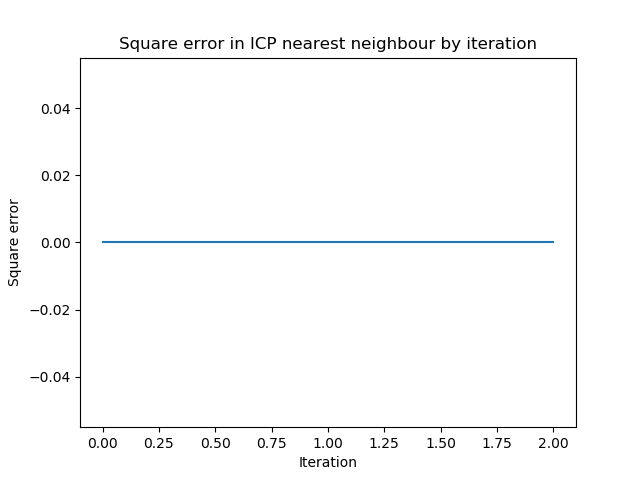

final transform:
 [[1. 0.]
 [0. 1.]]
[[-940.69407394 -820.12112475]
 [-940.89565696 -157.57970272]
 [-940.67124309 -244.788914  ]
 [-781.51506222 -960.14488882]
 [-534.92494801 -961.17391767]
 [-192.11508511 -960.98480429]
 [-941.09465464 -928.45293419]
 [-229.91816346 -960.87545401]
 [-940.7006532  -509.88457622]
 [-941.26923543  -94.48929266]
 [-940.46251265 -484.65891337]
 [-746.01794781 -960.26726569]
 [-476.48865764 -960.28254131]
 [-940.59780176 -795.67567219]
 [-404.02167345 -960.48450658]
 [-149.56607204 -960.4238596 ]
 [-190.69103206 -961.26839659]
 [-893.63986265 -960.59970638]
 [-941.30017103 -565.29460285]
 [-439.72399987 -960.09312253]
 [-301.48090355 -961.85927494]
 [-447.02582007 -961.12845977]
 [-271.18072593 -960.4504224 ]
 [-941.20771703 -226.16815295]
 [-940.41834707 -282.73190922]
 [-941.45596058 -197.7490184 ]
 [-940.04664504  -60.63254203]
 [-941.12812203 -573.30782126]
 [-941.60883064 -591.5376658 ]
 [ -18.74040791 -961.81744479]]
First transform:  [[0.95332656 0

<IPython.core.display.Javascript object>


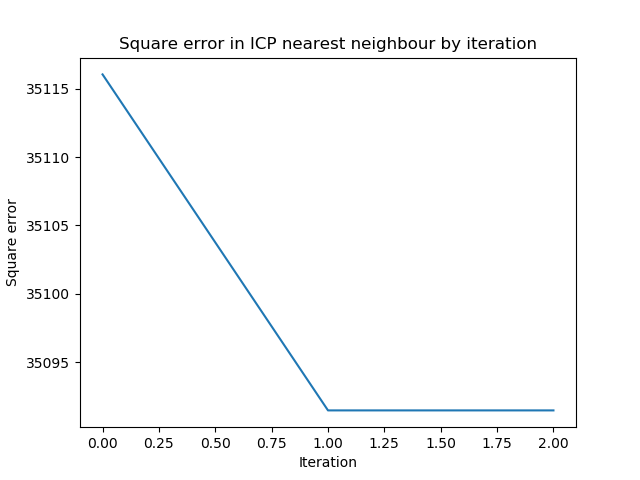

final transform:
 [[0.94286933 0.        ]
 [0.         0.96719841]]
[[-500.31117445 -920.8652066 ]
 [-880.67708119 -279.6138027 ]
 [-880.64622814 -600.68146372]
 [-880.54835542 -522.69550769]
 [-344.45041724 -921.74286548]
 [-881.34290323 -400.32322807]
 [-880.72460942 -251.75417049]
 [-880.88453071 -903.70705627]
 [-881.74664221 -436.78239314]
 [-225.43570432 -920.80548609]
 [-881.07678372 -592.9145817 ]
 [-880.8044009   -95.81026752]
 [-386.62680321 -920.06723398]
 [-316.11073961 -921.2762888 ]
 [-880.41438736 -259.98943541]
 [-655.98294238 -920.10128753]
 [-525.8282956  -920.38285705]
 [-881.41263793  -32.18325188]
 [-880.60724984 -662.5216008 ]
 [-881.97046465   -7.21799768]
 [-880.97775549 -152.0335303 ]
 [-880.51352045 -382.48652305]
 [-880.33552299 -679.37719049]
 [-881.57761872 -181.16540004]
 [-880.85860199 -820.79481194]
 [-174.00807757 -921.71860616]
 [-880.1509015  -393.2307091 ]
 [-637.77489027 -920.67539847]
 [-881.17469162 -802.74227672]
 [ -27.13803911 -921.60052454]]


<IPython.core.display.Javascript object>


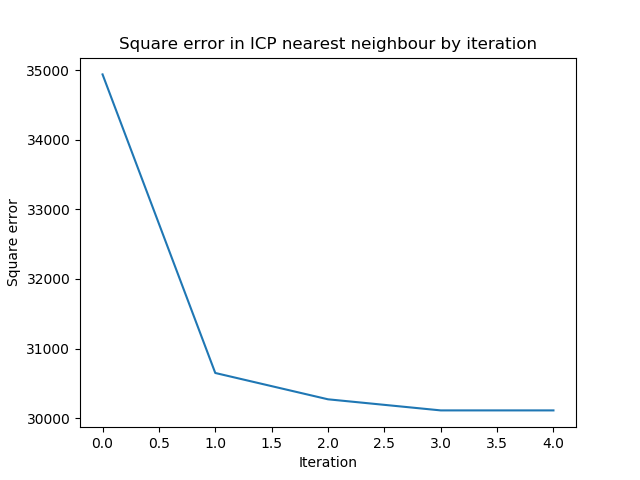

final transform:
 [[0.87170022 0.        ]
 [0.         0.92557232]]
[[  -8.66744549 -881.95741132]
 [-387.23727399 -880.61983491]
 [-821.54622987  -63.54362433]
 [-488.70204427 -881.60893367]
 [-704.19670582 -881.187267  ]
 [ -94.17366613 -880.9808855 ]
 [-821.40729194 -500.73352269]
 [-718.01061153 -880.31628505]
 [-821.31494949  -33.55225394]
 [-214.61559306 -880.21369406]
 [-820.33891841 -494.7808191 ]
 [-781.59592947 -881.35793128]
 [ -43.25547947 -880.93868316]
 [-758.31875942 -880.45253087]
 [-364.83166756 -881.48389341]
 [-821.6833296  -201.37652759]
 [-335.88113207 -880.08401026]
 [-323.08176704 -880.60329991]
 [-820.56447204 -323.41605901]
 [-672.17482591 -880.82064202]
 [-821.46745254 -440.24450527]
 [-821.9192239  -152.79001728]
 [-820.40166992 -160.73922978]
 [-820.00232678 -290.68227342]
 [-514.22461384 -880.89332301]
 [-821.19552114  -67.9258129 ]
 [  -4.51001533 -881.98846918]
 [-178.23601456 -880.13403702]
 [-228.97336584 -880.72197528]
 [-211.41358385 -880.98824996]]


<IPython.core.display.Javascript object>


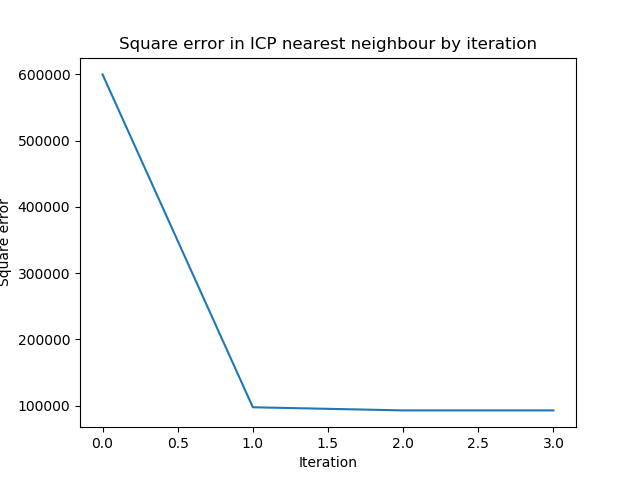

final transform:
 [[0.8183748  0.        ]
 [0.         0.88802065]]
[[-193.37392811 -840.03007323]
 [-760.6380109  -827.52994893]
 [-425.63416509 -840.35680369]
 [-760.23136643 -838.73253752]
 [-301.51971446 -841.61859639]
 [-760.91740426 -572.10899651]
 [-761.1312671  -129.08599553]
 [-761.54511455 -574.59989428]
 [-760.51286496 -438.75298544]
 [-761.93541262  -96.32459186]
 [ -66.47024939 -841.37845584]
 [-761.23723297 -509.4839302 ]
 [-761.1915264  -258.85026587]
 [-760.02351172 -671.23785771]
 [-483.75330215 -840.76319059]
 [-114.08969177 -840.2901536 ]
 [-241.09456067 -840.08893149]
 [ -36.19910011 -841.22150778]
 [-761.2408447  -382.64392895]
 [-760.78176016 -227.26001277]
 [-751.24017282 -841.44055212]
 [-760.38958187 -825.04041342]
 [-403.61556259 -840.07051944]
 [-760.39874517 -121.2177724 ]
 [-378.75132651 -840.61372382]
 [-420.55456922 -840.67464236]
 [-761.03775138 -310.65340973]
 [-484.4584471  -840.35707472]
 [-333.22423437 -840.34374492]
 [-760.97790691 -551.82662602]]


<IPython.core.display.Javascript object>


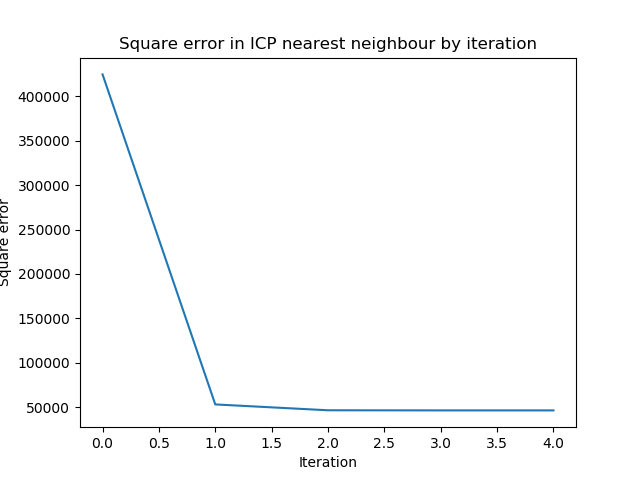

final transform:
 [[0.76390207 0.        ]
 [0.         0.83670173]]
[[-1001.37188983  -204.29962861]
 [ -438.45619791 -1000.1100752 ]
 [ -454.78991997 -1001.58181328]
 [ -163.41966907 -1000.74472857]
 [-1000.96800677  -493.47649329]
 [ -256.10594406 -1001.78128622]
 [   -4.53222304 -1001.98974992]
 [-1001.07751006  -804.05212446]
 [-1000.8143284   -102.01313679]
 [-1000.88284946  -336.703908  ]
 [ -475.00499091 -1001.01661255]
 [-1000.86725557  -185.98047403]
 [ -628.53052555 -1001.03615242]
 [ -192.9175431  -1001.5901465 ]
 [ -999.03077875 -1000.66652943]
 [ -637.64031    -1000.00541752]
 [-1000.12528583  -962.44138141]
 [ -806.75620058 -1001.46913723]
 [-1001.12189486  -755.16286431]
 [-1001.16784296  -405.04684942]
 [-1000.53705617  -614.16740326]
 [ -409.47918078 -1001.5242386 ]
 [ -488.48455799 -1001.18871178]
 [-1000.48138108  -587.05792398]
 [-1001.02188888  -537.07651036]
 [-1000.9525734   -225.32187157]
 [ -254.01554144 -1000.2500211 ]
 [ -546.85173167 -1000.27655354]
 [-1000

<IPython.core.display.Javascript object>


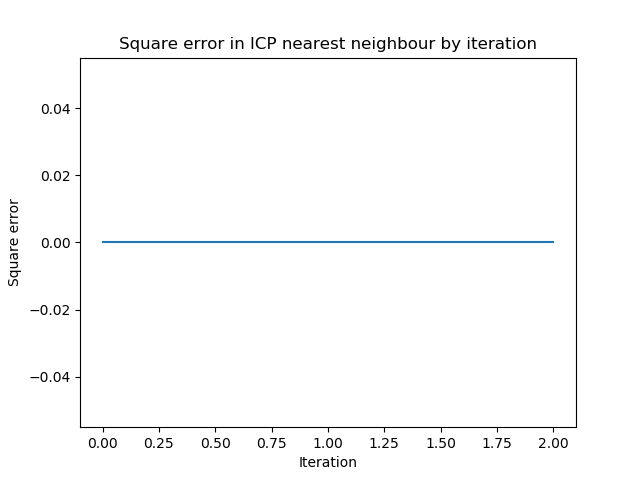

final transform:
 [[1. 0.]
 [0. 1.]]
[[-920.17963779 -797.9933798 ]
 [-921.27151944 -917.20160677]
 [-151.61424787 -921.61223942]
 [-804.21214588 -920.06892374]
 [ -34.51056626 -921.35390639]
 [-110.91197959 -921.34821473]
 [-921.25289652 -503.77882117]
 [-619.27524051 -921.19388648]
 [-920.78549499 -685.60781225]
 [-920.79698451 -415.00953402]
 [-591.42679447 -920.35338147]
 [-921.55793332 -563.14383201]
 [-921.37153213 -528.12735186]
 [-921.80461452  -63.65730637]
 [ -84.25360387 -920.15071061]
 [-877.83398695 -920.53869628]
 [-324.3356302  -920.53375765]
 [-513.70273619 -920.33988223]
 [-920.26310482 -312.88946595]
 [-920.73614153 -564.48645483]
 [-920.65145317 -390.38558091]
 [-262.80185341 -921.24871009]
 [-920.28172296 -159.49153704]
 [-522.39583567 -920.03618998]
 [-165.43936392 -921.26316374]
 [-276.84642578 -921.30345518]
 [-921.4745404   -31.12348614]
 [-414.27495139 -921.12771354]
 [ -70.52649996 -921.30451687]
 [-920.95898663  -43.80119801]]
First transform:  [[1.29529297 0

<IPython.core.display.Javascript object>


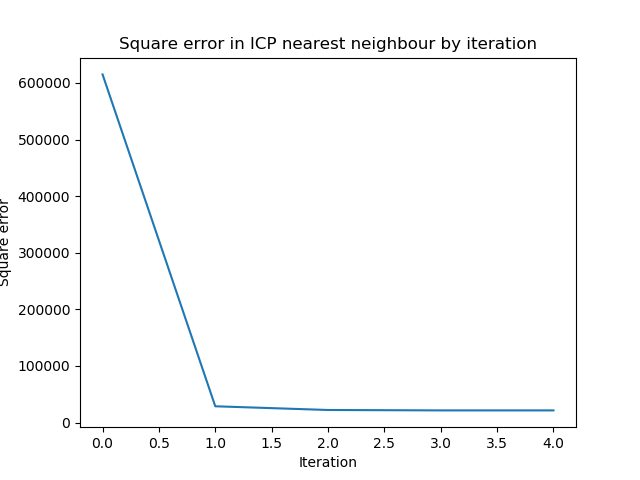

final transform:
 [[0.9238079  0.        ]
 [0.         0.91624255]]
[[ -86.24897452 -841.59201184]
 [-841.28385044  -34.72006605]
 [-841.80884225  -17.9408226 ]
 [-840.23492462 -578.2778497 ]
 [-696.32649403 -841.18571891]
 [-840.31056807  -78.82987495]
 [-840.71755118 -552.47624306]
 [-796.52327537 -840.54427117]
 [-635.84144516 -840.60790896]
 [ -76.64243114 -840.5129016 ]
 [-841.05266775 -573.54547342]
 [-490.83666929 -841.28197656]
 [-222.21425747 -841.14257042]
 [-840.83313584 -368.40689147]
 [-840.28662743 -305.21203083]
 [-841.12399699 -372.70688442]
 [-432.11174561 -841.54348629]
 [-840.96153259 -507.05788693]
 [-329.88872357 -841.65873729]
 [-399.07315227 -840.02417771]
 [-841.27637896 -470.69103901]
 [-705.85512583 -841.05442234]
 [-840.72379688 -266.65989078]
 [-840.78924799 -594.95667109]
 [-536.42283    -841.57860444]
 [-320.05969894 -841.16692108]
 [-841.20883622 -514.35755449]
 [-297.93989137 -840.7709683 ]
 [-479.59583373 -840.83995877]
 [-840.15344913 -322.71067835]]


<IPython.core.display.Javascript object>


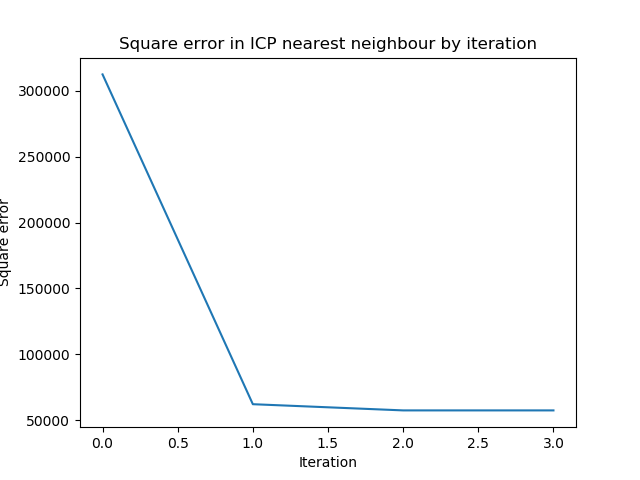

final transform:
 [[0.8380517  0.        ]
 [0.         0.83561084]]
[[-761.46780913 -433.06209215]
 [-760.2175643  -307.35851206]
 [-760.51552137 -531.78956529]
 [-760.53062554 -132.5789109 ]
 [-760.64789816  -71.48968471]
 [-373.07934491 -761.52203015]
 [-555.20687405 -760.99233046]
 [-761.72139233 -372.67213535]
 [-324.58582196 -761.72701421]
 [ -84.07917988 -761.3715857 ]
 [-658.08443376 -760.89478776]
 [-761.53240777 -604.03012501]
 [-705.98016695 -760.94415293]
 [-204.51457991 -760.9978887 ]
 [-100.94680668 -761.3368126 ]
 [-336.84126358 -760.76406537]
 [-251.52540835 -761.53724069]
 [ -94.8326267  -760.1070799 ]
 [-760.30658375 -375.55012808]
 [-760.31657534 -503.64938723]
 [-711.87782188 -760.91653071]
 [-760.04645384 -123.40740661]
 [-760.44048482 -535.37862214]
 [-327.67847632 -760.40174655]
 [-760.61038483  -45.99828784]
 [-760.25501262 -542.55720047]
 [-357.75962058 -760.00529859]
 [-761.32688337 -635.96020053]
 [-760.95862386  -68.10266345]
 [-761.10142213 -102.7065004 ]]


<IPython.core.display.Javascript object>


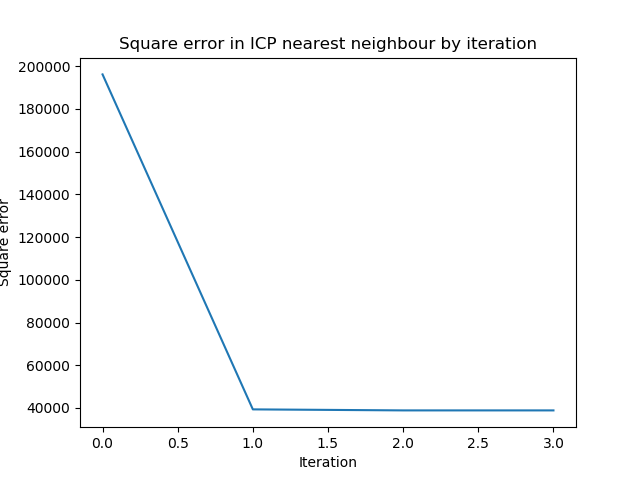

final transform:
 [[0.76044386 0.        ]
 [0.         0.7643721 ]]
[[-516.37426721 -680.20115861]
 [-680.69548612 -333.49311114]
 [-192.8842731  -681.21924312]
 [-680.00715184 -479.3894799 ]
 [-499.00455024 -680.68381709]
 [-133.47295901 -681.04402884]
 [-347.86867924 -680.20833721]
 [ -66.44390105 -680.76516363]
 [-681.3013198  -635.96581012]
 [-681.64913107  -21.87377693]
 [-242.65526191 -680.00178225]
 [ -91.00472601 -681.95464647]
 [-680.56967241 -512.57089363]
 [-681.64257187 -293.13376505]
 [-681.52187173 -225.94676   ]
 [-621.96061319 -680.62397521]
 [-681.70832617 -399.21643007]
 [-393.80385342 -680.23122909]
 [-423.50245565 -681.06509972]
 [-680.2135294  -203.49337684]
 [-680.59281993 -460.95272368]
 [-136.74812855 -680.39396627]
 [-680.09527812 -532.8849901 ]
 [-680.01567326 -148.30604882]
 [-680.07084014 -542.58976437]
 [-109.87660029 -681.19537044]
 [-680.14224187 -236.2340594 ]
 [-130.9188486  -681.53962106]
 [-544.83579246 -680.83622058]
 [-681.91079268 -139.33294955]]


<IPython.core.display.Javascript object>


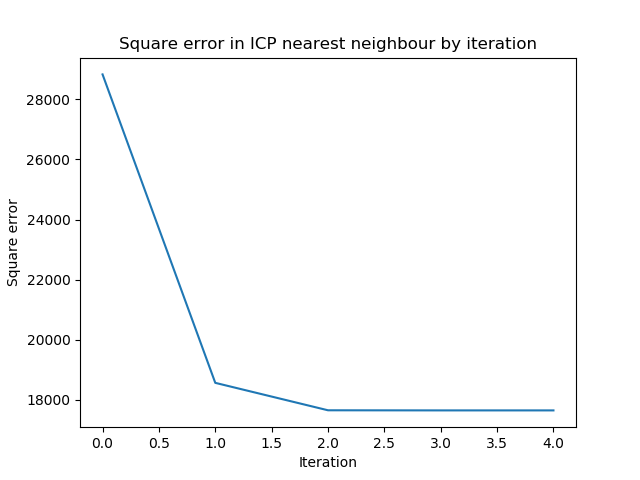

final transform:
 [[0.68340889 0.        ]
 [0.         0.67462606]]
[[ -575.80378251 -1000.08299858]
 [ -752.54312048 -1000.59125112]
 [ -378.62133427 -1000.77264413]
 [-1001.65164993  -444.8707365 ]
 [-1000.39910542  -900.50965008]
 [ -481.33741702 -1000.20712404]
 [-1001.02403052  -669.00440232]
 [ -808.14029563 -1000.35256914]
 [-1001.22773455  -360.05419533]
 [-1000.04789318  -433.59452412]
 [  -11.13366366 -1001.93814257]
 [-1000.85946842  -545.78413726]
 [-1001.99280857    -3.79625741]
 [-1000.91302652  -446.53008112]
 [ -516.70837635 -1000.44412828]
 [ -514.54143204 -1001.56034003]
 [-1001.28561315  -399.38843361]
 [ -334.80141976 -1001.52084817]
 [-1001.64217327  -340.70068496]
 [-1001.77528098  -327.66184767]
 [ -867.13805149 -1000.52366272]
 [ -520.60713562 -1000.67587677]
 [ -214.28475319 -1001.3281403 ]
 [  -73.20794281 -1001.32741754]
 [ -347.81938794 -1001.30997867]
 [ -348.69456288 -1001.00554535]
 [ -120.81334709 -1000.73379835]
 [ -326.29322683 -1000.11835806]
 [ -241

<IPython.core.display.Javascript object>


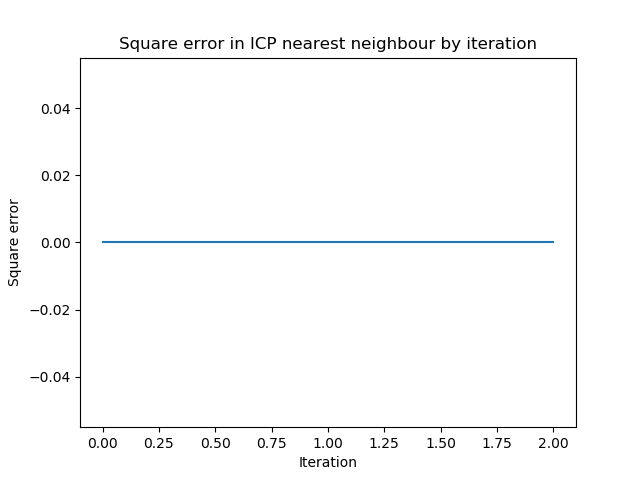

final transform:
 [[1. 0.]
 [0. 1.]]
[[-153.16702278 -941.62405616]
 [-960.77482508 -617.31332036]
 [-960.49033088 -255.91858918]
 [-960.06226011 -553.12246087]
 [-499.89340749 -941.52141831]
 [-334.47403061 -940.28246971]
 [-961.48310228 -728.00154123]
 [-158.27531327 -940.77889284]
 [-104.67000343 -940.19157111]
 [-961.33489367 -446.58170832]
 [-961.66667765  -25.32194893]
 [-220.53101659 -940.49033526]
 [-960.29325036 -712.91856009]
 [-960.47777838 -149.21942651]
 [-960.29661758 -722.93457952]
 [-598.984407   -941.63351691]
 [-191.91175048 -940.62207077]
 [-783.91984141 -940.02429875]
 [-961.62736238  -67.59301685]
 [-212.2634799  -940.34047828]
 [-960.57973245 -194.13031088]
 [-960.94291982 -780.53360263]
 [-810.59346356 -941.01128412]
 [-675.93678001 -940.25181171]
 [-316.3442374  -940.20759594]
 [-408.13480333 -941.32990089]
 [-846.55404158 -941.33004557]
 [-321.90433576 -940.43266565]
 [-961.7296086   -22.80701511]
 [-960.06905292 -472.4059839 ]]
First transform:  [[0.94167107 0

<IPython.core.display.Javascript object>


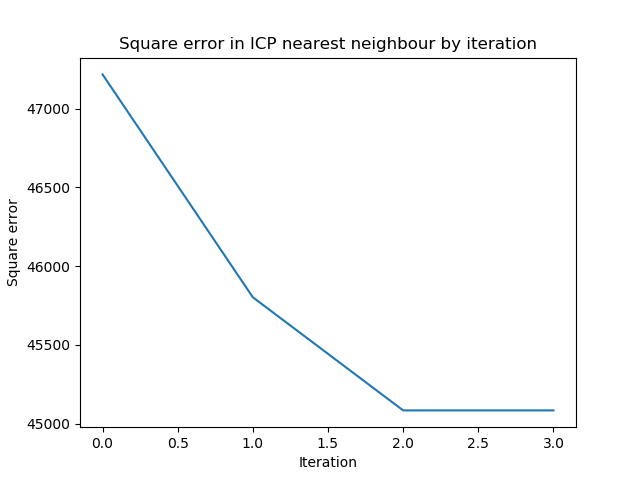

final transform:
 [[0.96146686 0.        ]
 [0.         0.93560248]]
[[-157.51173984 -880.01480204]
 [-209.07775462 -881.54551359]
 [-298.47029418 -880.80388481]
 [  -8.17033928 -881.96215653]
 [-920.34313022 -822.02464844]
 [-700.74352299 -881.38216171]
 [-920.02964663 -554.09516269]
 [-920.03433185 -287.80692871]
 [-895.53156142 -880.65840285]
 [-920.45427207 -430.13943441]
 [-534.41916752 -880.50903084]
 [ -39.96315782 -881.09417545]
 [-921.89575771 -122.50800759]
 [-921.43846239 -495.04258405]
 [-920.86849626 -249.23324938]
 [-920.75463612 -766.42997075]
 [-443.49711086 -880.6283624 ]
 [-920.26660558 -484.46813584]
 [-150.64009267 -881.21709157]
 [-121.72880412 -881.63603502]
 [-236.22741174 -880.87491163]
 [-481.85437767 -880.8134642 ]
 [ -43.85802824 -880.9088905 ]
 [ -66.97388655 -881.45930055]
 [-291.22459344 -881.11987617]
 [-921.68104217 -398.14577293]
 [-920.63233349 -299.09882401]
 [-921.74877377 -382.60057246]
 [ -16.69217729 -881.84203303]
 [-921.52626694 -762.36824393]]


<IPython.core.display.Javascript object>


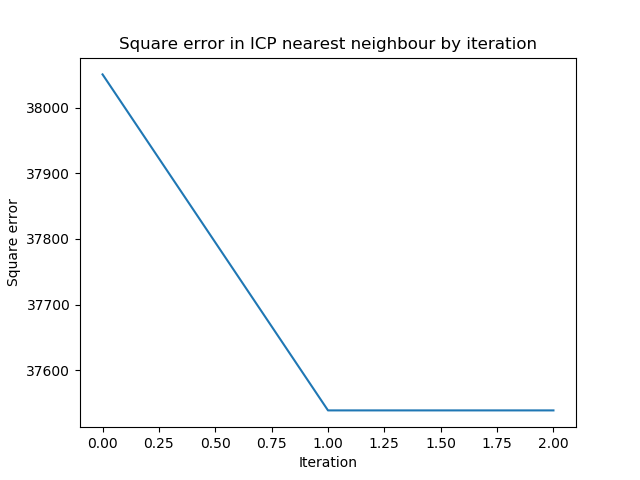

final transform:
 [[0.91144334 0.        ]
 [0.         0.88392937]]
[[-1.88807874e+02 -8.20558095e+02]
 [-8.81215988e+02 -8.20411106e+02]
 [-6.15951117e-01 -8.21999769e+02]
 [-7.43957101e+02 -8.21091853e+02]
 [-8.80555651e+02 -6.55915959e+02]
 [-8.80554349e+02 -6.69223459e+02]
 [-8.81096777e+02 -6.81663017e+02]
 [-8.81518840e+02 -6.90886774e+02]
 [-4.58435555e+02 -8.20631977e+02]
 [-5.67739367e+02 -8.20777687e+02]
 [-8.80255270e+02 -3.46506362e+02]
 [-2.66630609e+01 -8.21567454e+02]
 [-8.80486532e+02 -4.39317047e+02]
 [-8.81940808e+02 -1.46343471e+02]
 [-1.29846369e+02 -8.21805281e+02]
 [-8.80597624e+02 -7.88461683e+02]
 [-8.81132329e+02 -3.38735619e+02]
 [-8.81701107e+02 -4.27788683e+02]
 [-1.83448068e+02 -8.21772965e+02]
 [-4.85411825e+02 -8.21274230e+02]
 [-2.21123071e+02 -8.20734176e+02]
 [-6.54260979e+02 -8.21244526e+02]
 [-6.54062665e+02 -8.21402477e+02]
 [-6.38946222e+02 -8.20577678e+02]
 [-1.58504598e+02 -8.20836337e+02]
 [-8.80948162e+02 -2.65198671e+02]
 [-2.96091647e+02 -8.

<IPython.core.display.Javascript object>


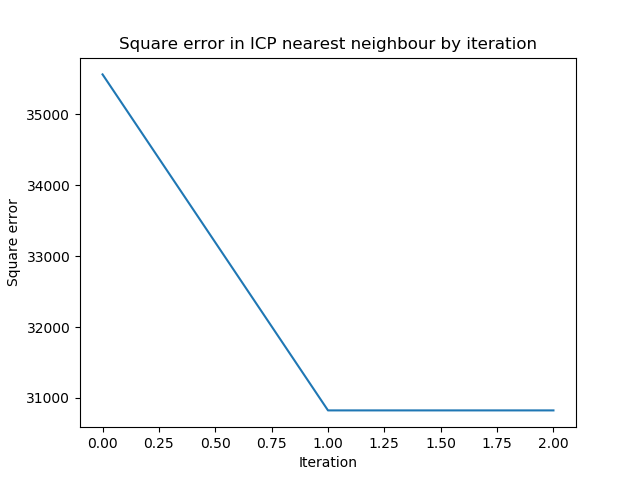

final transform:
 [[0.87891003 0.        ]
 [0.         0.81634756]]
[[-841.15451581 -265.29809749]
 [-592.18807027 -760.66371639]
 [-841.07118914 -396.86175779]
 [-840.64712251 -433.85298826]
 [-752.1593946  -761.02315675]
 [ -17.52575047 -761.79843008]
 [-202.15275    -761.62869278]
 [-386.0221192  -761.77616364]
 [-841.94492477   -9.63035071]
 [-841.62464529 -474.1560465 ]
 [-841.44540782 -204.75748008]
 [-609.02497284 -760.10827022]
 [-137.31750905 -761.72166945]
 [-135.34759433 -760.04278084]
 [-841.43025676 -204.81973295]
 [-487.57274594 -761.2416288 ]
 [-841.04732122 -674.33182001]
 [-841.17471974 -518.23652019]
 [-841.61770411 -307.40143155]
 [-732.8565672  -760.30076411]
 [-840.20971584 -585.34061316]
 [-143.59579722 -760.56311179]
 [-675.62342518 -761.48341239]
 [-841.39405754 -683.45595318]
 [-841.64268358 -242.92713554]
 [-840.52315634 -112.36024056]
 [-203.39349309 -761.2982904 ]
 [-840.78015026  -93.83357035]
 [-591.91564529 -760.87572498]
 [-764.06594826 -760.45198843]]


<IPython.core.display.Javascript object>


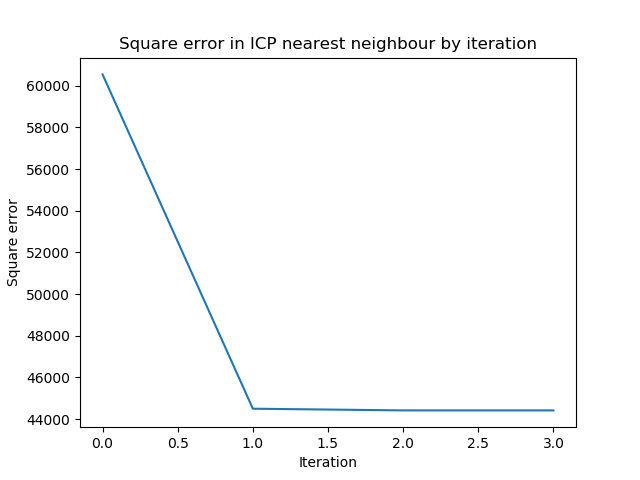

final transform:
 [[0.82924359 0.        ]
 [0.         0.75832147]]


In [53]:
output = full_subtune(config_file, 'subsample')

In [54]:
gate3, gate4, gate5, transforms3, transforms4, transforms5 = output

[[0.87170022 0.        ]
 [0.         0.92557232]]


<IPython.core.display.Javascript object>


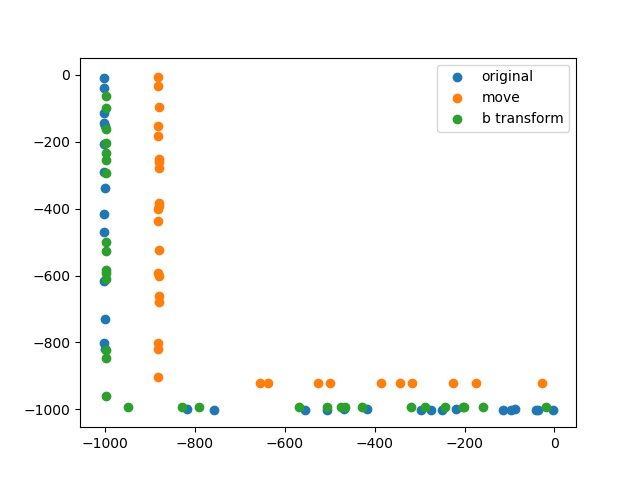

0.942869         0  
       0  0.967198  


In [55]:
print(transforms3[2])
plt.figure()
plt.scatter(*gate3[0].T, label="original")
#plt.scatter(*(np.linalg.inv(mytrans) @ gate3[2].T), label="my transform")
plt.scatter(*gate3[2].T, label="move")
plt.scatter(*(np.linalg.inv(transforms3[1]) @ gate3[1].T), label="b transform")
plt.legend()
plt.show()


matprint(transforms3[1])

<IPython.core.display.Javascript object>


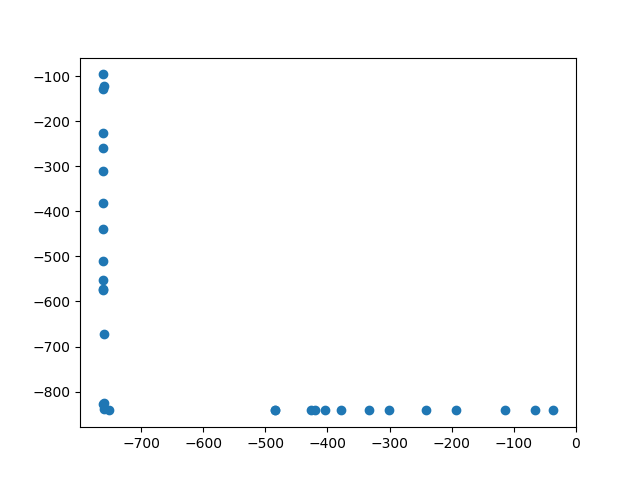

NameError: name 'points' is not defined

In [56]:
#points = gate3[5]

plt.figure()
plt.scatter(*gate3[4].T, label="Hypersurface found (gate -800)")
plt.scatter(*points.T, label="Hypersurface not found (gate -1000)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


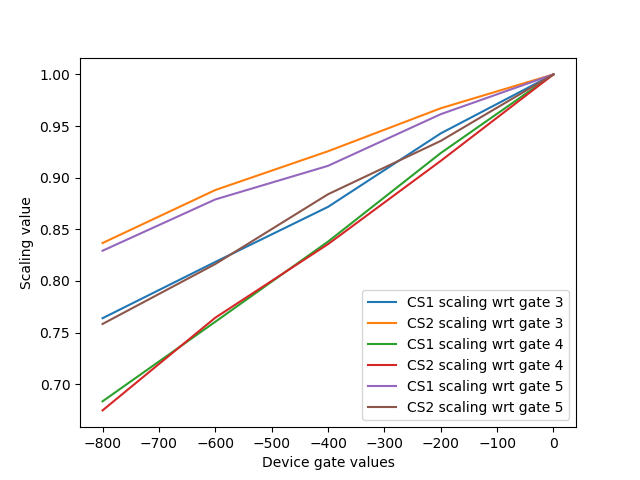

In [57]:
x = [0, -200, -400, -600, -800]
plt.figure()
lim = 5
plt.plot(x[:lim], transforms3[:lim, 0, 0], label="CS1 scaling wrt gate 3")
plt.plot(x[:lim], transforms3[:lim, 1, 1], label="CS2 scaling wrt gate 3")
plt.plot(x[:lim], transforms4[:lim, 0, 0], label="CS1 scaling wrt gate 4")
plt.plot(x[:lim], transforms4[:lim, 1, 1], label="CS2 scaling wrt gate 4")
plt.plot(x[:lim], transforms5[:lim, 0, 0], label="CS1 scaling wrt gate 5")
plt.plot(x[:lim], transforms5[:lim, 1, 1], label="CS2 scaling wrt gate 5")
plt.ylabel("Scaling value")
plt.xlabel("Device gate values")
plt.legend()
plt.show()

In [35]:
transforms3[4]

array([[0.75918483, 0.        ],
       [0.        , 0.83211668]])

In [58]:
n = []
invn = []
for transform in [transforms3, transforms4, transforms5]: 
    gradient1 = (transform[0, 0, 0] - transform[-1, 0, 0]) /0.8
    
    print(transform[4,0,0])
    
    gradient2 = (transform[0, 1, 1] - transform[-1, 1, 1])/0.8
    n.append(gradient1)
    n.append(gradient2)
    
    invgradient1 = (np.linalg.inv(transform)[2, 0, 0] - np.linalg.inv(transform)[1, 0, 0])
    invgradient2 = (np.linalg.inv(transform)[2, 1, 1] - np.linalg.inv(transform)[1, 0, 0])
    invn.append(invgradient1)
    invn.append(invgradient2)
    print(gradient1, gradient2)
    print(invgradient1, invgradient2)

    
print(n)

0.7639020674330024
0.29512241570874703 0.2041228332570183
0.08659102177062095 0.019820251688348334
0.6834088921359044
0.3957388848301195 0.40671743123893084
0.11076768028390482 0.11425319762045616
0.8292435942018843
0.2134455072476446 0.30209816272185064
0.05708345126780712 0.09123465716726842
[0.29512241570874703, 0.2041228332570183, 0.3957388848301195, 0.40671743123893084, 0.2134455072476446, 0.30209816272185064]


In [76]:
out = np.array([[1, 0, n[0], n[2], n[4]], [0, 1, n[1], n[3], n[5]], [0, 0, 1, 0, 0], [0, 0, 0, 1,0], [0,0,0,0,1]])

In [77]:
matprint(out)

1  0  0.295122  0.395739  0.213446  
0  1  0.204123  0.406717  0.302098  
0  0         1         0         0  
0  0         0         1         0  
0  0         0         0         1  


In [78]:
matprint(np.linalg.inv(out))

 1   0  -0.295122  -0.395739  -0.213446  
 0   1  -0.204123  -0.406717  -0.302098  
 0   0          1          0          0  
-0  -0         -0          1         -0  
 0   0          0          0          1  


In [29]:
1  0  0.3  0.4  0.2  
0  1  0.2  0.4  0.3  
0  0    1  0.2  0.3  
0  0    0    1  0.2  
0  0    0    0    1  
True inverse matrix: (should account for crosstalk)
 1   0  -0.3  -0.34  -0.042  
 0   1  -0.2  -0.36  -0.168  
 0   0     1   -0.2   -0.26  
-0  -0    -0      1    -0.2  
 0   0     0      0       1  

SyntaxError: invalid syntax (<ipython-input-29-5368faa7db24>, line 1)